# <center><b> SUPERMARKET SALES CASE STUDY <b> </center>

**Main Thing For data analyst is to gain "Domain knowledge" about data on which we want to perform Anlysis(EDA) ,So that To answer the question's raised by company manager and also raise questions by ourself whose result will make positive changes in company and increase engagement of clients and customers**

---

<a name = Section0></a>
## **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** **Data Description**
  - **4.2** **Data Information**

**5.** [**Data Pre-Profiling**](#Section5)<br>
  
**6.** [**Data Pre processing**](#Section6)<br>
- **6.1** **Identification & Handling of Inconsistent Data Types**

**7.** [**Exploratory Data Analysis**](#Section7)<br>
- **Q1. What is the average sales over time?**<br>
- **Q2. What is the average COGS, Gross Margin, Gross Income over time?**

- **Q3. What is the distribution of count of sales from different cities of the superstore?**
- **Q4. Plot the total sales of each city?**
- **Q5. What is the distribution of customer type count?**
- **Q6. What is the average sales customer type wise?**
- **Q7. What is the distribution of average sales as per customer types for each city?**
- **Q8. What is the branch and city and customer type wise average total sales distribution?**
- **Q9. Which product-line was customer's most and least favorite?**
- **Q10. Plot the distribution of the total sales Branch and Product line wise.**
- **Q11. What is the distribution of Average Total Sales product line wise?**
- **Q12.Which type of Customer spends more on which Product line ?**
- **Q13. Find Average Sales Gender and Branch Wise.**
- **Q14. What is the total Average sales for each gender and product line combination?**
- **Q15: What is the correlation among the various features in the dataset?**

**8.** [**Summarization**](#Section8)<br>
   - **8.1** **Observations**
   - **8.2** **Actionable Insights**

---
<a name = Section1></a>
# **1. Introduction**
---

- **EasyGrab** is a retail superstore in New York, USA that has three branches.
- They deal in various **product lines such as home and lifestyle, health and beauty** etc.
- The store has **3 branches** and people walk into the store from different cities

<center><img src="https://www.lincesoft.com/wp-content/uploads/2020/06/retail.jpg"></center>


[*Go Back to Index*](#Section0)<br>


---

<a name = Section2></a>
## **2. PROBLEM STATEMENT**
---

- You are the manager of **EasyGrab US Based SuperStore** whose job is manage all the branches of the superstore.
- The sales have been **stagnant in some cities of states** and we need to **increase** them in order to **meet our targets** for the year.
- You are responsible to find out which **product line and Discount(Offers)** should be focussed on more.
-  To **increase sales by 30%** over the next quarter through targeted marketing campaigns and improved sales techniques.
- This will focus on **identifying target markets, creating marketing materials** and campaigns to **reach those markets**, and **training our sales team** on how to effectively sell to those customers.

**Constraints:**

- Budget: We have a **limited budget** for marketing campaigns and sales team training.
- Time: We only have a **few weeks to implement** these changes before the end of the quarter.

**Success Criteria:**

- **Increase in sales** revenue by 30% over the next quarter.
- Positive **feedback from customers** and sales team on marketing campaigns and sales techniques.
- **Cost-effective use of budget** for marketing and sales team training.

---
<a name = Section3></a>
# **3. Installing and importing Libraries**
---

!pip install ydata-profiling   instead of  pandas_profiling
- It is **very powerfull tool**, you have to provide just dataframe ,,it will perform initial level analyzation task like-> value_counts , null_values , duplicate_values , distinct_values , mean,median,mode...etc .It will return html page  which contains (Overview , Variables , interaction , correlation , missing values , sample) page. By reading this you can get brief description about dataset , and you come to know what to do next...

In [1]:
import warnings                                         #To avoid any warnings
warnings.filterwarnings("ignore")
import numpy as np                                      # linear algebra
import pandas as pd                                     # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns                                   #High level visualization library built on top of matplotlib
import matplotlib.pyplot as plt                         #Core Library for Data Visualization 
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 10)
plt.rcParams['figure.dpi'] = 100
from ydata_profiling import ProfileReport            #For Panel Data Analysis

[*Go Back to Index*](#Section0)<br>

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset contains the different data related to a food order.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 9426 | 24 | 132.9+ KB | 


|ID| Feature Name	| Description of the feature|
| :-- | :--| :--| 
|01|     Row ID	        | A unique number given to each row in the table to identify it |
|02|	 Order Priority |	How urgent the order is (e.g., High priority means it should be processed quickly)
|03|	 Discount	    |The percentage discount applied to the order (e.g., 0.01 means 1% off)
|04| 	(Dollars) Unit Price 	    |  The price of one unit/piece or single piece or 1 quantity of the product...
|05|	(Dollars)Shipping Cost	| The cost to ship the order to the customer
|06|	Customer ID	    | A unique number assigned to each customer
|07|	Customer Name	| The name of the person who made the order
|08|	Ship Mode	    | The method used to deliver the order (e.g., Regular Air, Express Air)
|09|	Customer Segment|	The type of customer (e.g., Corporate means business customers)
|10|	Product Category|	The main group the product belongs to (e.g., Office Supplies)
|11|	Product Sub-Category   |	A more specific group within the product category
|12|	Product Container |	The type of packaging used for the product (e.g., Box, Wrap)
|13|	Product Name	| The name of the product
|14|	Product Base Margin	| The basic profit margin for the product
|15|	Region	        |The area where the order is being shipped (e.g., Central, West)
|16|	State           |	The state or province where the order is being shipped
|17|	City	        |The city where the order is being shipped
|18|	Postal Code	    | The postal code for the shipping address
|19|	Order Date	    | The date when the order was placed
|20|	Ship Date	    | The date when the order was sent out
|21| (Dollars)	Profit 	        | The money made from the order after costs are deducted....
|22|	Quantity ordered new |	The number of items ordered
|23| (Dollars)	Sales 	 | The total amount of money made from the order.....
|24|	Order ID	| A unique number given to each order

- "Product Base Margin" or "product markup" = differnce b/n Products **selling price** and its manufacturing **cost**,,expressed as percentage of selling price
- Product base margin = (Selling_price - actual_cost_while_manufacturing) * 100 / Selling_price
- ex-> company is selling a shoe on 100 Rupees and its cost is 60 rupee(manufacturing cost) 'then product base margin' is = 40%
  ie;company nakes 40 rupees profit on this shoe...........
- Business can use Product margin to identify which products are generating the most revenue and profit,and to determine where cost can be reduced or pricing an be adjusted
- as **rule of thumb , a product margin of 5% is considered low , 10% is healthy , 20% is high**

In [2]:
# pip install openpyxl --upgrade --pre

In [3]:
df = pd.read_excel('Superstore_USA.xlsx')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [4]:
#If date column is of object type then use this to cast it
# df['Order Date'] = pd.to_datetime(df['Order Date'])
#in my datasets date column there is no time (hh:mm;yy) so just date is formatted

In [5]:
df.sort_values(by='Order Date' , inplace=True , ignore_index=True)
#Indexes are not sorted
#if u already used aboce code w/o ignore_index=True (bydefault it is false),,then df.reindex(np.arange(len(df.index)))

In [6]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,19914,Not Specified,0.08,95.99,35.00,2211,Anita Hahn,Express Air,Home Office,Office Supplies,Storage & Organization,Large Box,Safco Industrial Wire Shelving,NaN,East,Maryland,Bowie,20715,2010-01-01,2010-01-03,-425.20840,2,193.88,88028
1,24225,Critical,0.08,15.04,1.97,1155,Alex Nicholson,Regular Air,Consumer,Office Supplies,Paper,Wrap Bag,White GlueTop Scratch Pads,0.39,West,California,Montebello,90640,2010-01-02,2010-01-02,108.51630,11,157.27,90853
2,24224,Critical,0.09,9.11,2.15,1155,Alex Nicholson,Express Air,Consumer,Office Supplies,Paper,Wrap Bag,"Black Print Carbonless Snap-Off® Rapid Letter,...",0.40,West,California,Montebello,90640,2010-01-02,2010-01-04,20.29960,4,34.41,90853
3,19279,Critical,0.06,40.98,2.99,950,Jane Shah,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",0.36,Central,Minnesota,Prior Lake,55372,2010-01-02,2010-01-04,-14.80188,1,41.60,89083
4,23274,Low,0.05,155.06,7.07,67,Ellen McCormick,Regular Air,Corporate,Office Supplies,Storage & Organization,Small Box,"Dual Level, Single-Width Filing Carts",0.59,West,California,Napa,94559,2010-01-02,2010-01-09,845.66400,8,1225.60,87946


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [7]:
#Getting some stats about the numerical columns of the data
df[['Discount','Unit Price','Shipping Cost','Product Base Margin','Order Date','Profit','Sales','Quantity ordered new']].describe()

,Discount,Unit Price,Shipping Cost,Product Base Margin,Order Date,Profit,Sales,Quantity ordered new
count,9426.000000,9426.000000,9426.000000,9354.000000,9426,9426.000000,9426.000000,9426.000000
mean,0.049628,88.303686,12.795142,0.512189,2012-03-05 18:33:59.465308672,139.236410,949.706272,13.798430
min,0.000000,0.990000,0.490000,0.350000,2010-01-01 00:00:00,-16476.838000,1.320000,1.000000
25%,0.020000,6.480000,3.192500,0.380000,2011-03-07 06:00:00,-74.017375,61.282500,5.000000
50%,0.050000,20.990000,6.050000,0.520000,2012-04-08 00:00:00,2.567600,203.455000,10.000000
75%,0.080000,85.990000,13.990000,0.590000,2013-03-26 00:00:00,140.243850,776.402500,17.000000
max,0.250000,6783.020000,164.730000,0.850000,2013-12-31 00:00:00,16332.414000,100119.160000,170.000000
std,0.031798,281.540982,17.181203,0.135229,NaN,998.486483,2598.019818,15.107688


In [8]:
#min value of discount shoul be 0.01 then why 0?----> min.25percentile,50percentile,75percentile,max,,,,,is a 5 point summary,,,,,
#Exact same thing in BOX plot........min,max,25 percentile,50,75percentile are cacluated from data,,,not taken directly,,,,see snapshot of boxplot,,u see some formulas are there to calculate these 5 value..

**Observations:-**

- **Unit price** is minimum 10 and maximum 99.6 with an average of 55.


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the information about the **data types of the features**.

In [9]:
#getting the datatype and non null count for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [10]:
df.shape

(9426, 24)

In [11]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [12]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

**Observations:**

- **Date Column** is object type which needs to be **converted** to datetime data type.
- There are **6 float** datatype columns, **5 integer** datatype column , **11 Object** Data type , **2** datetime columns  column
- There are **no null values** in the dataset except 'Product Base Margin'.It has 72 NULL values (72 cell's missing or null) So we have to clean this column only


[*Go Back to Index*](#Section0)<br>

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- For **quick analysis** pandas profiling is very handy.

- It generates profile reports from a pandas DataFrame.

- For each feature **statistics** are presented in an interactive HTML report.

In [13]:
profile = ProfileReport(df=df)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations :**

- There are **24 variables (columns)** in the dataset and there are **9426 Observations (rows)** in the dataset.
- There are **no missing values** and **no duplicate rows** in the dataset. Total size of the dataset is 132 KB.
- There are **10 categorical columns** while there are **7 numerical** columns in the data.
- There is **high cardinality** in the Invoice ID and this is the **unique identifier**. 
- Each row is **an invoice** of an individual customer.
- Tax has **perfect positive correlation** with Total, COGS and Gross Income.
- Unit Price has **perfect positive correlation** with Tax, Total, COGS, Gross Income.
- COGS has **perfect positive correlation** with Unit Price, Tax, Total and Gross Income.
- Quantity has **perfect positive correlation** with Tax, Total, COGS and Gross Income.
- Gross Income has **perfect positive Correlation** with Unit Price, Tax, Total and COGS.

[*Go Back to Index*](#Section0)<br>

---
<a name = Section6></a>
# **6. Data Preprocessing**
---

- We would be **cleaning the data** in this section


## **6.1 Identification & Handling of Inconsistent Data Types**

 - **I will Replace NULL values with mean value , based on Product_category and Product_Sub_category of NULL value containing   rows/records.so that value should be closer to domain and it will help to analyze data properly**
 - that is not taking mean of entire product_base_margin, which is random method...instead we grouped the data based in product_category and sub_category then calculated mean on it,, so that value should be similar to domain,which is more best way to impute missing?NULL values
- You can use **df.fillna(df['Product base margin'].mean() , inplace=True)**,,,,,,,but i am choosing my method
 - NULL in numeric_column it is NaN(Not a Number) ,,,,,
- NULL i categorical column it is ''(emty string)
- In SQL there is NULL , NaN and '' also come,,,but in python pandas dataframe only '' and NaN will come

### **A)Missing Value Imputation**

In [14]:
groups = df[['Product Category','Product Sub-Category','Product Base Margin']].groupby(['Product Category','Product Sub-Category'])
t = groups.mean()
t
#----OR---------
#groups = df.groupby(['Product Category','Product Sub-Category'])
#groups.mean('Product Base Margin')['Product Base Margin']

Product Base Margin
Product Category Product Sub-Category                               
Furniture        Bookcases                                  0.660050
                 Chairs & Chairmats                         0.637139
                 Office Furnishings                         0.524609
                 Tables                                     0.691811
Office Supplies  Appliances                                 0.554878
                 Binders and Binder Accessories             0.374095
                 Envelopes                                  0.373750
                 Labels                                     0.376809
                 Paper                                      0.374975
                 Pens & Art Supplies                        0.533384
                 Rubber Bands                               0.523538
                 Scissors, Rulers and Trimmers              0.642323
                 Storage & Organization                     0.665973
Technology       Computer Peripherals                       0.592092
                 Copiers and Fax                            0.421020
                 Office Machines                            0.445851
                 Telephones and Communication               0.581411

In [15]:
df[np.isnan(df['Product Base Margin'])]

#OR
# df[ df['Product Base Margin'].isnull() ] 
#OR
# df[pd.isnull(df['Product Base Margin'])]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,19914,Not Specified,0.08,95.99,35.00,2211,Anita Hahn,Express Air,Home Office,Office Supplies,Storage & Organization,Large Box,Safco Industrial Wire Shelving,NaN,East,Maryland,Bowie,20715,2010-01-01,2010-01-03,-425.208400,2,193.88,88028
161,22125,Low,0.10,238.40,24.49,1281,Pauline Denton,Regular Air,Small Business,Furniture,Chairs & Chairmats,Large Box,Safco Contoured Stacking Chairs,NaN,Central,Indiana,Vincennes,47591,2010-01-24,2010-01-26,875.284400,8,1774.50,89112
162,4125,Low,0.10,238.40,24.49,1282,Dana Sharpe,Regular Air,Small Business,Furniture,Chairs & Chairmats,Large Box,Safco Contoured Stacking Chairs,NaN,East,Pennsylvania,Philadelphia,19134,2010-01-24,2010-01-26,460.676000,30,6654.39,29319
320,19525,Critical,0.01,138.14,35.00,2660,Jeffrey Page,Regular Air,Small Business,Office Supplies,Storage & Organization,Large Box,"SAFCO Commercial Wire Shelving, Black",NaN,East,Maine,Gorham,4038,2010-02-24,2010-02-26,-321.510000,4,599.03,86486
567,19185,High,0.09,349.45,60.00,1178,Sandy Hunt,Delivery Truck,Consumer,Furniture,Tables,Jumbo Drum,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,NaN,South,Florida,Altamonte Springs,32701,2010-04-09,2010-04-10,-369.110000,7,2307.26,89787
691,18261,Critical,0.06,276.20,24.49,335,Curtis O'Connell,Regular Air,Corporate,Furniture,Chairs & Chairmats,Large Box,SAFCO Arco Folding Chair,NaN,West,Oregon,Medford,97504,2010-05-04,2010-05-05,2639.470800,14,3825.32,87277
729,21848,Not Specified,0.08,128.24,12.65,1267,Rosemary Branch,Regular Air,Corporate,Furniture,Chairs & Chairmats,Medium Box,SAFCO Folding Chair Trolley,NaN,South,Florida,Boca Raton,33433,2010-05-12,2010-05-13,-379.344000,3,366.44,89515
819,18728,Not Specified,0.01,349.45,60.00,3257,Sharon Marcus,Delivery Truck,Consumer,Furniture,Tables,Jumbo Drum,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,NaN,West,Washington,Longview,98632,2010-05-26,2010-05-27,3739.392900,15,5419.41,88825
983,20795,Critical,0.08,349.45,60.00,3119,Jay Hubbard,Delivery Truck,Corporate,Furniture,Tables,Jumbo Drum,SAFCO PlanMaster Heigh-Adjustable Drafting Tab...,NaN,South,Florida,Orlando,32839,2010-06-30,2010-07-02,513.084000,11,3772.19,86432
1156,20592,Medium,0.03,128.24,12.65,1237,Eva Simpson,Regular Air,Corporate,Furniture,Chairs & Chairmats,Medium Box,SAFCO Folding Chair Trolley,NaN,Central,Texas,Carrollton,75007,2010-07-31,2010-08-02,790.464000,9,1145.60,86075


In [16]:
for i in range(df.shape[0]):
    if pd.isnull(df.loc[i , ['Product Base Margin']][0]):
        df.loc[i , 'Product Base Margin'] = round(groups.get_group((df.loc[i,'Product Category'],df.loc[i , 'Product Sub-Category']))['Product Base Margin'].mean() , 3 )
    else:
        continue
#Try KNN imputer

In [17]:
# df.loc[0, ['Product Base Margin'] ] -> Product Base Margin    0.36  Name: 0, dtype: object
# df.loc[0, ['Product Base Margin'] ][0] -> 0.36

In [18]:
# round(groups.get_group(('Furniture','Bookcases'))['Product Base Margin'].mean() , 3 )#Round the value up to 3 digit
# #You can use min() , max() , median() , sum(). as aggregation on groups

In [19]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [20]:
df[pd.isnull(df['Product Base Margin'])]


,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID


### B) **Inconsistent Data replaced with consistenet one**

In [21]:
df['Order Priority'].value_counts() 

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [22]:
df['Order Priority'].unique()
#as u see 'Critical' and  'Critical ',,is differentiate due to single space so make it consistent

array(['Not Specified', 'Critical', 'Low', 'Critical ', 'High', 'Medium'],
      dtype=object)

In [23]:
df['Order Priority'] = df['Order Priority'].replace('Critical ', 'Critical')

In [24]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

- Successfully imputed the mean() valuew.r.t product_category and sub_category,which makes **more sense for this imputation**,bcz we have not done this thing randomly like df.fillna(df['Product Base Margin'].mean() , inplace =True)

[*Go Back to Index*](#Section0)<br>

---
<a name = Section7></a>
# **7. Exploratory Data Analysis (EDA)**
---

**EDA is an approach of analyzing data set to summarize their main charactristics , often using statistical graphics and other   data visualzation methods**

- **TYPES OF EDA**

  **1) UNI-VARIATE ANALYSIS**   - Analyzing data for exactly **one column** .
  EX-> distribution of 'product_category'..like which category is in more percentage..etc
  
  **2) BI-VARIATE ANALYSIS**    - Analyzing data for exactly **2 columns** .
  EX-> how much sales obtained in each category ('product_category'),,,sales is 1 column and product_category is another column
  
  **3) MULTI-VARIATE ANALYSIS** - Analyzing data by gathering **more than 2 columns** .
  EX-> how much sales obtained in 'sub-category' W.R.T 'product_category'
  
  **4) TIME SERIES ANALYSIS**   - Analyzing data or some target_column based on **Date_column** .
  
  **5) MISSING DATA ANALYSIS**  - **Measure Of Central Tendecy** (mean,median,mode,unknown) .
  
  **6) OUTLIER ANALYSIS**       - Data whose **behavior is not-same** compare to crowd(sample data or universe) should be removed for unbiased data anlysis and model training in ML/DL .
  


### a) Uni-Variate Analysis

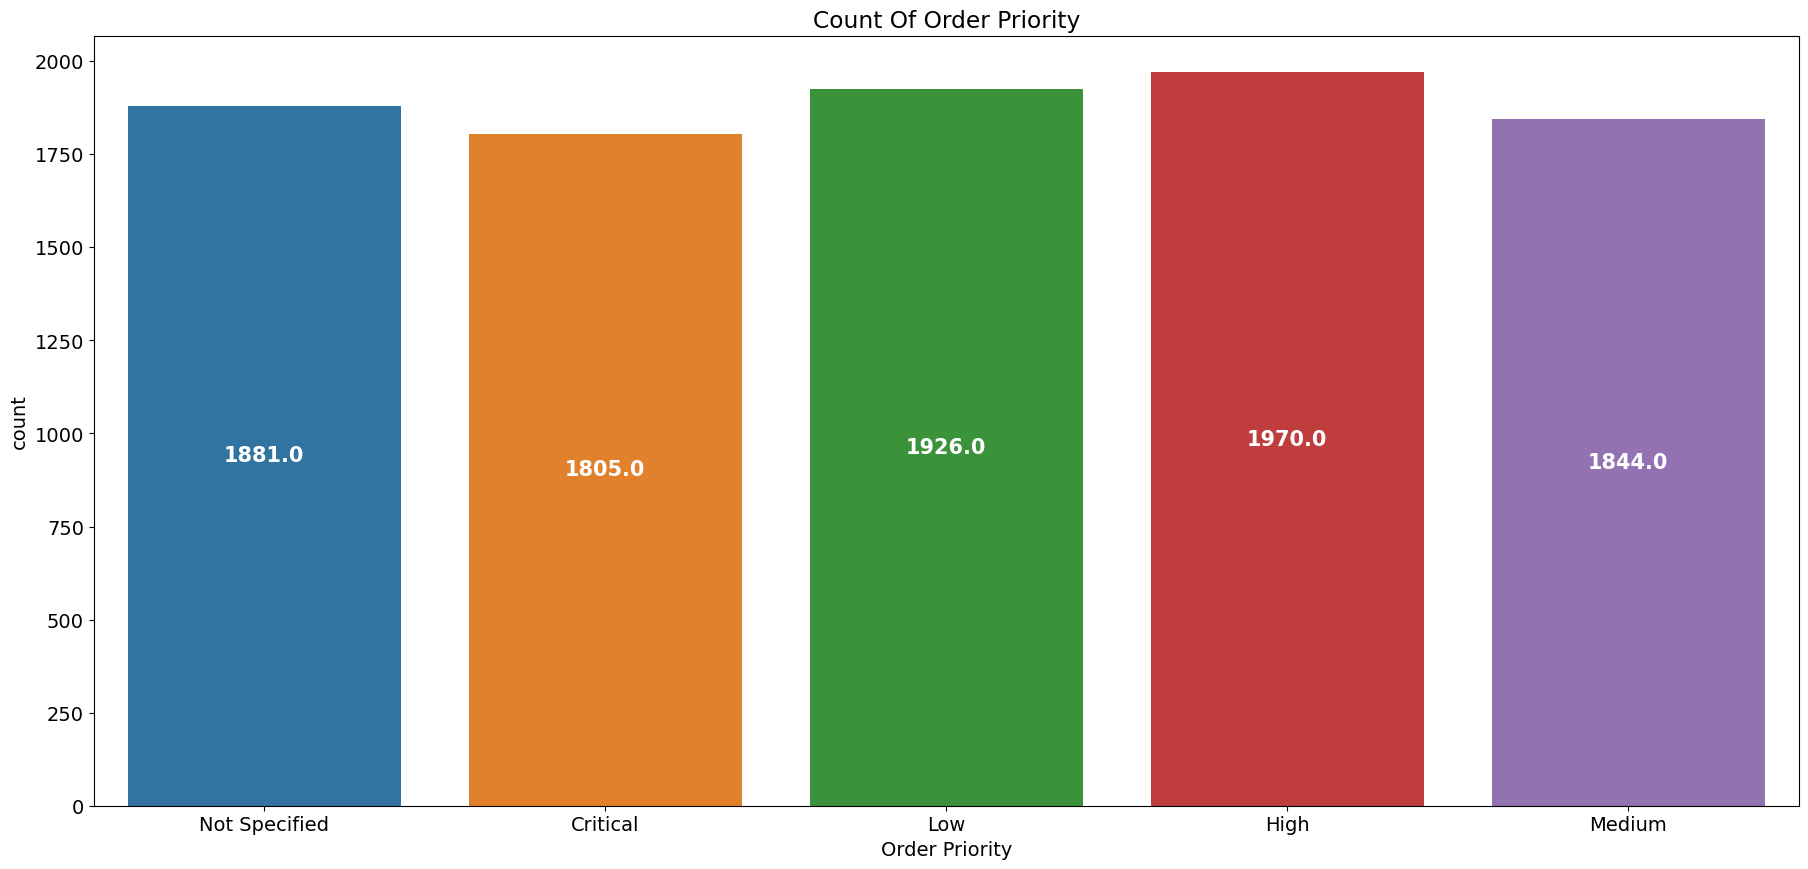

In [25]:
sns.countplot(x='Order Priority' , data=df )
plt.title('Count Of Order Priority')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')

plt.show()

#Critical means -> instant delivery bcz of some emergency.

- All are more or less similarly Distributed, so no need to advancement in Order_priority features
- suppose if high_priority orders are more (above 50%) then we have to focus more on **Fast_Packaging and processing_of_order** **Fast_delivery_services** 

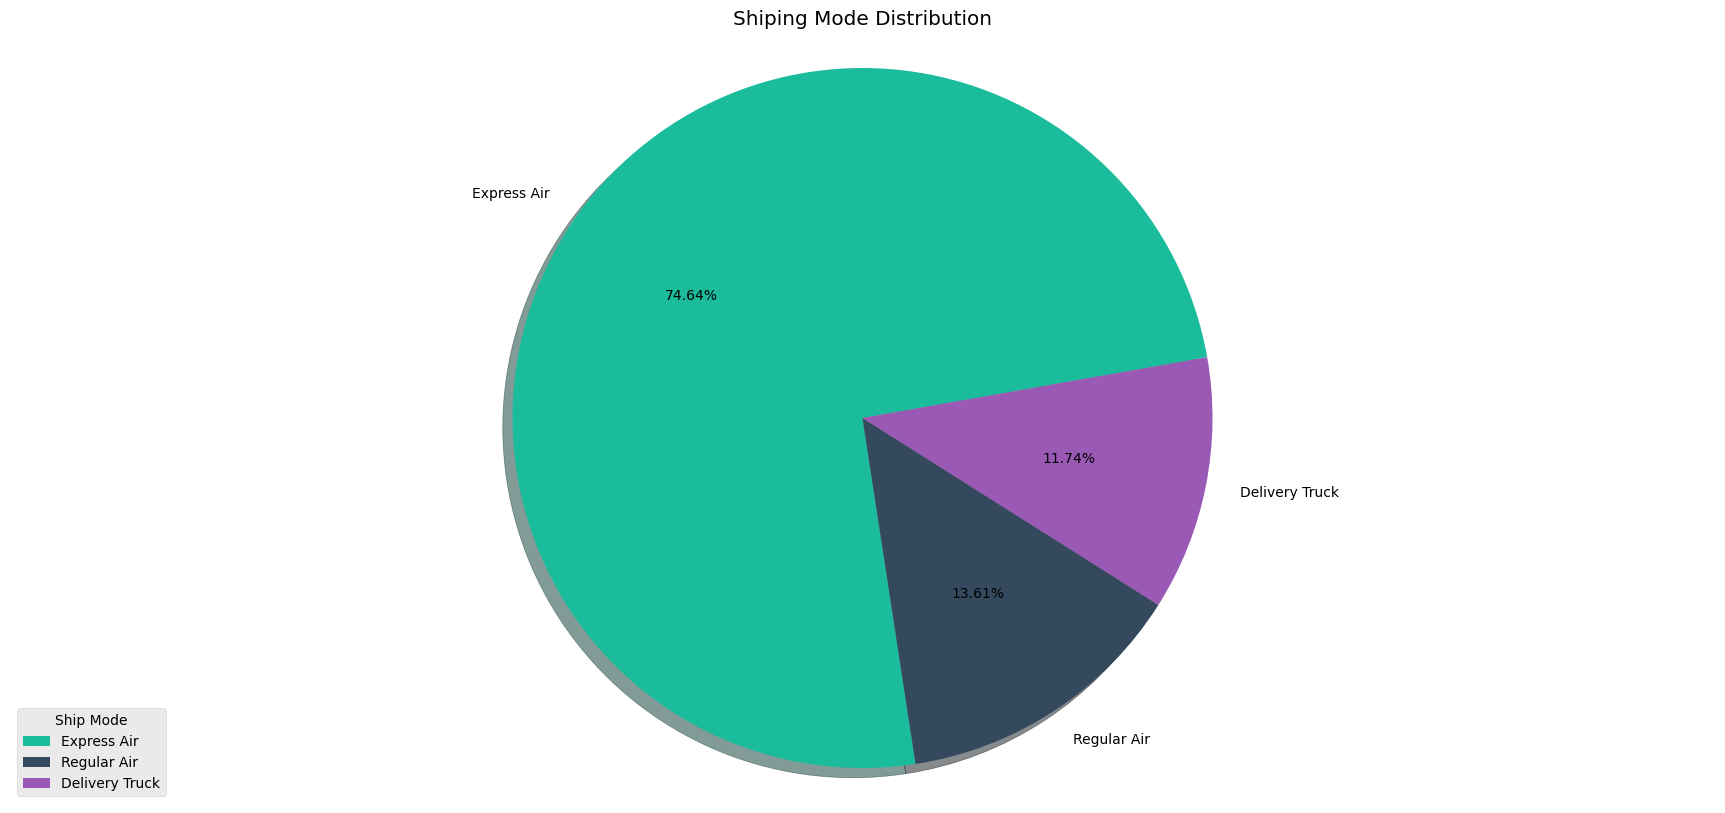

In [26]:
plt.style.use('ggplot')
plt.pie(x = list(df['Ship Mode'].value_counts()) ,shadow=True, labels = list(df['Ship Mode'].unique()) , startangle=10 , autopct='%0.2f%%',colors=["#1abc9c", "#34495e", "#9b59b6"] )
plt.legend(title='Ship Mode' , loc='lower left')
plt.axis('equal')
plt.title('Shiping Mode Distribution')
plt.show()

- We can talk with Regular Air company and negotiate the charge bcz we are giving them more customer
- assign less no of trucks

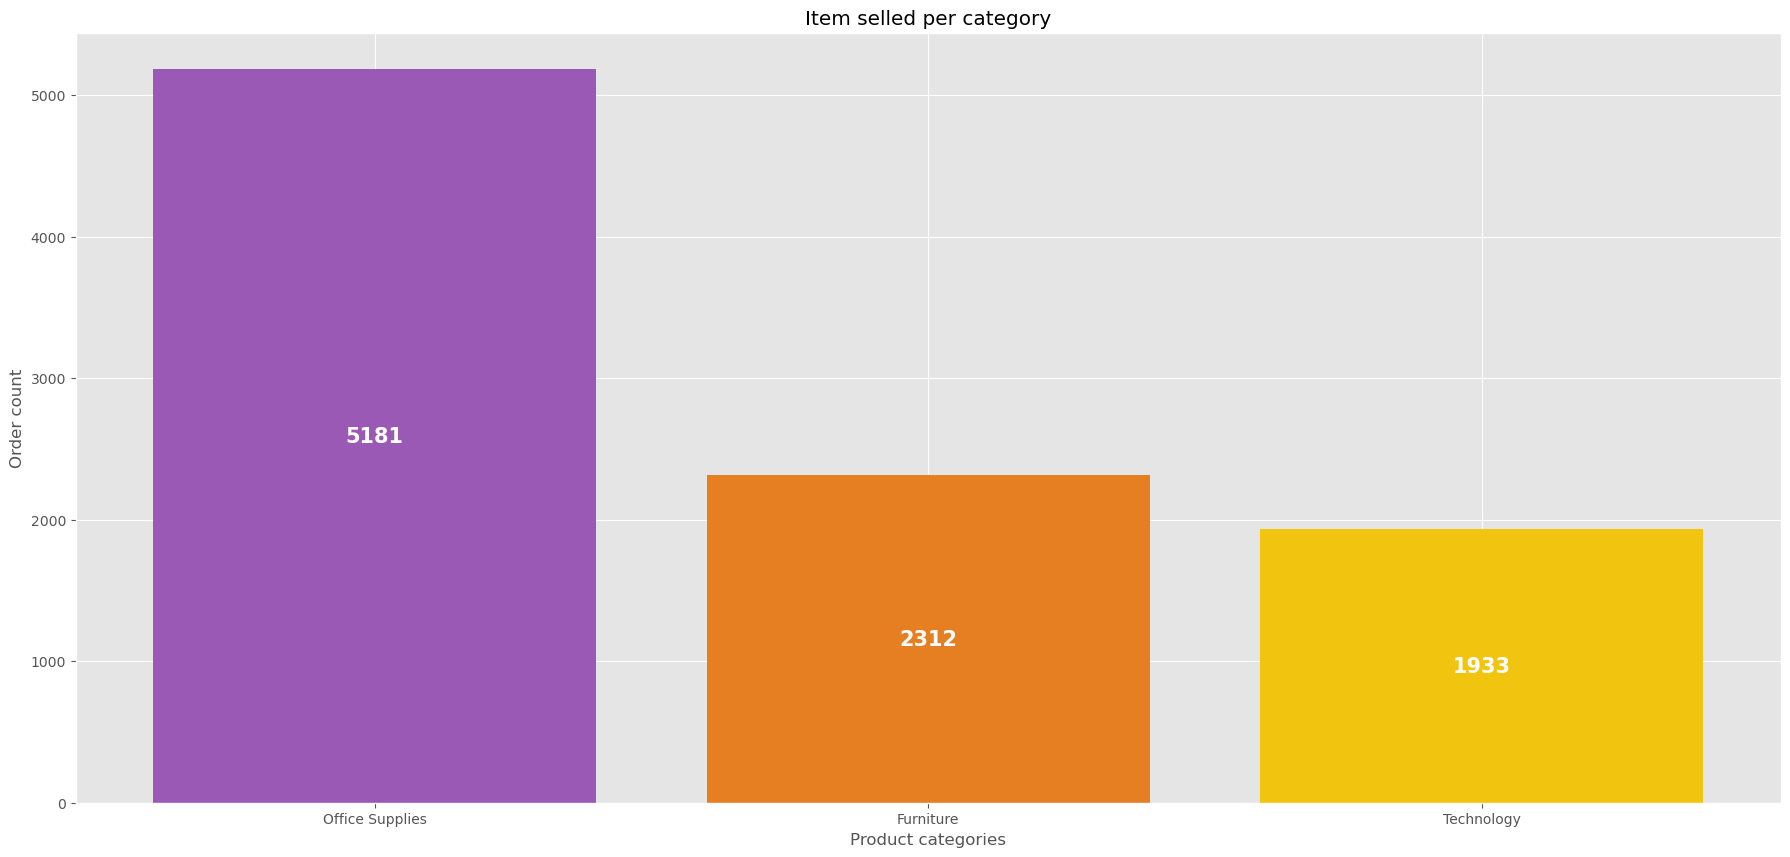

In [27]:
plt.bar( x = list(df['Product Category'].unique()), height = list(df['Product Category'].value_counts()) , color = ["#9b59b6", "#e67e22", "#f1c40f"] )
plt.xlabel('Product categories')
plt.ylabel('Order count')
plt.title('Item selled per category')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')

plt.show()

- we had delivered more office supplies compare to other 2 categories.
- we have large office audience/customers

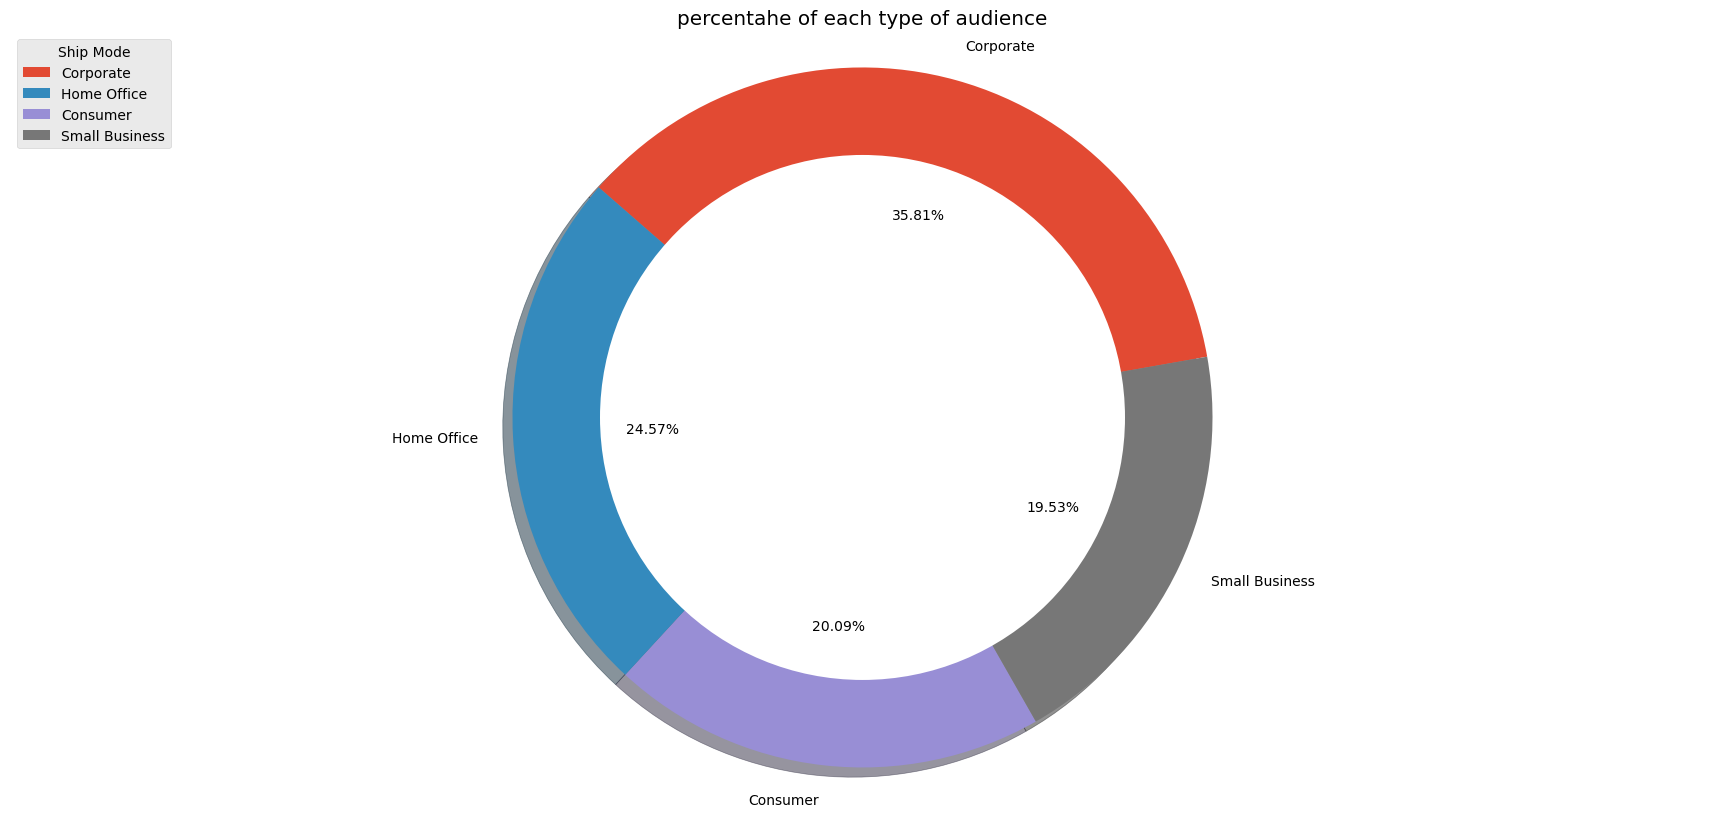

In [28]:
plt.style.use('ggplot')
plt.pie(x = list(df['Customer Segment'].value_counts()) ,shadow=True, labels = list(df['Customer Segment'].value_counts().index) , startangle=10 , autopct='%0.2f%%')
plt.legend(title='Ship Mode' , loc='upper left')
plt.axis('equal')
plt.title('percentahe of each type of audience')

circle = plt.Circle(xy=(0,0),radius=.75 , facecolor='white')
plt.gca().add_artist(circle)
plt.show()

plt.show()

- More customer belongs from Corporate Filed

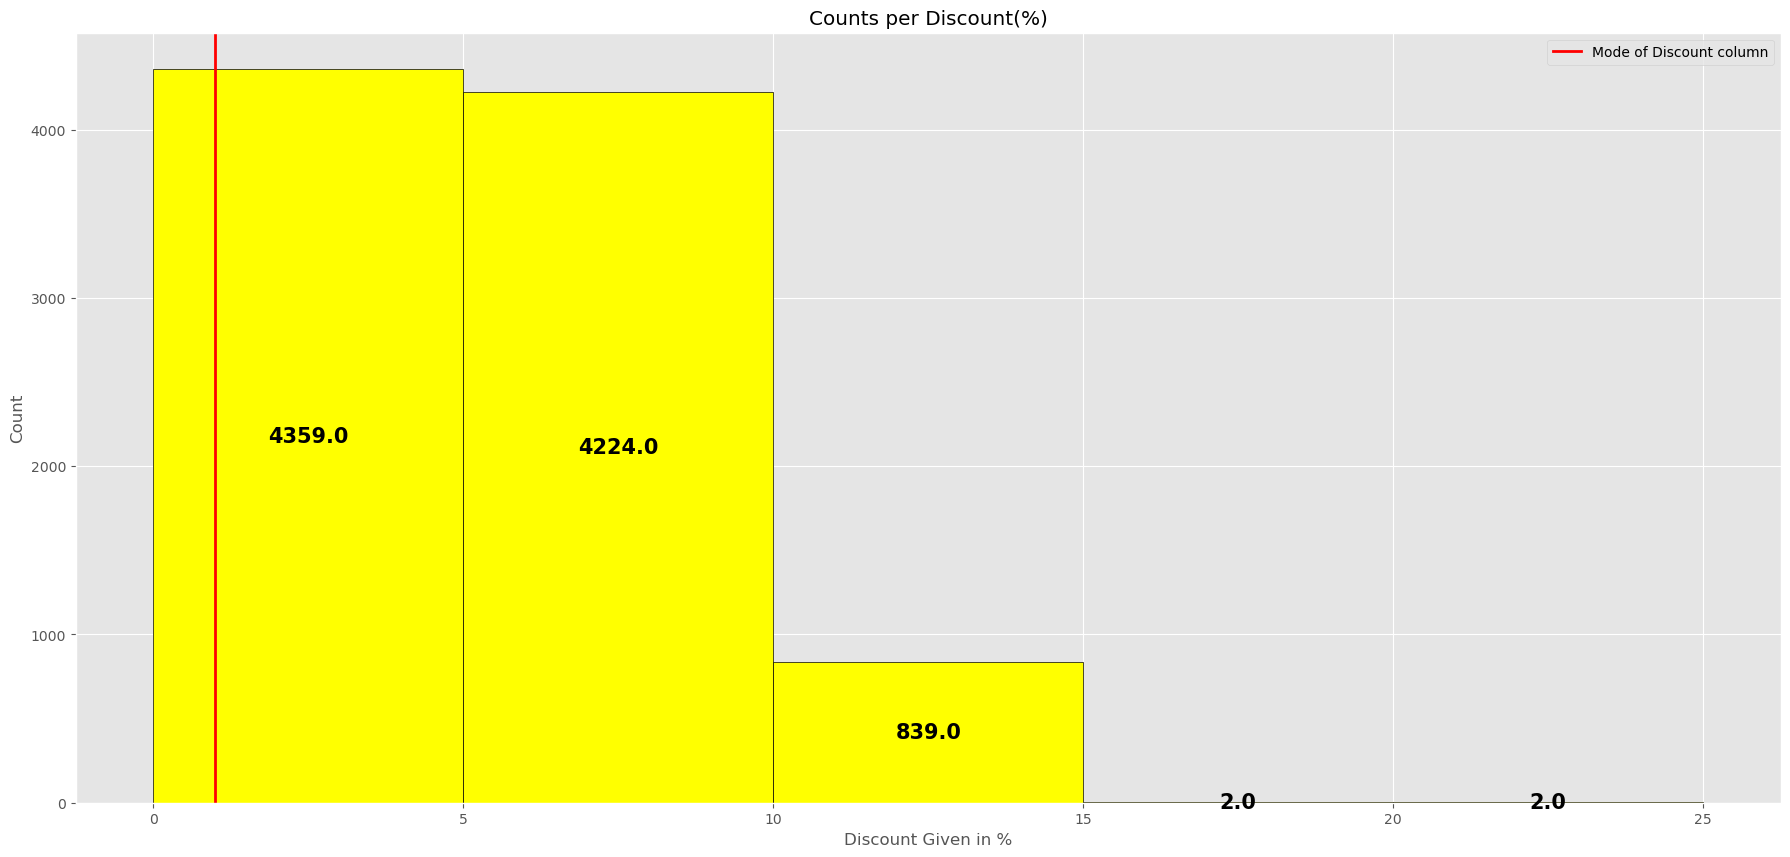

In [29]:
plt.hist(df['Discount']*100  , bins=5, edgecolor='black' , color='yellow' )
plt.axvline( df['Discount'].mode()[0]*100 ,color='red',label='Mode of Discount column',linewidth=2)#axis varticalline.
plt.xlabel('Discount Given in %')
plt.ylabel('Count')
plt.title('Counts per Discount(%)')
plt.legend()

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='black', fontsize=15, fontweight='bold')

plt.show()
#In our dataset,,,for all order discount is given..

In [30]:
df['Discount'].value_counts()
#df['Discount'].value_counts().index -> you will get 0.01,0.03...etc
#df['Discount'].value_counts().values -> you will get counts of each discount
#For below result u have to do group by on Discount and then use count(*) aggregation ,,,in SQL
#sum the values you get 9426(rows count in dataset)

Discount
0.01    898
0.03    882
0.05    879
0.09    871
0.02    870
0.04    861
0.08    850
0.00    848
0.10    838
0.06    821
0.07    803
0.21      1
0.17      1
0.11      1
0.16      1
0.25      1
Name: count, dtype: int64

- 11%,17%,21%,25% are Outliers,,we have given it to very less customers as u see.**So we can conclude that atmost discount given is ranges from 1% to 7%**
- df['Discount'].mode()[0]*100 => 1.0% discount is given more no of times to user
- Except Outliers,remaining discounts are almost distributed similarly

<Axes: xlabel='Discount', ylabel='Density'>

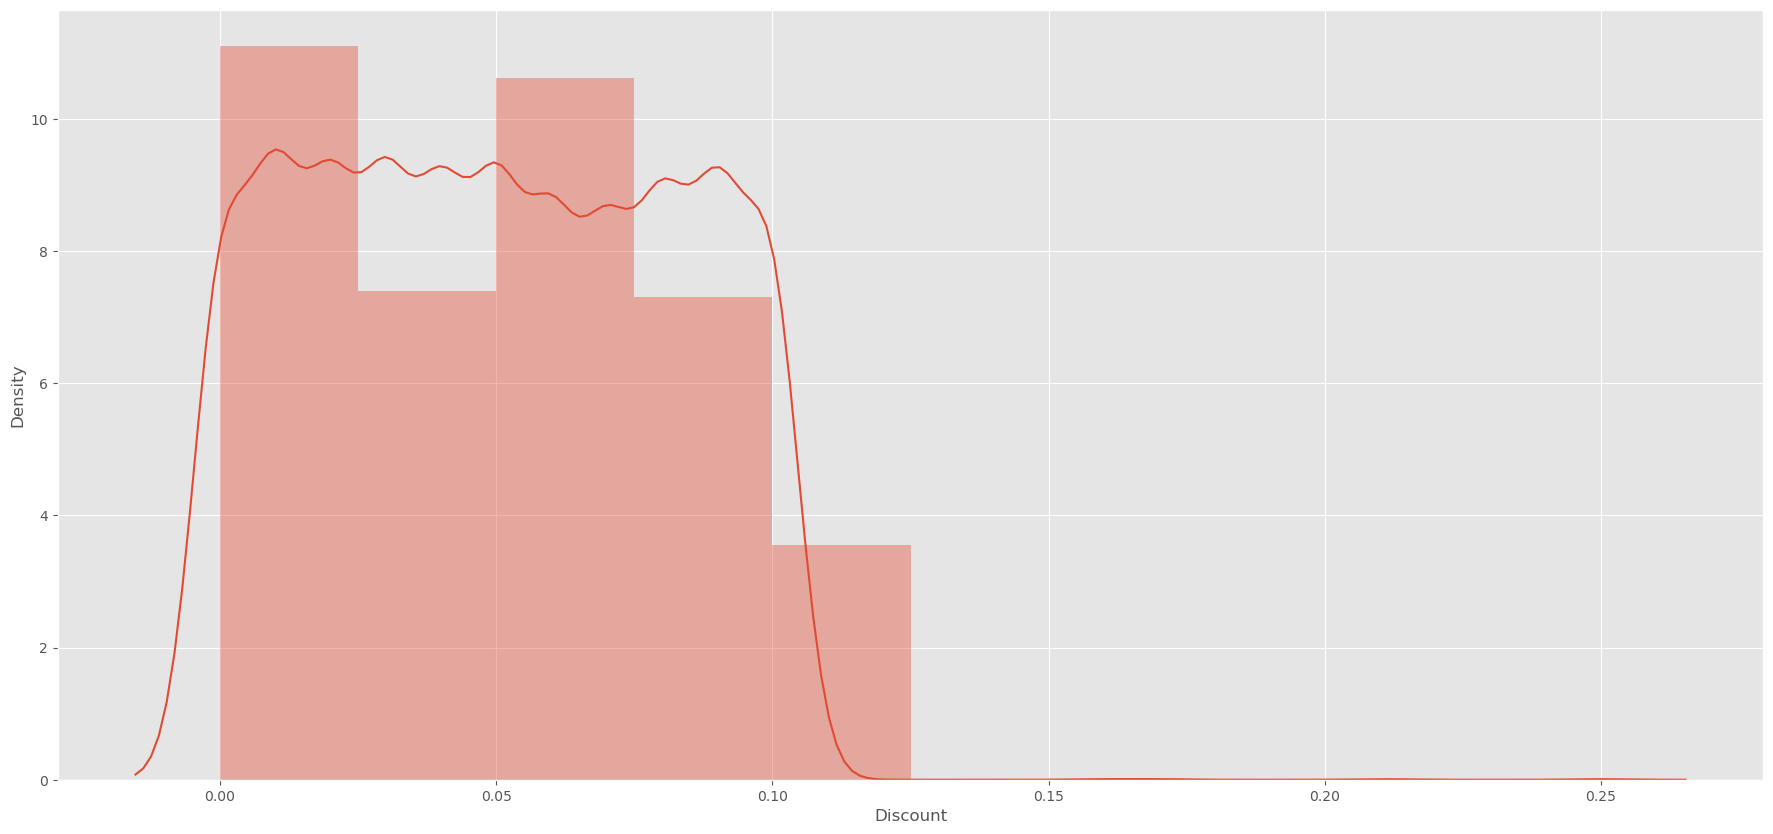

In [31]:
sns.distplot(df['Discount'] , bins=10)
#Y-Axis represent probability(0 to 1),,,,,but labels on Y-axis represent % ie; 0%,2%,4%,6%,10%  
#convert them into probability 2/100=>0.02 , 6/100=>0.06 , 10/100=>0.1..............(0 to 1) is mapped to (0% to 100%)
#1% = 1/100
#X-Axis represent Discount
#Line on histogram represent PDF(Probability density fnc) or KDE(Kernel density func)

#Used to check skeweness in data

In [32]:
df['Discount'].skew()
#VVVVIIIMMPPP---interview
#if it is value is perfectly 0 then this data distribution is "symmetric" or we can say normal distribution of data..("NOT SKEWED")
#if it is +ve and more than 0 ,,then data distribution is "RIGH SKEWED"(positively skewed).....lesser value and middle value should be more or less more_in_quantity and Larger value are less compare to lower and middle value
#if it is -ve and less than 0 ,,then data distribution is "LEFT SKEWED"(negatively skewed).....larger value and middle value should be more or less more_in_quantity and lesser value are less compare to larger and middle value

#as u see,,in aboe graph/discount data distribution,,lesser discount and medium discount are more and larger discount are less in uantity,,so we can say distribution of discount data/column is "RIGHT SKEWED"
#MEANS is highly biased to OUTLIERS

#---------OR--------------


#0.07*100 => 7%,,thus it is more than 0 and +ve ,,we can say data is distribution is "RIGHT SKEWED".....thus "mean" value of discount data is more than "median" value and "median" is always greater than "mode",,,you can see it clearly in graph/distribution graph like above
#mean_value > median_value > mode_value

#If it is 0.00xxxxx then we can say "NORMAL DISTRIBUTION" of discount data..........mean,median,mode values are equal
#mean ~ median ~ mode

#If it is -0.0xxxxx then we can say "LEFT SKEWED" of discount data............."mean" value is less than "median" value
##mean_value < median_value < mode_value

0.07204455117900106

- Histplot or histogram will give you Number of item(from x axis) present in range (in terms of bins)
- Distplot will provide you **KDE or pdf** along with histplot,,,where it will give probability(y-axis) of presence_of_item(X-axis).
- ex-> above, **probability of being 10%(0.1) discount is 8% or 0.08**
- ie; 10% is a discount on item and 0.08 is probability of that item present in data
- conclusion **8% of data present in our dataset where we have given 10% discount**
- **From above plot we conclude that probaility distribution is almost constant between range 1% to 7% discounts...And probability of being discount (11% to 21% is very less,,aroung 0.0001)**
- we also conclude that **Discount data distribution is RIGHT SKEWED...as u see graph is eleveated along right side (11% to 21%)**
- mean > median > mode

Text(0.5, 1.0, 'Discount Data Distribution')

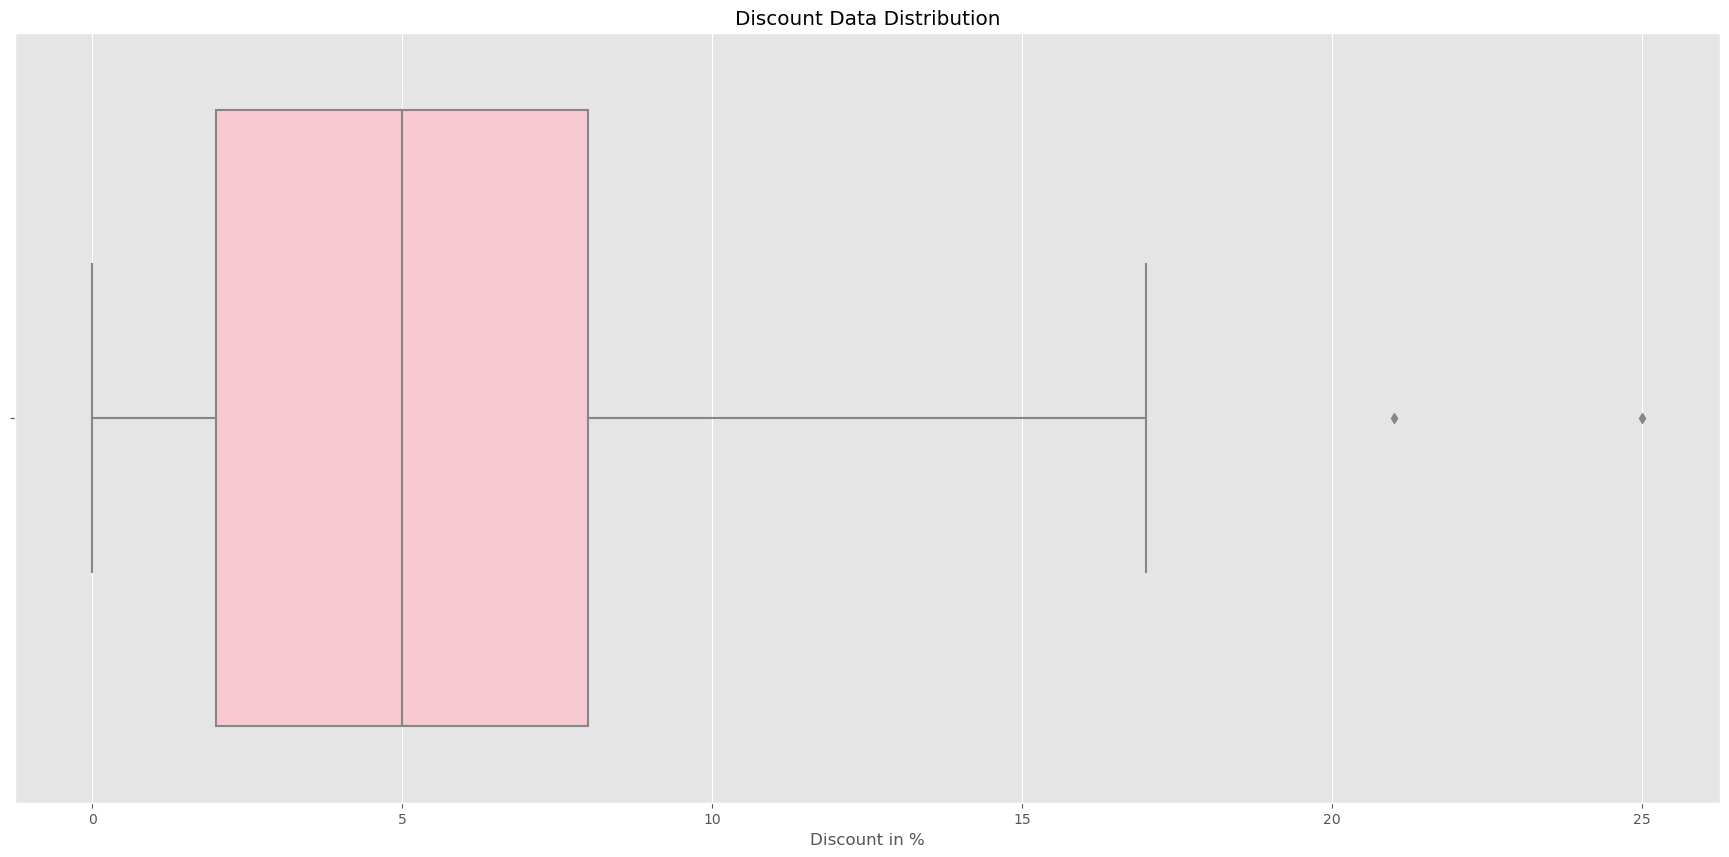

In [33]:
#VVVIIMMPP INterview
#BOX-PLOT (GIVEs "5 Number Summary" about data)
# 25th percentile -> in our dataset 25 percent values are lesser than 25th percentile value  and remaining 75 percent values are greater than 25th percentile value..
#Minimum -> it is not minimum value of our dataset,,rather it is (Q1 - 1.5*IQR)  ,, Q1=25th percentile value , iqr=Q3-Q1 ,,,thus this calculated minimum value may be present or not present in our dataset
#Same for Maximum
#See boxplot image-> "D:\AIML_PROGRAMS\3_matplotlib\box_plot_2.jpg"
#And values which are outside of calculated Minimum and Maximum is known as "POTENTIAL OUTLIERS"

#Conclusion
#Using BOX plot we can check hou much data is noisy and hou much data is outlier  and check skeweness

#if we have more outliers towards maximum value compare to outliers present at minimum side,,then data is right skewed
#if more outliers towards minimum side the,,distribution is LEFT SKEWED
#both side more or less similar same no of outliers then NORMAL DISTRIBUTION

sns.boxplot(x=df['Discount']*100 , color='pink')
#Use here stripplot to see all data points...
plt.xlabel('Discount in %')
plt.title('Discount Data Distribution')
#y is not require for this,,,,,,we are analyzing data distribution,,doesnt measuring any thing.
#as u see below,,it is right skewed data distribution......ie;Disciunt clumn data is right skewed..

- more data in the range of 1% to 7%....we call it as interquartile range

<Axes: xlabel='Unit Price'>

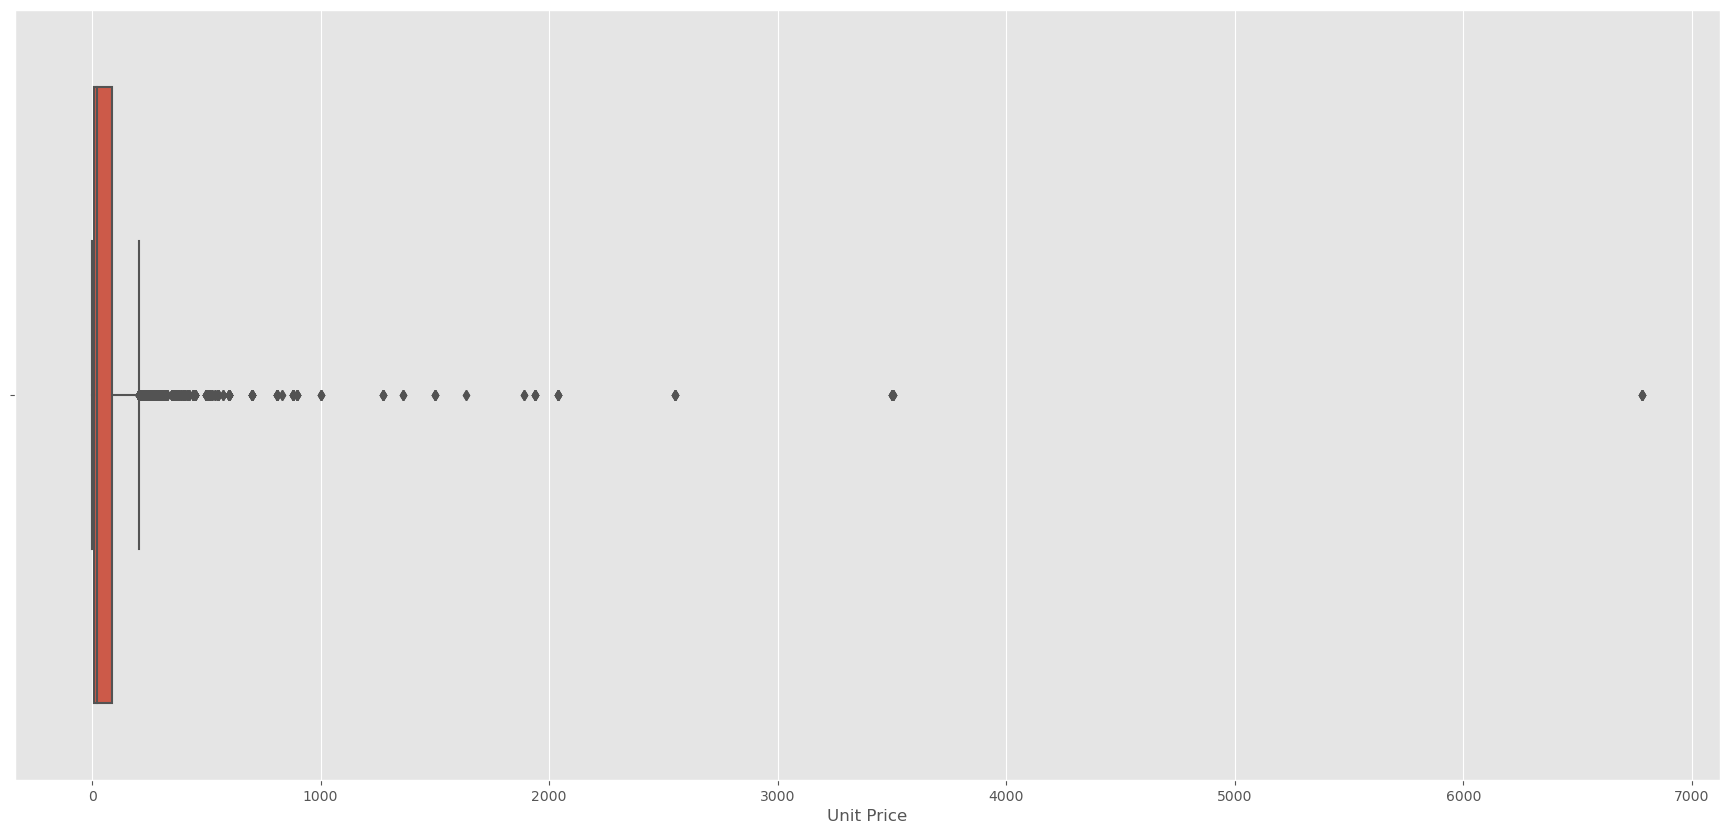

In [34]:
sns.boxplot(x=df['Unit Price'])

In [35]:
df['Unit Price'].skew()
#highly right skewed Unit Price data distribution
#More outliers
#RIGHT SJEWED Or POSITIVELY SKEWED,,,,,mean > median > mode

14.135145875361156

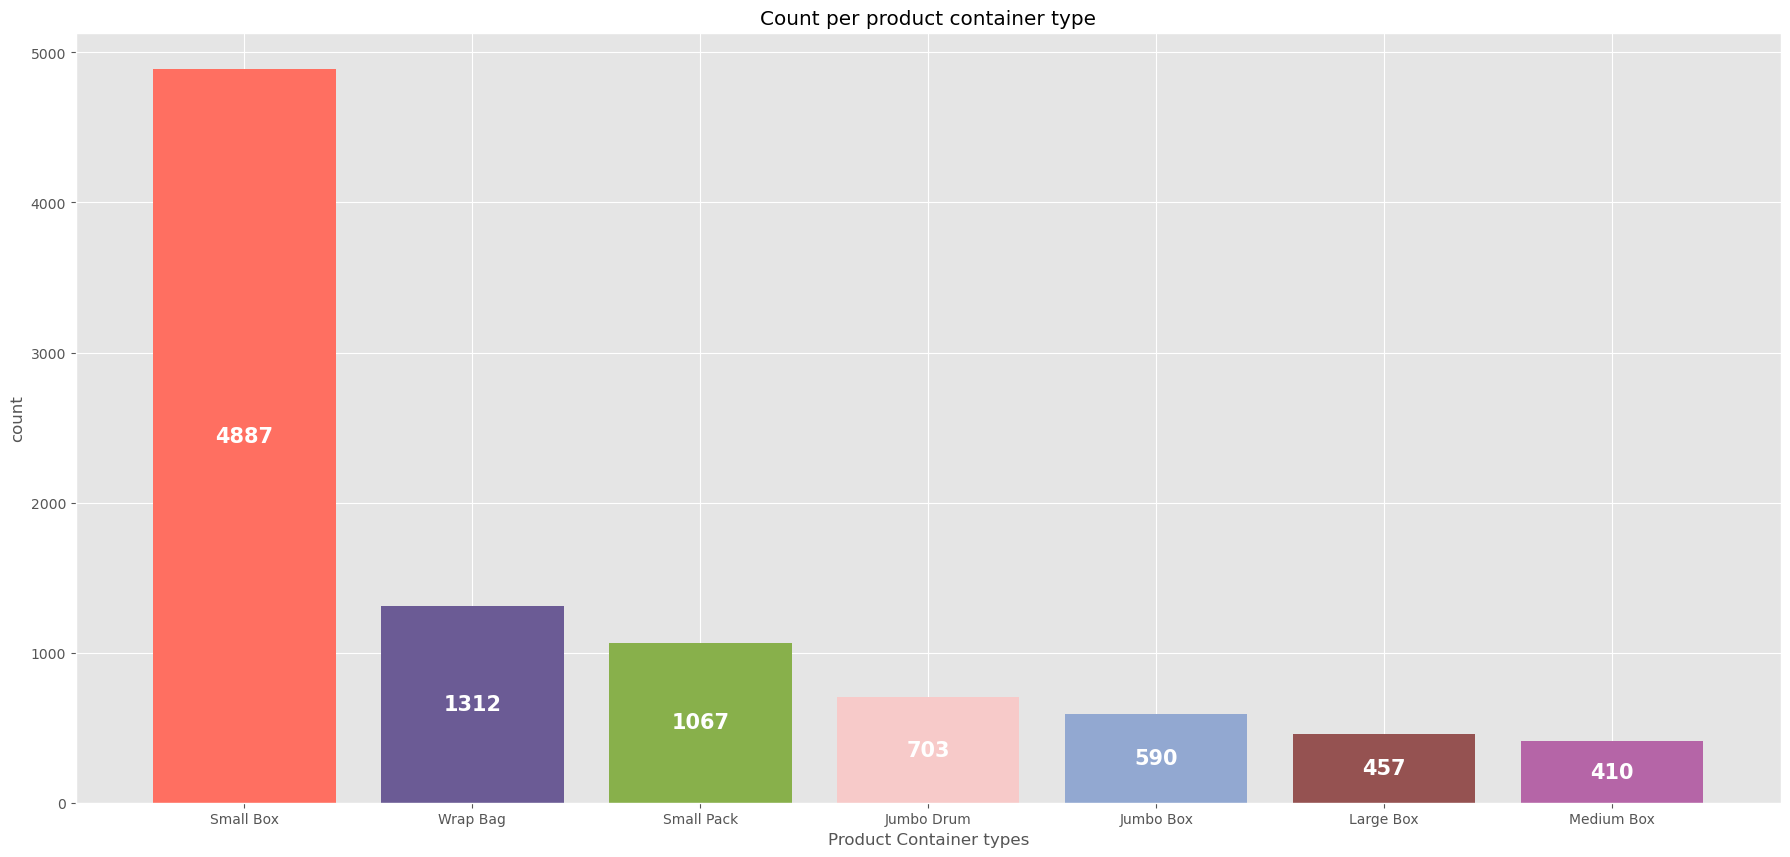

In [36]:
plt.bar( x = list(df['Product Container'].value_counts().index) , height = list(df['Product Container'].value_counts().values) , color= ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7']  )
plt.title('Count per product container type')
plt.xlabel('Product Container types')
plt.ylabel('count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')

plt.show()

In [37]:
df['Product Container'].value_counts()
#  -----OR-----
# t2 = df.groupby('Product Container')
# t2['Product Container'].count()

Product Container
Small Box     4887
Wrap Bag      1312
Small Pack    1067
Jumbo Drum     703
Jumbo Box      590
Large Box      457
Medium Box     410
Name: count, dtype: int64

### b) Bi-Variate Analysis

- numerical - categorical => Bar plot , Box plot , Dist plot , 
- numerical - numerical   => Scatter plot , Line plot , joint plot(histogram(For univariate) and scatter plot(Bivariate))
- categorical - categprical => heatmap , cluster map 
- PAIRPLOT -> Collections of scatter plot.....if you want to draw scatter plot for each and every numerical column present in your dataset then it is very time consuming task to get all numerical columns and apply scatterplot individually,,,,,,,this problem is solved by this pairplot...here pairplot will automatically detect numerical columns present in dataframe/dataset and apply scatterplot b/n them.....see below

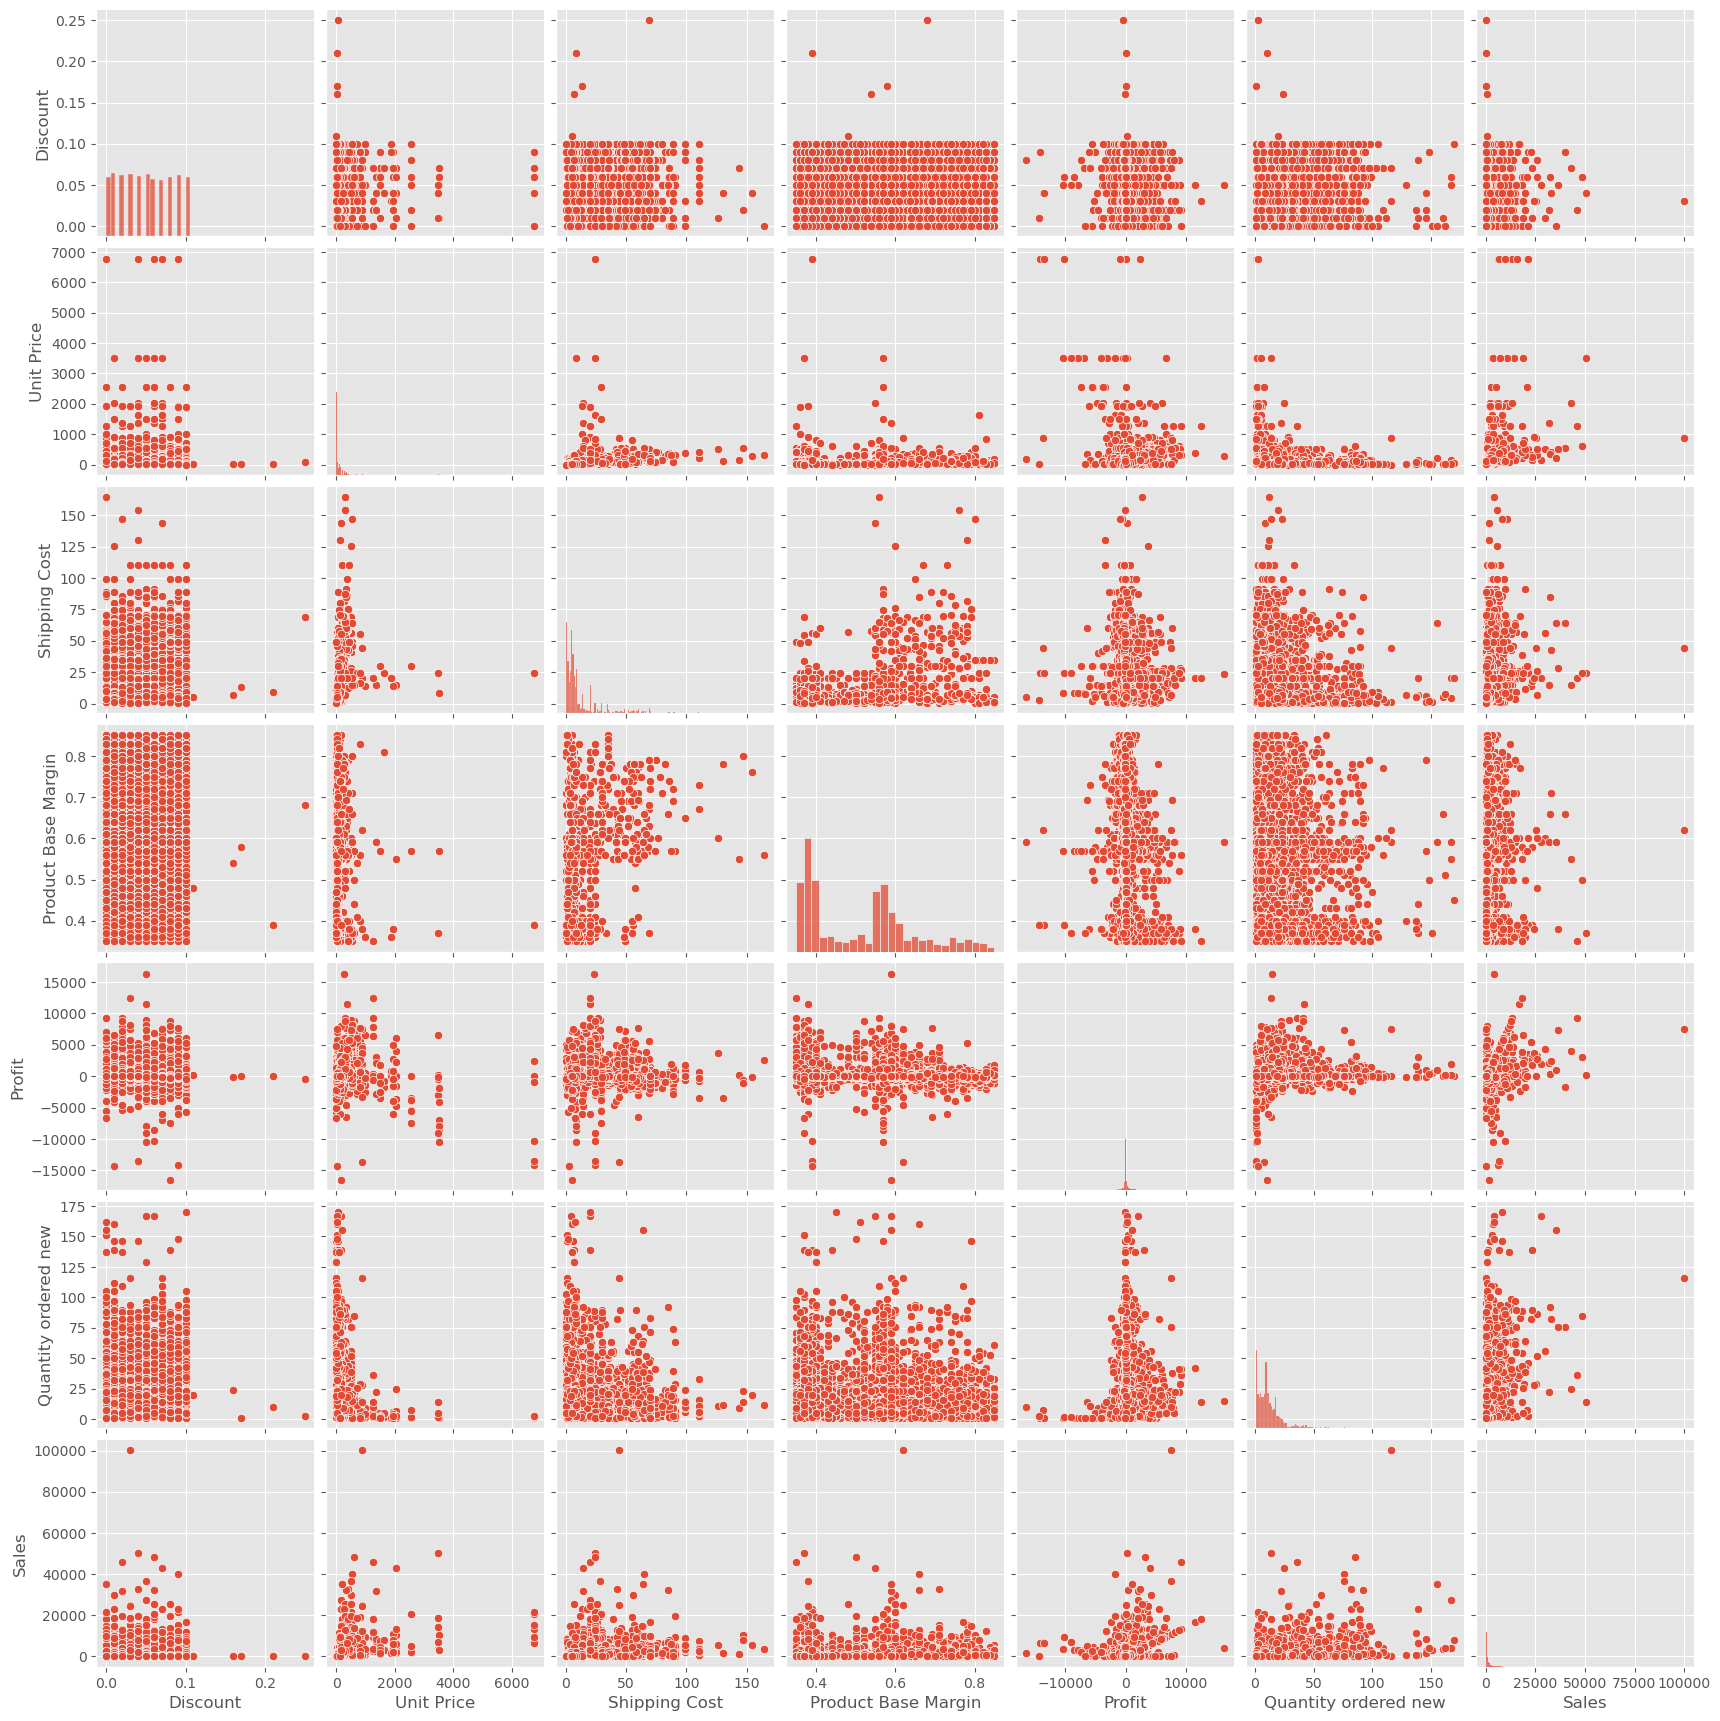

In [38]:
#Takes some time.....
#But i dont want rowid,customerid,orderid and postal_code....so i will remove them,,,otherwise it will make scatter plot for all...
sns.pairplot(df[['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost','Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales']]      )

#in "hue" parameter you can give any categorical or numeric column based on which analysis is done,,,,Then this become multi-variate analysis
#Daigonal-> relationship of column with itself

#### Discount : 
- As u see sales are more only for discounts ranges from 1% to 10% ....
- 99% of order done on discount.
- As "quantity_Ordered_new" increases "Unit_Price" decreses and become constant after 60 orders,want to discuss why it is like that?
- Everything is self explanatory

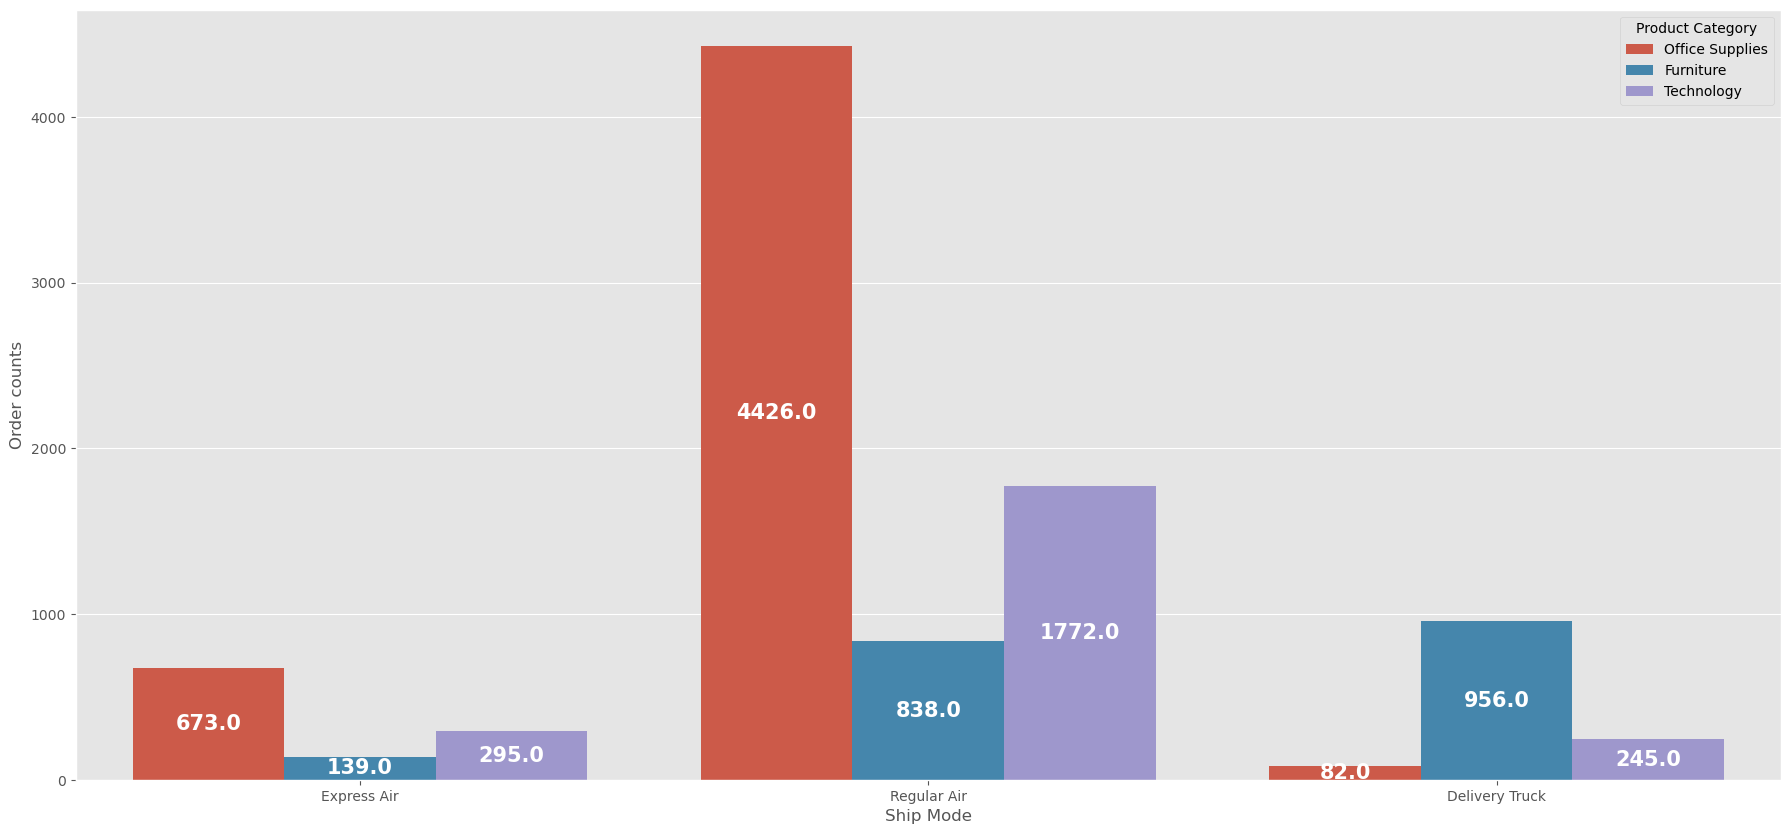

In [39]:

sns.countplot(data=df , x='Ship Mode' , hue='Product Category')
plt.ylabel('Order counts')

# Add count annotations on top of the bars
# for p in plt.gca().patches:
#     plt.gca().annotate(f'{p.get_height()}', 
#                        (p.get_x() + p.get_width() / 2., p.get_height()), 
#                        ha='center', va='center', 
#                        xytext=(0, 10), 
#                        textcoords='offset points')

# plt.show()

# Add count annotations inside the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')

plt.show()

# plt.gca().patches gives you a list of all the bars in the plot.
# p.get_height() gives you the height of the bar, which corresponds to the count.
# p.get_x() and p.get_width() are used to position the text at the center of the bar.
# xytext=(0, 10) offsets the text by 10 points above the bar.

### c) Multi-Variate Analysis

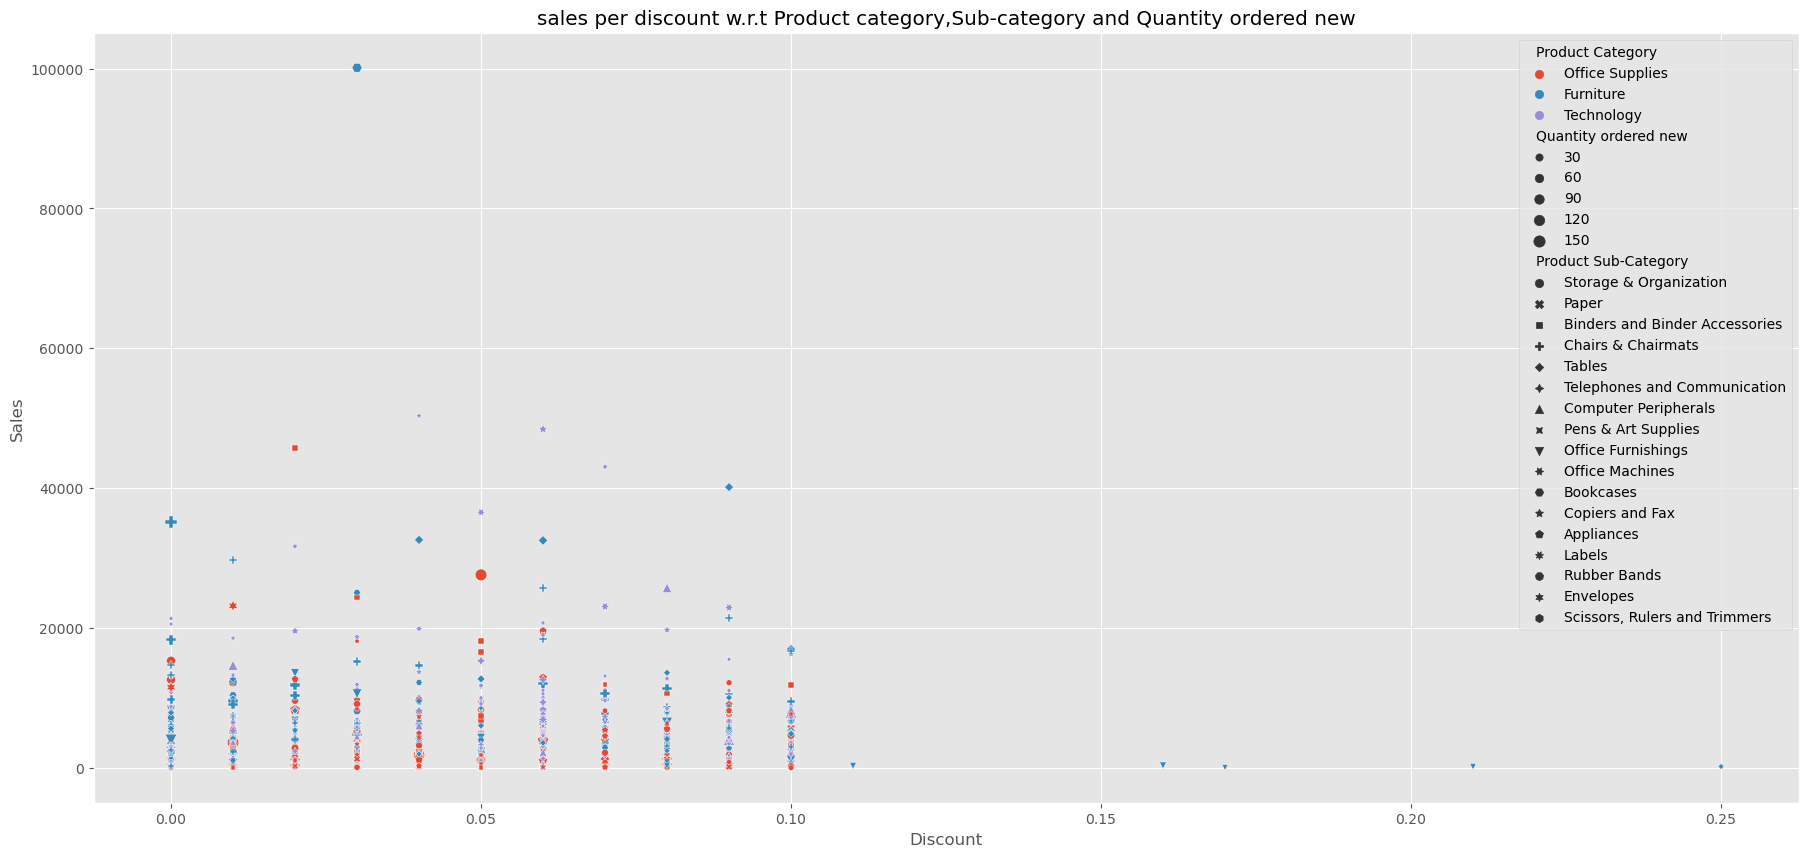

In [40]:
sns.scatterplot( x = 'Discount' , y = 'Sales' , hue = 'Product Category' , style = 'Product Sub-Category', size= 'Quantity ordered new' , data=df)
plt.title('sales per discount w.r.t Product category,Sub-category and Quantity ordered new')
plt.show()
#5 columns are used for visualization or analysis,,,,multivariate analysis..

Text(0.5, 1.0, 'Sales on each product category w.r.t product sub category')

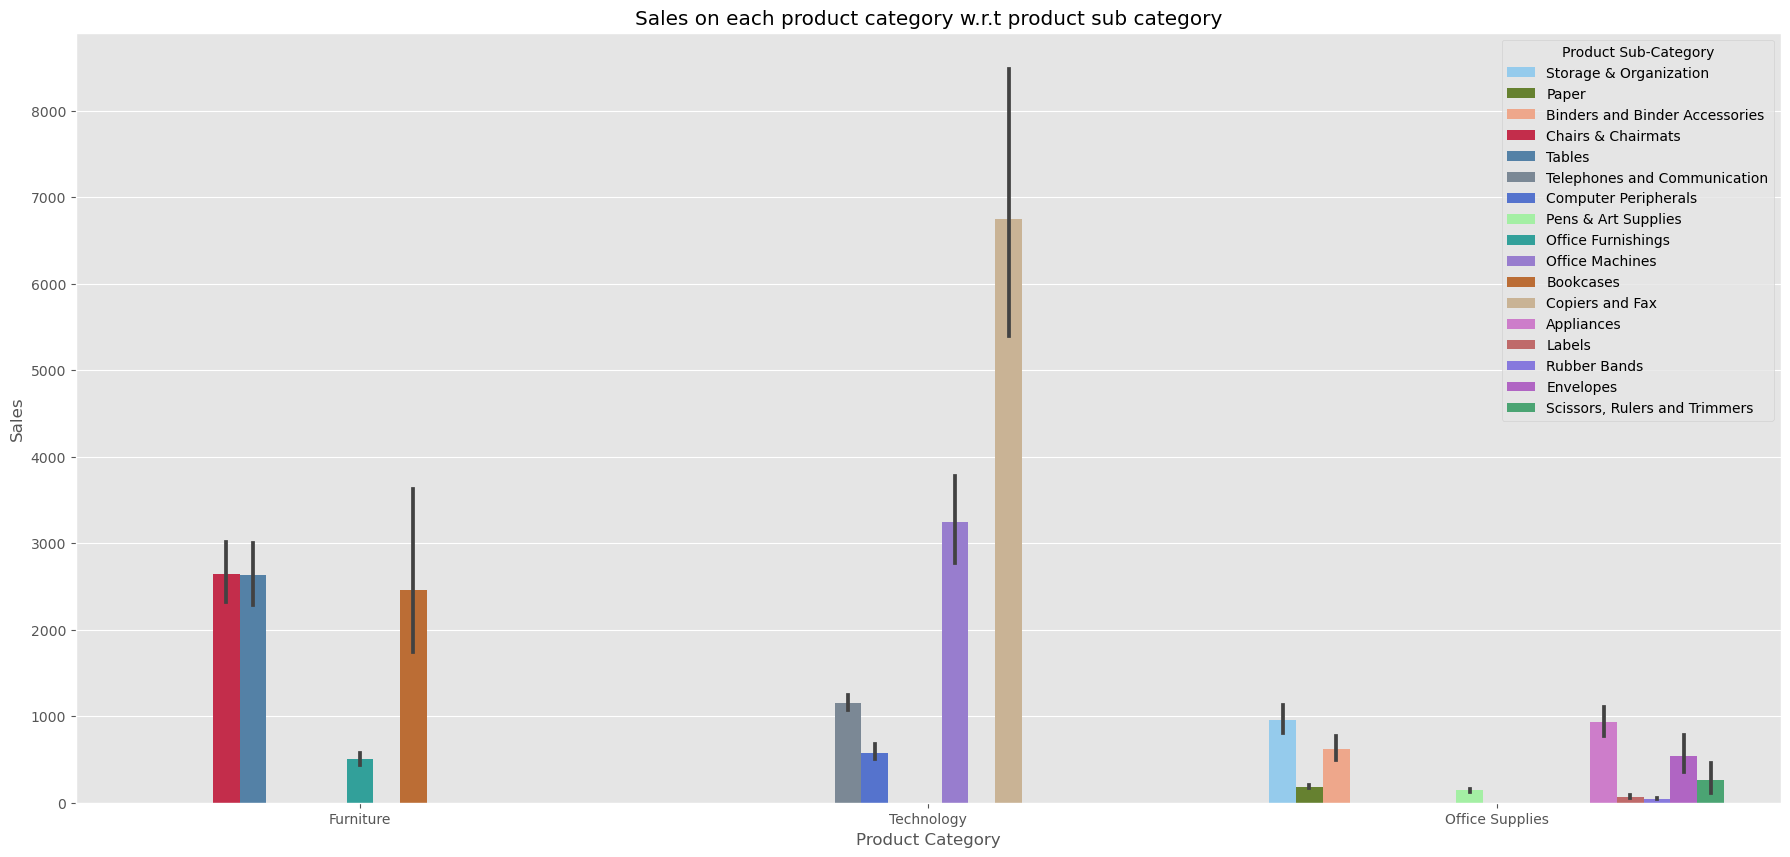

In [41]:
ax = sns.barplot(data=df , x = 'Product Category' , y = 'Sales' , hue = 'Product Sub-Category' , palette = {
    "Bookcases": "#D2691E",  # Chocolate
    "Chairs & Chairmats": "#DC143C",  # Crimson
    "Office Furnishings": "#20B2AA",  # Light Sea Green
    "Tables": "#4682B4",  # Steel Blue
    "Appliances": "#DA70D6",  # Orchid
    "Binders and Binder Accessories": "#FFA07A",  # Light Salmon
    "Envelopes": "#BA55D3",  # Medium Orchid
    "Labels": "#CD5C5C",  # Indian Red
    "Paper": "#6B8E23",  # Olive Drab
    "Pens & Art Supplies": "#98FB98",  # Pale Green
    "Rubber Bands": "#7B68EE",  # Medium Slate Blue
    "Scissors, Rulers and Trimmers": "#3CB371",  # Medium Sea Green
    "Storage & Organization": "#87CEFA",  # Light Sky Blue
    "Computer Peripherals": "#4169E1",  # Royal Blue
    "Copiers and Fax": "#D2B48C",  # Tan
    "Office Machines": "#9370DB",  # Medium Purple
    "Telephones and Communication": "#778899"  # Light Slate Gray
}  , order=['Furniture','Technology' , 'Office Supplies'])
plt.title('Sales on each product category w.r.t product sub category')

# for i in ax.containers:
#     ax.bar_label(i,)

#Vertical bar on each bin represent 'confidence_interval'

In [42]:
df.groupby(['Product Category' , 'Product Sub-Category']).mean('Sales')['Sales']
#select avg(Sales) from table_name group by 'Product Category','Product Sub-Category'

Product Category  Product Sub-Category          
Furniture         Bookcases                         2463.565485
                  Chairs & Chairmats                2646.782182
                  Office Furnishings                 503.537973
                  Tables                            2628.517475
Office Supplies   Appliances                         928.298943
                  Binders and Binder Accessories     621.188804
                  Envelopes                          543.827316
                  Labels                              71.276292
                  Paper                              183.901603
                  Pens & Art Supplies                143.206089
                  Rubber Bands                        44.429590
                  Scissors, Rulers and Trimmers      260.831419
                  Storage & Organization             960.171984
Technology        Computer Peripherals               580.189752
                  Copiers and Fax                   674

### analyzing Product Category and customer segment on the basis of,,,bivariate analysis

<Axes: xlabel='Product Category', ylabel='Customer Segment'>

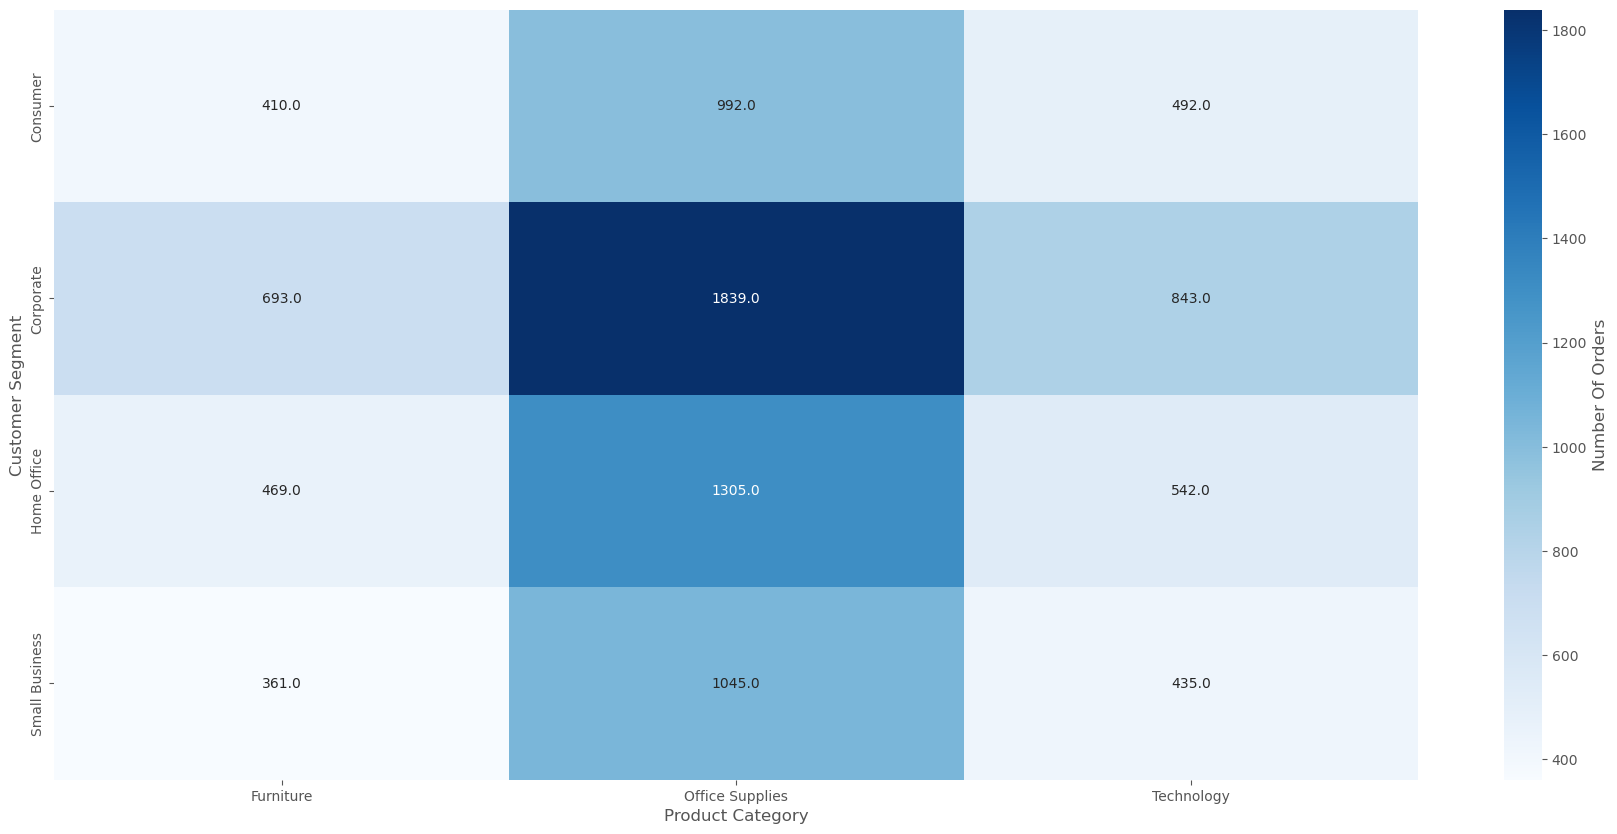

In [43]:
sns.heatmap( pd.crosstab(df['Customer Segment'] , df['Product Category']) , cmap='Blues' , cbar_kws = {'label':'Number Of Orders' } , annot=True , fmt='.1f' )
#Requires 2d matrix,,,or dataframe,,,,,(m x n) matrix...
#annotation is count of rows..we are not given Order ID,,,,internally heatmap will represent the counts of rows...

In [44]:
df.groupby(['Customer Segment' , 'Product Category' ]).count()['Order ID']#Counting rows for each group..
#MIN() , MAX() , MEAN() , SUM() , COUNT()  ->Are aggregation function for pandas dataframe..
#Orders done 
#IN SQL count(*) used to display the no of count in each group only 1 time,,,,but in pandas df if weuse just count() then all column with count is show which is not looks good,,so i am going to apply it on Order ID column,,but u can apply it on any other column also bcz count() works on any type of col
#min,max,mean,sum...works on int ot float type of column,,so we have to provide column on which u want to perform these 4 aggregation..like this mean('Sales')...if u use just mean() then it will give u error,,bcz internally it tries to calculate mean for each column of df,,bcz we called mean on df...so..

Customer Segment  Product Category
Consumer          Furniture            410
                  Office Supplies      992
                  Technology           492
Corporate         Furniture            693
                  Office Supplies     1839
                  Technology           843
Home Office       Furniture            469
                  Office Supplies     1305
                  Technology           542
Small Business    Furniture            361
                  Office Supplies     1045
                  Technology           435
Name: Order ID, dtype: int64

- total Orders done in each sub category of product category

In [45]:
cs_pc_cnt = dict(df.groupby(['Customer Segment' , 'Product Category' ]).count()['Order ID'])
cs_pc_cnt

{('Consumer', 'Furniture'): 410,
 ('Consumer', 'Office Supplies'): 992,
 ('Consumer', 'Technology'): 492,
 ('Corporate', 'Furniture'): 693,
 ('Corporate', 'Office Supplies'): 1839,
 ('Corporate', 'Technology'): 843,
 ('Home Office', 'Furniture'): 469,
 ('Home Office', 'Office Supplies'): 1305,
 ('Home Office', 'Technology'): 542,
 ('Small Business', 'Furniture'): 361,
 ('Small Business', 'Office Supplies'): 1045,
 ('Small Business', 'Technology'): 435}

In [46]:
cs_cnt = dict(df.groupby('Customer Segment').count()['Order ID'])
cs_cnt

{'Consumer': 1894,
 'Corporate': 3375,
 'Home Office': 2316,
 'Small Business': 1841}

In [47]:
cs_pc_cnt_in_Percentage = dict()
for k  in cs_pc_cnt:
    cs_pc_cnt_in_Percentage[k] = round(cs_pc_cnt[k] * 100 /cs_cnt[k[0]] , 2)
print(cs_pc_cnt_in_Percentage)    

{('Consumer', 'Furniture'): 21.65, ('Consumer', 'Office Supplies'): 52.38, ('Consumer', 'Technology'): 25.98, ('Corporate', 'Furniture'): 20.53, ('Corporate', 'Office Supplies'): 54.49, ('Corporate', 'Technology'): 24.98, ('Home Office', 'Furniture'): 20.25, ('Home Office', 'Office Supplies'): 56.35, ('Home Office', 'Technology'): 23.4, ('Small Business', 'Furniture'): 19.61, ('Small Business', 'Office Supplies'): 56.76, ('Small Business', 'Technology'): 23.63}


In [48]:
order_percentage_for_product_category_wrt_subcategory = pd.DataFrame(columns=['Customer Segment' , 'Product Category' , 'order Percentage'])
order_percentage_for_product_category_wrt_subcategory

,Customer Segment,Product Category,order Percentage


In [49]:
for i in cs_pc_cnt_in_Percentage.items():
    order_percentage_for_product_category_wrt_subcategory.loc[len(order_percentage_for_product_category_wrt_subcategory.index)] = [ i[0][0] , i[0][1] , i[1] ]
order_percentage_for_product_category_wrt_subcategory

,Customer Segment,Product Category,order Percentage
0,Consumer,Furniture,21.65
1,Consumer,Office Supplies,52.38
2,Consumer,Technology,25.98
3,Corporate,Furniture,20.53
4,Corporate,Office Supplies,54.49
5,Corporate,Technology,24.98
6,Home Office,Furniture,20.25
7,Home Office,Office Supplies,56.35
8,Home Office,Technology,23.40
9,Small Business,Furniture,19.61


### PIVOT 

In [50]:
# df.picot() and df.pivot_table()

- **pivot()**
Simpler Use Case: The pivot function is used when you have a simple, well-structured DataFrame and want to reshape it based on specific columns.
No Aggregation: It does not allow for aggregation. It expects that the combination of index and columns will result in unique values for the pivoted DataFrame.
Parameters:
index: Column to use to make new frame's index.
columns: Column to use to make new frame's columns.
values: Column(s) to use for populating new frame's values
    
- **pivot_table()**
More Flexible: The pivot_table function is more versatile and is designed to handle more complex scenarios, including cases where data needs to be aggregated.
Aggregation: It allows for the aggregation of data using various functions like sum, mean, etc. This makes it useful for summarizing data.
Handling Duplicates: It can handle situations where the combination of index and columns is not unique by aggregating values.
Parameters:
values: Column(s) to aggregate.
index: Column(s) to use to make new frame’s index.
columns: Column(s) to use to make new frame’s columns.
aggfunc: Function to use for aggregation, default is numpy.mean.

In [51]:
order_percentage_in_each_category =order_percentage_for_product_category_wrt_subcategory.pivot(index='Customer Segment' , columns='Product Category')
order_percentage_in_each_category 
#MELT() function,,will convert reshape the dataset/dataframe to (m x '3'column)

order Percentage                           
Product Category        Furniture Office Supplies Technology
Customer Segment                                            
Consumer                    21.65           52.38      25.98
Corporate                   20.53           54.49      24.98
Home Office                 20.25           56.35      23.40
Small Business              19.61           56.76      23.63

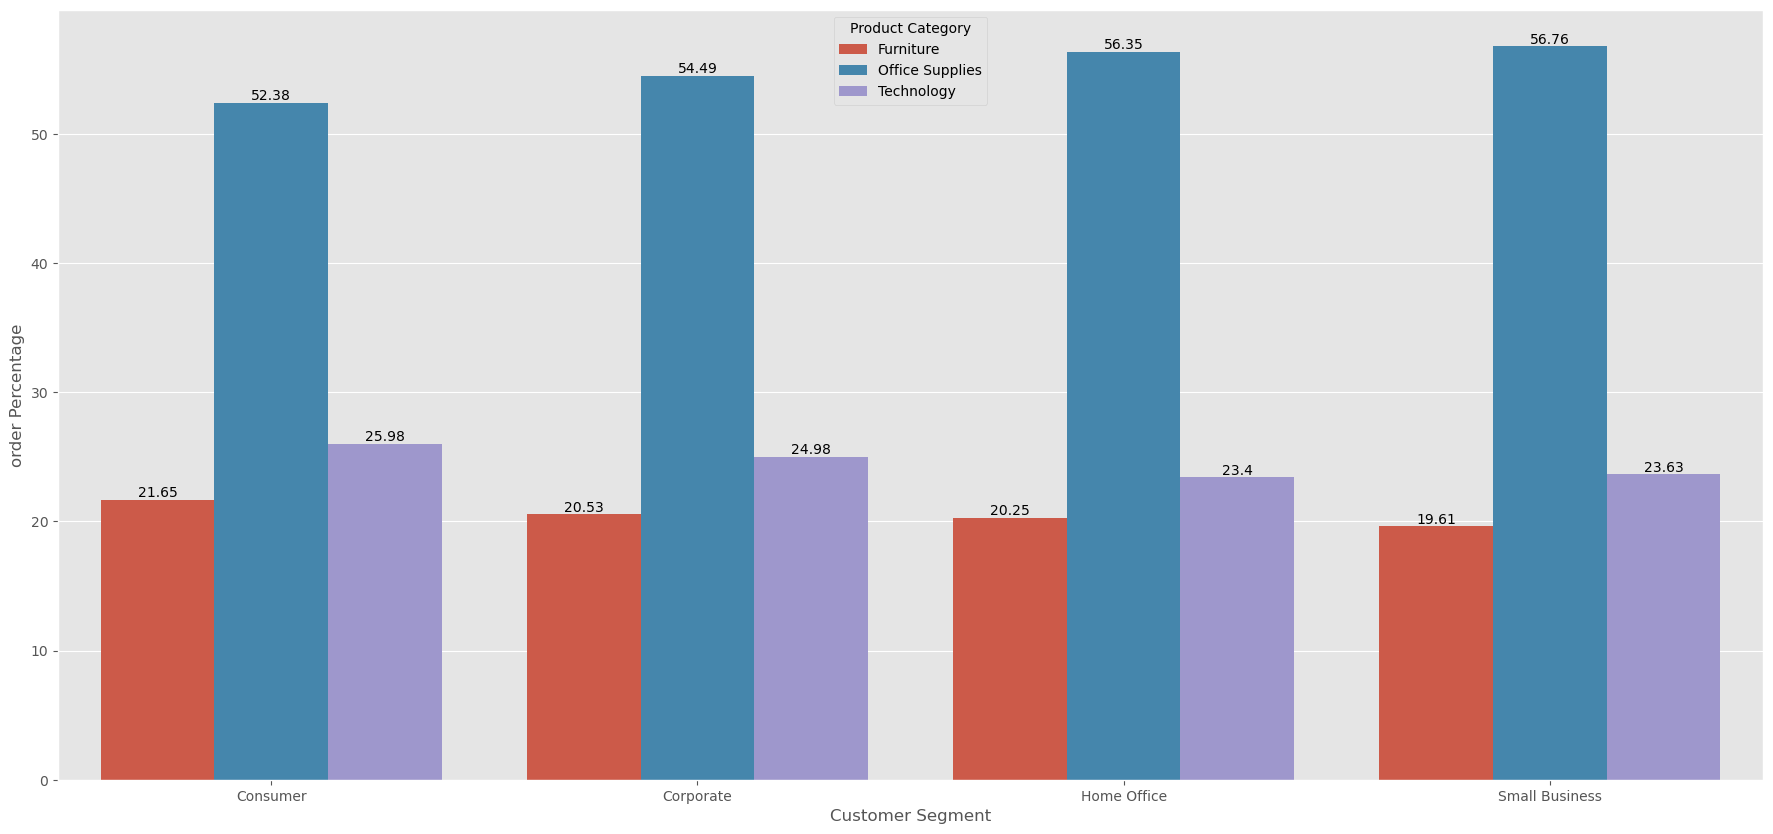

In [52]:
ax = sns.barplot(data=order_percentage_for_product_category_wrt_subcategory, x = 'Customer Segment' , y = 'order Percentage' , hue = 'Product Category')
for i in ax.containers:
    ax.bar_label(i,)


- order percentage for each Customers type is more or less same,,we have each type of customer engagement

### analyzing customer segment and product category by sales

In [53]:
cs_pc_sales_sum = dict(df.groupby(['Customer Segment' , 'Product Category' ]).sum('Sales')['Sales'])
cs_pc_sales_sum 

{('Consumer', 'Furniture'): 696466.86,
 ('Consumer', 'Office Supplies'): 423864.10000000003,
 ('Consumer', 'Technology'): 714884.26,
 ('Corporate', 'Furniture'): 1149285.67,
 ('Corporate', 'Office Supplies'): 737531.61,
 ('Corporate', 'Technology'): 1382573.79,
 ('Home Office', 'Furniture'): 776931.56,
 ('Home Office', 'Office Supplies'): 578479.75,
 ('Home Office', 'Technology'): 813540.72,
 ('Small Business', 'Furniture'): 555939.65,
 ('Small Business', 'Office Supplies'): 518450.09,
 ('Small Business', 'Technology'): 603983.26}

In [54]:
cs_sales_sum  = dict(df.groupby('Customer Segment').sum('Sales')['Sales'])
cs_sales_sum 

{'Consumer': 1835215.22,
 'Corporate': 3269391.07,
 'Home Office': 2168952.03,
 'Small Business': 1678373.0}

In [55]:
cs_pc_sales_sum_in_Percentage = dict()
for k  in cs_pc_sales_sum :
    cs_pc_sales_sum_in_Percentage[k] = round(cs_pc_sales_sum [k] * 100 /cs_sales_sum [k[0]] , 2)
print(cs_pc_sales_sum_in_Percentage)  

{('Consumer', 'Furniture'): 37.95, ('Consumer', 'Office Supplies'): 23.1, ('Consumer', 'Technology'): 38.95, ('Corporate', 'Furniture'): 35.15, ('Corporate', 'Office Supplies'): 22.56, ('Corporate', 'Technology'): 42.29, ('Home Office', 'Furniture'): 35.82, ('Home Office', 'Office Supplies'): 26.67, ('Home Office', 'Technology'): 37.51, ('Small Business', 'Furniture'): 33.12, ('Small Business', 'Office Supplies'): 30.89, ('Small Business', 'Technology'): 35.99}


In [56]:
sales_percentage_for_product_category_wrt_subcategory = pd.DataFrame(columns=['Customer Segment' , 'Product Category' , 'sales Percentage'])
sales_percentage_for_product_category_wrt_subcategory

,Customer Segment,Product Category,sales Percentage


In [57]:
for i in cs_pc_sales_sum_in_Percentage.items():
    sales_percentage_for_product_category_wrt_subcategory.loc[len(sales_percentage_for_product_category_wrt_subcategory.index)] = [ i[0][0] , i[0][1] , i[1] ]
sales_percentage_for_product_category_wrt_subcategory

,Customer Segment,Product Category,sales Percentage
0,Consumer,Furniture,37.95
1,Consumer,Office Supplies,23.10
2,Consumer,Technology,38.95
3,Corporate,Furniture,35.15
4,Corporate,Office Supplies,22.56
5,Corporate,Technology,42.29
6,Home Office,Furniture,35.82
7,Home Office,Office Supplies,26.67
8,Home Office,Technology,37.51
9,Small Business,Furniture,33.12


In [58]:
sales_percentage_in_each_category = sales_percentage_for_product_category_wrt_subcategory.pivot(index='Customer Segment' , columns='Product Category')
sales_percentage_in_each_category 

sales Percentage                           
Product Category        Furniture Office Supplies Technology
Customer Segment                                            
Consumer                    37.95           23.10      38.95
Corporate                   35.15           22.56      42.29
Home Office                 35.82           26.67      37.51
Small Business              33.12           30.89      35.99

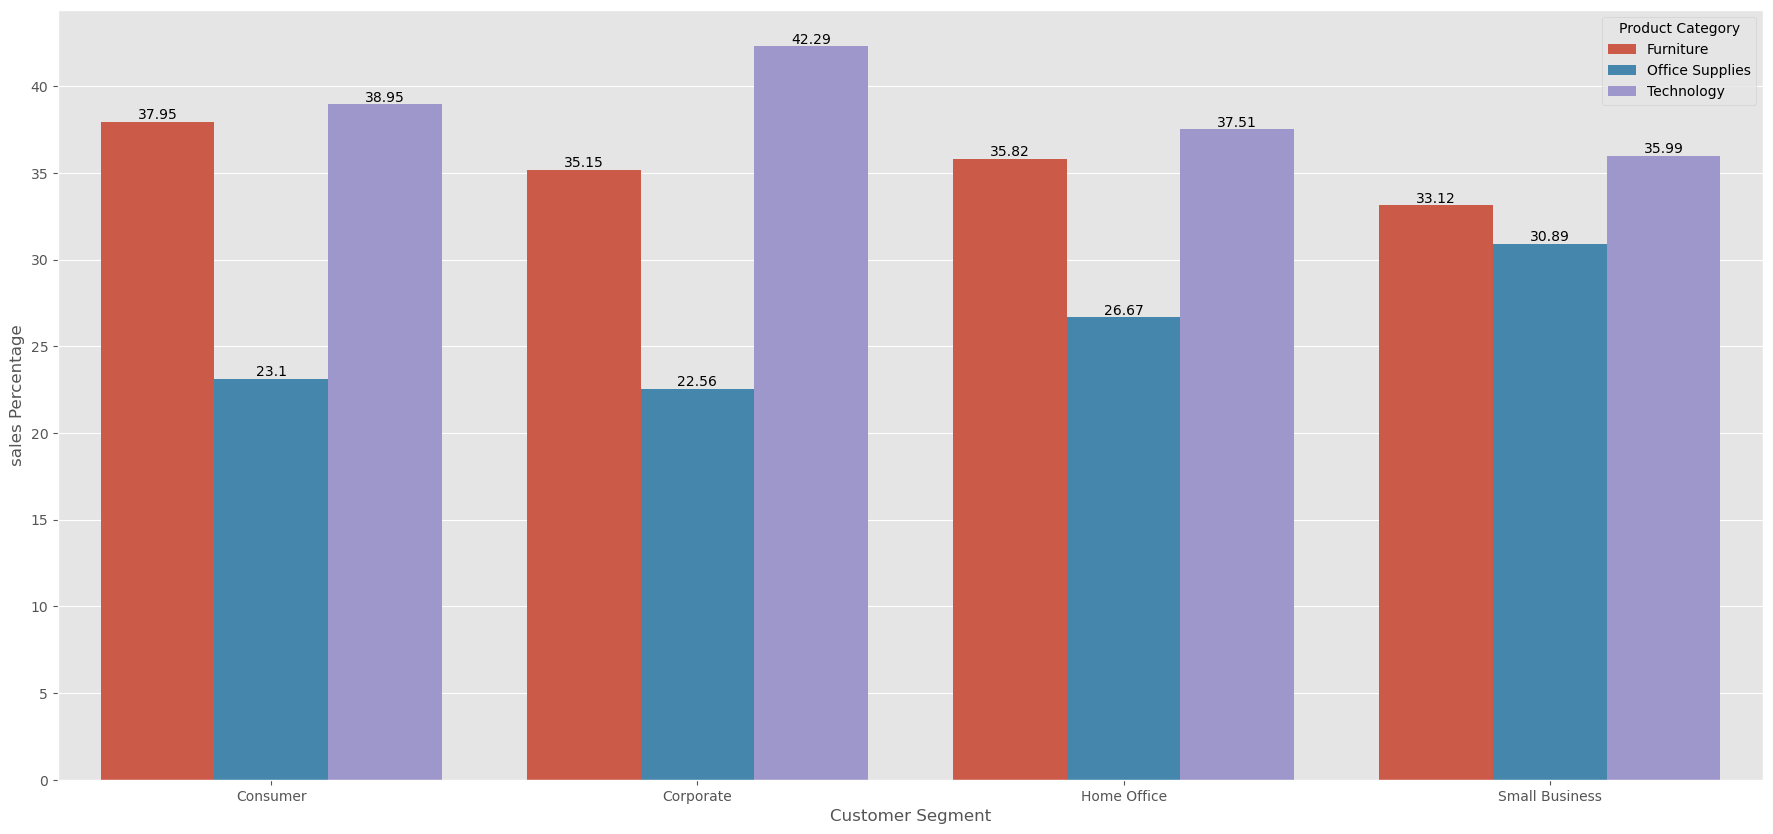

In [59]:
ax = sns.barplot(data=sales_percentage_for_product_category_wrt_subcategory, x = 'Customer Segment' , y = 'sales Percentage' , hue = 'Product Category')
for i in ax.containers:
    ax.bar_label(i,)

### analyzing customer_segment and product sub_category.....bcz we have not get any more insights from customer_segment and product_category

In [60]:
cs_sc_sales_sum = dict(df.groupby(['Customer Segment' , 'Product Sub-Category' ]).sum('Sales')['Sales'])
cs_sc_sales_sum 

{('Consumer', 'Appliances'): 63808.0,
 ('Consumer', 'Binders and Binder Accessories'): 103628.89,
 ('Consumer', 'Bookcases'): 92623.79000000001,
 ('Consumer', 'Chairs & Chairmats'): 305381.3,
 ('Consumer', 'Computer Peripherals'): 80799.62,
 ('Consumer', 'Copiers and Fax'): 148503.64,
 ('Consumer', 'Envelopes'): 37643.82,
 ('Consumer', 'Labels'): 3713.7,
 ('Consumer', 'Office Furnishings'): 69529.19,
 ('Consumer', 'Office Machines'): 260009.96,
 ('Consumer', 'Paper'): 53001.11,
 ('Consumer', 'Pens & Art Supplies'): 24023.190000000002,
 ('Consumer', 'Rubber Bands'): 1708.42,
 ('Consumer', 'Scissors, Rulers and Trimmers'): 14625.930000000002,
 ('Consumer', 'Storage & Organization'): 121711.04000000001,
 ('Consumer', 'Tables'): 228932.58,
 ('Consumer', 'Telephones and Communication'): 225571.04,
 ('Corporate', 'Appliances'): 167939.55,
 ('Corporate', 'Binders and Binder Accessories'): 225155.09,
 ('Corporate', 'Bookcases'): 262084.57,
 ('Corporate', 'Chairs & Chairmats'): 407719.86,
 ('Co

In [61]:
cs_sales_sum  = dict(df.groupby('Customer Segment').sum('Sales')['Sales'])
cs_sales_sum 

{'Consumer': 1835215.22,
 'Corporate': 3269391.07,
 'Home Office': 2168952.03,
 'Small Business': 1678373.0}

In [62]:
cs_sc_sales_sum_in_Percentage = dict()
for k  in cs_sc_sales_sum :
    cs_sc_sales_sum_in_Percentage[k] = round(cs_sc_sales_sum [k] * 100 /cs_sales_sum [k[0]] , 2)
print(cs_sc_sales_sum_in_Percentage)  

{('Consumer', 'Appliances'): 3.48, ('Consumer', 'Binders and Binder Accessories'): 5.65, ('Consumer', 'Bookcases'): 5.05, ('Consumer', 'Chairs & Chairmats'): 16.64, ('Consumer', 'Computer Peripherals'): 4.4, ('Consumer', 'Copiers and Fax'): 8.09, ('Consumer', 'Envelopes'): 2.05, ('Consumer', 'Labels'): 0.2, ('Consumer', 'Office Furnishings'): 3.79, ('Consumer', 'Office Machines'): 14.17, ('Consumer', 'Paper'): 2.89, ('Consumer', 'Pens & Art Supplies'): 1.31, ('Consumer', 'Rubber Bands'): 0.09, ('Consumer', 'Scissors, Rulers and Trimmers'): 0.8, ('Consumer', 'Storage & Organization'): 6.63, ('Consumer', 'Tables'): 12.47, ('Consumer', 'Telephones and Communication'): 12.29, ('Corporate', 'Appliances'): 5.14, ('Corporate', 'Binders and Binder Accessories'): 6.89, ('Corporate', 'Bookcases'): 8.02, ('Corporate', 'Chairs & Chairmats'): 12.47, ('Corporate', 'Computer Peripherals'): 6.86, ('Corporate', 'Copiers and Fax'): 6.29, ('Corporate', 'Envelopes'): 1.36, ('Corporate', 'Labels'): 0.24, (

In [63]:
sales_percentage_for_Customersegment_wrt_subcategory = pd.DataFrame(columns=['Customer Segment' , 'Product Sub-Category' , 'sales Percentage'])
sales_percentage_for_Customersegment_wrt_subcategory

,Customer Segment,Product Sub-Category,sales Percentage


In [64]:
for i in cs_sc_sales_sum_in_Percentage.items():
    sales_percentage_for_Customersegment_wrt_subcategory.loc[len(sales_percentage_for_Customersegment_wrt_subcategory.index)] = [ i[0][0] , i[0][1] , i[1] ]
sales_percentage_for_Customersegment_wrt_subcategory

,Customer Segment,Product Sub-Category,sales Percentage
0,Consumer,Appliances,3.48
1,Consumer,Binders and Binder Accessories,5.65
2,Consumer,Bookcases,5.05
3,Consumer,Chairs & Chairmats,16.64
4,Consumer,Computer Peripherals,4.40
5,Consumer,Copiers and Fax,8.09
6,Consumer,Envelopes,2.05
7,Consumer,Labels,0.20
8,Consumer,Office Furnishings,3.79
9,Consumer,Office Machines,14.17


In [65]:
sales_percentage_in_each_category = sales_percentage_for_Customersegment_wrt_subcategory.pivot(index='Customer Segment' , columns='Product Sub-Category')
sales_percentage_in_each_category 

sales Percentage                                 \
Product Sub-Category       Appliances Binders and Binder Accessories   
Customer Segment                                                       
Consumer                         3.48                           5.65   
Corporate                        5.14                           6.89   
Home Office                      5.75                           6.85   
Small Business                   5.97                           9.61   

                                                                        \
Product Sub-Category Bookcases Chairs & Chairmats Computer Peripherals   
Customer Segment                                                         
Consumer                  5.05              16.64                 4.40   
Corporate                 8.02              12.47                 6.86   
Home Office               3.66               9.81                 5.11   
Small Business            4.37              14.22                 4.47   

                                                                          \
Product Sub-Category Copiers and Fax Envelopes Labels Office Furnishings   
Customer Segment                                                           
Consumer                        8.09      2.05   0.20               3.79   
Corporate                       6.29      1.36   0.24               3.53   
Home Office                     8.06      1.04   0.25               9.09   
Small Business                  7.89      2.58   0.38               3.72   

                                                                             \
Product Sub-Category Office Machines Paper Pens & Art Supplies Rubber Bands   
Customer Segment                                                              
Consumer                       14.17  2.89                1.31         0.09   
Corporate                      15.80  2.73                1.10         0.07   
Home Office                    11.30  2.82                1.00         0.11   
Small Business                 11.74  2.99                1.28         0.15   

                                                                           \
Product Sub-Category Scissors, Rulers and Trimmers Storage & Organization   
Customer Segment                                                            
Consumer                                      0.80                   6.63   
Corporate                                     0.29                   4.74   
Home Office                                   0.60                   8.26   
Small Business                                0.19                   7.74   

                                                          
Product Sub-Category Tables Telephones and Communication  
Customer Segment                                          
Consumer              12.47                        12.29  
Corporate             11.13                        13.34  
Home Office           13.26                        13.05  
Small Business        10.81                        11.88

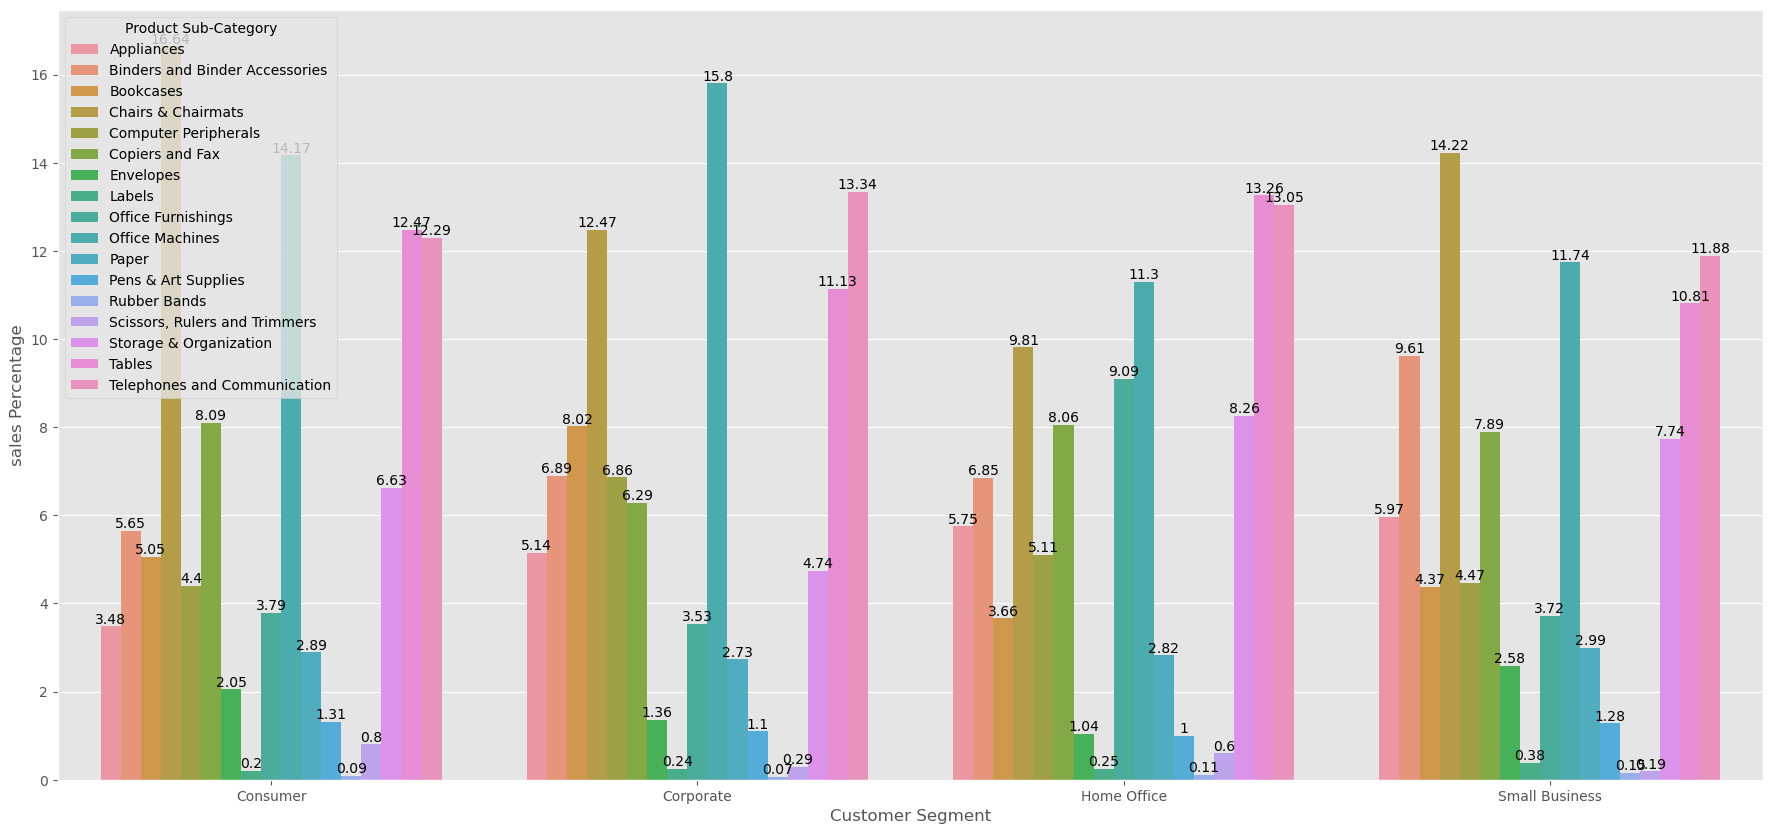

In [66]:
ax = sns.barplot(data=sales_percentage_for_Customersegment_wrt_subcategory, x = 'Customer Segment' , y = 'sales Percentage' , hue = 'Product Sub-Category')
for i in ax.containers:
    ax.bar_label(i,)

In [67]:
# use sub plot for better visualization..

### Working with Date time column (Order Date and Ship Date)

- SQL and pandas uses date time format is 'YYYY-MM-DD HH:MM:SS',,it is bydefault
- min(),max(),sum(),mean(),median(),mode(),count(),std(),variance()....are methods of dataframe...u can access those on pandas series
- day,month,year,day_name(),month_name(),.......are method of date time ,,,so u have to use 'dt' to use it on pandas series or 1 column...........but u can use it on single value of data time type w/o 'dt' class

In [68]:
df.loc[0,'Order Date'].day_name()
#To use data time function on single value,,we use this approach,,,,ie; after accesssing single date time value call date time function directly

'Friday'

In [69]:
# df['Order Date'].day_name()
#But if u want to apply it on entire pandas.series then it will throw error.......so u cant access it directly
#u have to use 'dt' class ,,through this dt class u can call timestamp or date_time functions....

In [70]:
#Like this,,,for pandas serie or we can say 1 column of dataframe is called series..index of row also returned
df['Order Date'].dt.day_name()

0          Friday
1        Saturday
2        Saturday
3        Saturday
4        Saturday
5        Saturday
6        Saturday
7        Saturday
8        Saturday
9          Sunday
10         Sunday
11         Sunday
12         Sunday
13         Sunday
14         Sunday
15         Sunday
16         Sunday
17         Sunday
18         Sunday
19         Monday
20         Monday
21         Monday
22        Tuesday
23        Tuesday
24        Tuesday
25        Tuesday
26        Tuesday
27        Tuesday
28        Tuesday
29        Tuesday
30        Tuesday
31        Tuesday
32        Tuesday
33      Wednesday
34      Wednesday
35      Wednesday
36      Wednesday
37      Wednesday
38      Wednesday
39      Wednesday
40      Wednesday
41      Wednesday
42      Wednesday
43      Wednesday
44      Wednesday
45       Thursday
46       Thursday
47       Thursday
48       Thursday
49       Thursday
50       Thursday
51         Friday
52         Friday
53         Friday
54         Friday
55       S

In [71]:
#Earliest date in our dataset
df['Order Date'].min()
#df['Order Date'].min().day_name() -> to get day name..

Timestamp('2010-01-01 00:00:00')

In [72]:
#latest date in our dataset
df['Order Date'].max()

Timestamp('2013-12-31 00:00:00')

In [73]:
df['Order Date'].count()#Counting no of rows..

9426

In [74]:
df['Order Date'].mean()

Timestamp('2012-03-05 18:33:59.465308672')

In [75]:
df['Order Date'].mode()#More no of orders made on this date 
#see df['Order Date'].value_counts()

0   2013-07-21
Name: Order Date, dtype: datetime64[ns]

In [76]:
df['Order Date'].mode().dt.month_name()
#as u see 0   2013-07-21 -> this is pandas series,,not date time,,thus temporarily make this value as date time type thus u can use date time function on it,
# these function returns 'object'(str) type value....

0    July
Name: Order Date, dtype: object

In [77]:
df['Order Date'].median()

Timestamp('2012-04-08 00:00:00')

- **1)How many Days Data we have?**

In [78]:
df['Order Date'].max() - df['Order Date'].min() # this approach is called "Time Delta"
#Around 4 years data we have,,,2010,11,12,13
#1460/365

#pr we can say 1460 days are there in b/n earliest and latest date from our dataset

Timedelta('1460 days 00:00:00')

- **2)i want data from 2012 onwards(means 2012 and 2013 's data only...bcz last date in our dataset is 2013)**

In [79]:
df[df['Order Date'] >= '2012'].head()
#if all date present then,,, data is shown from jan 2012 to dec 2013

#or df['Order Date'] >= pd.to_datetime('2012-01-01')
#VVVVVVIIIIIMMMMMMMMPPPPPPPPPPP
#u can use multile condition using &(bitwise and) , |(bitwise or) , ^(bitwise xor) , ~ (bitwise not) 
#Dont use and,or  in making conditions for date column,,it will not wotk and give error

#if u want just 2012 years data then--> df [ df['Order Date'] >= '2012' & df['Order Date'] <= '2012' ],,,,,,,it will give correct result
#if u used this df[df['Order date'] = '2012'] the, only 1 months data is shownie;jan 2012....so carefull

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
4131,20360,High,0.04,4.28,6.72,1346,Florence Walters,Regular Air,Home Office,Office Supplies,Paper,Small Box,Xerox 1927,0.40,South,Florida,Bradenton,34210,2012-01-01,2012-01-02,-298.4520,4,19.38,89689
4132,18331,Not Specified,0.01,5.98,4.38,1068,Erik Barr,Regular Air,Home Office,Technology,Computer Peripherals,Small Pack,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 10...",0.75,Central,Illinois,Calumet City,60409,2012-01-01,2012-01-02,-57.0772,3,19.96,87111
4133,18332,Not Specified,0.06,40.99,19.99,1068,Erik Barr,Regular Air,Home Office,Office Supplies,Paper,Small Box,"White Dual Perf Computer Printout Paper, 2700 ...",0.36,Central,Illinois,Calumet City,60409,2012-01-01,2012-01-03,25.5892,6,241.52,87111
4134,25382,Medium,0.05,63.98,19.99,3087,Kevin Randall Briggs,Express Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,GBC ProClick Punch Binding System,0.36,South,Florida,Oakland Park,33334,2012-01-01,2012-01-04,-132.6640,5,323.26,88382
4135,20265,Low,0.06,5.18,2.04,2033,Shirley Garner,Express Air,Consumer,Office Supplies,Paper,Wrap Bag,Array® Memo Cubes,0.36,South,Florida,Oviedo,32765,2012-01-01,2012-01-08,330.8013,3,17.14,87121


- you can make date as index of ur dataset
- df.set_index('Date',inplace=True)
- then u can access rows like this df.loc['2012'],,,,,u get all rows with 2012 year present in index or we can say datetime value

- **3)max sales done in ONE day for each year,,from avaialable dataset**

In [80]:
#VVVIIIMMMMMMPPPPPP
#Dont Use 'and; keyword,,,error is thrown..
pd.set_option('display.max_rows',5)
filter = (df['Order Date'] >= pd.to_datetime('2012-01-01')) & (df['Order Date'] <= pd.to_datetime('2012-12-31'))
df.loc[filter]
#as u see we got 2012 years complete data,,,i

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
4131,20360,High,0.04,4.28,6.72,1346,Florence Walters,Regular Air,Home Office,Office Supplies,Paper,Small Box,Xerox 1927,0.40,South,Florida,Bradenton,34210,2012-01-01,2012-01-02,-298.4520,4,19.38,89689
4132,18331,Not Specified,0.01,5.98,4.38,1068,Erik Barr,Regular Air,Home Office,Technology,Computer Peripherals,Small Pack,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 10...",0.75,Central,Illinois,Calumet City,60409,2012-01-01,2012-01-02,-57.0772,3,19.96,87111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,475,Critical,0.06,8.34,1.43,1745,Herbert Holden,Express Air,Home Office,Office Supplies,Paper,Wrap Bag,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",0.35,South,Georgia,Atlanta,30305,2012-12-31,2013-01-01,34.2638,36,292.20,3271
6371,21793,Low,0.03,56.96,13.22,2131,Mary Hewitt,Regular Air,Home Office,Office Supplies,Appliances,Small Box,Conquest™ 14 Commercial Heavy-Duty Upright Vac...,0.56,Central,Missouri,Gladstone,64118,2012-12-31,2012-12-31,213.7650,12,669.63,90088


- total order done in this year is 2241

In [81]:
pd.set_option('display.max_rows',5)
filter = (df['Order Date'] >= pd.to_datetime('2012-01-01')) & (df['Order Date'] <= pd.to_datetime('2012-12-31'))
df.loc[filter]['Sales']

#-----OR---------------
#df[(df['Order Date'] >= '2012-01-01') & (df['Order Date'] <= '2012-12-31')]['Sales'].max()

4131     19.38
4132     19.96
         ...  
6370    292.20
6371    669.63
Name: Sales, Length: 2241, dtype: float64

In [82]:
df[(df['Order Date'] >= '2010-01-01') & (df['Order Date'] <= '2010-12-31') & (df['Sales'])]['Sales'].max()

45737.33

In [83]:
df[(df['Order Date'] >= '2011-01-01') & (df['Order Date'] <= '2011-12-31') & (df['Sales'])]['Sales'].max()

50332.66

In [84]:
df[(df['Order Date'] >= '2012-01-01') & (df['Order Date'] <= '2012-12-31') & (df['Sales'])]['Sales'].max()

100119.16

In [85]:
df[(df['Order Date'] >= '2013-01-01') & (df['Order Date'] <= '2013-12-31') & (df['Sales'])]['Sales'].max()

36532.46

- **4) dates on which these max sales we achieved**

In [86]:
#2010
df[df['Sales'] == 45737.33]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
1504,567,Not Specified,0.02,1270.99,19.99,1733,Nina Horne Kelly,Regular Air,Small Business,Office Supplies,Binders and Binder Accessories,Small Box,Fellowes PB500 Electric Punch Plastic Comb Bin...,0.35,East,District of Columbia,Washington,20012,2010-10-04,2010-10-06,9228.2256,36,45737.33,3841


In [87]:
#2011
df[df['Sales'] == df[(df['Order Date'] >= '2011-01-01') & (df['Order Date'] <= '2011-12-31') & (df['Sales'])]['Sales'].max() ]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
3687,6852,Not Specified,0.04,3499.99,24.49,2565,Amanda Kay,Regular Air,Home Office,Technology,Copiers and Fax,Large Box,Canon imageCLASS 2200 Advanced Copier,0.37,West,Washington,Seattle,98144,2011-10-22,2011-10-23,228.0904,14,50332.66,48800


In [88]:
#2012
df[df['Sales'] == df[(df['Order Date'] >= '2012-01-01') & (df['Order Date'] <= '2012-12-31') & (df['Sales'])]['Sales'].max() ]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
6100,5235,Low,0.03,880.98,44.55,3075,Gordon Brandt,Delivery Truck,Corporate,Furniture,Bookcases,Jumbo Box,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.62,West,California,Los Angeles,90061,2012-11-19,2012-11-24,7497.55,116,100119.16,37252


In [89]:
#2013
df[df['Sales'] == df[(df['Order Date'] >= '2013-01-01') & (df['Order Date'] <= '2013-12-31') & (df['Sales'])]['Sales'].max() ]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
8821,3571,High,0.05,500.98,28.14,2189,Frank Cross,Delivery Truck,Corporate,Technology,Office Machines,Jumbo Drum,"Hewlett-Packard cp1700 [D, PS] Series Color In...",0.38,East,New York,New York City,10177,2013-10-14,2013-10-16,7434.48,76,36532.46,25473


- We conclude that,,in **oct,nov,dec** there is more sales

- **5)sum of sales on each day**

In [90]:
# to use resample method u should have datetime index for ur dataset..thats whu i mad order_date as index and make this dataset as temp_df

In [91]:
#u can do grou by,,but i am using this method which is more easy..
temp_df = df.set_index('Order Date')

In [92]:
temp_df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Ship Date,Profit,Quantity ordered new,Sales,Order ID
Order Date,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,19914,Not Specified,0.08,95.99,35.00,2211,Anita Hahn,Express Air,Home Office,Office Supplies,Storage & Organization,Large Box,Safco Industrial Wire Shelving,0.666,East,Maryland,Bowie,20715,2010-01-03,-425.20840,2,193.88,88028
2010-01-02,24225,Critical,0.08,15.04,1.97,1155,Alex Nicholson,Regular Air,Consumer,Office Supplies,Paper,Wrap Bag,White GlueTop Scratch Pads,0.390,West,California,Montebello,90640,2010-01-02,108.51630,11,157.27,90853
2010-01-02,24224,Critical,0.09,9.11,2.15,1155,Alex Nicholson,Express Air,Consumer,Office Supplies,Paper,Wrap Bag,"Black Print Carbonless Snap-Off® Rapid Letter,...",0.400,West,California,Montebello,90640,2010-01-04,20.29960,4,34.41,90853
2010-01-02,19279,Critical,0.06,40.98,2.99,950,Jane Shah,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",0.360,Central,Minnesota,Prior Lake,55372,2010-01-04,-14.80188,1,41.60,89083
2010-01-02,23274,Low,0.05,155.06,7.07,67,Ellen McCormick,Regular Air,Corporate,Office Supplies,Storage & Organization,Small Box,"Dual Level, Single-Width Filing Carts",0.590,West,California,Napa,94559,2010-01-09,845.66400,8,1225.60,87946


In [93]:
total_sales_on_each_day = temp_df['Sales'].resample('D').sum()
total_sales_on_each_day
#'D'-offset,,,,,,,,read pandas documenation to see other offset also...'W'-on weekly bases...'M'-Monthly bases.....'Q'-qarter bases
#D - on daily bases(on absolute day) sum of sales....total sales in each day

Order Date
2010-01-01      193.88
2010-01-02    11808.32
                ...   
2013-12-30     2012.89
2013-12-31     3626.49
Freq: D, Name: Sales, Length: 1461, dtype: float64

Text(0, 0.5, 'Sales')

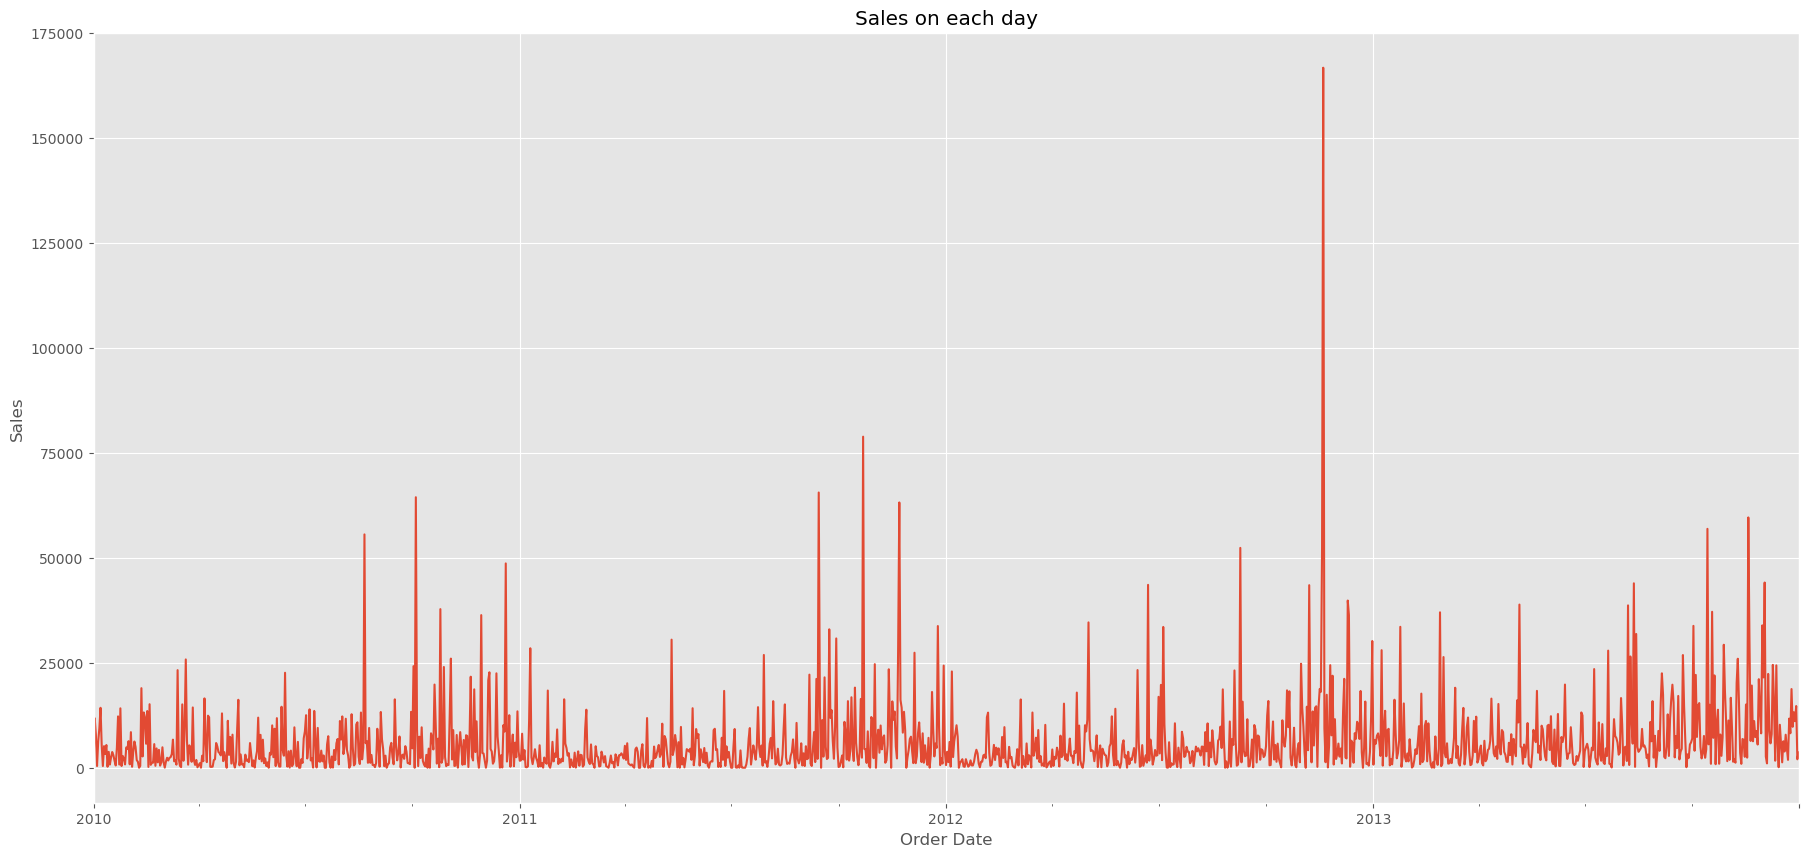

In [94]:
total_sales_on_each_day.plot()#index is x-axis and sum_of_sales_on_each_day on y-axis
plt.title('Sales on each day')
plt.ylabel('Sales')

- As u see at the end of each YEAR,,there is increase in sales,,,particularly on **OCT,NOV,DEC month**

In [95]:
dates = list(total_sales_on_each_day.index)
sales = list(total_sales_on_each_day.values)

In [96]:
dates[sales.index(max(sales))]#df.max(),,,for dataframe,,not for lis,tiple,dict......for list use max(l)->returns max value from l

Timestamp('2012-11-19 00:00:00')

In [97]:
total_sales_on_each_day['2012-11-19']
#Around 1,39,05,859.81 rupess gained

166700.45

- On this day **2012-11-19** ,,max sales is done,,which is around 166700.45 dollars

In [98]:
total_sales_on_each_month = temp_df['Sales'].resample('M').sum()
total_sales_on_each_month

Order Date
2010-01-31    139730.46
2010-02-28    130534.07
                ...    
2013-11-30    375129.18
2013-12-31    321610.77
Freq: ME, Name: Sales, Length: 48, dtype: float64

In [99]:
df['Sales'].sum() == sum(total_sales_on_each_month)  #sum on list of value,,,,,and sum on dataframe series...

True

<Axes: xlabel='Order Date'>

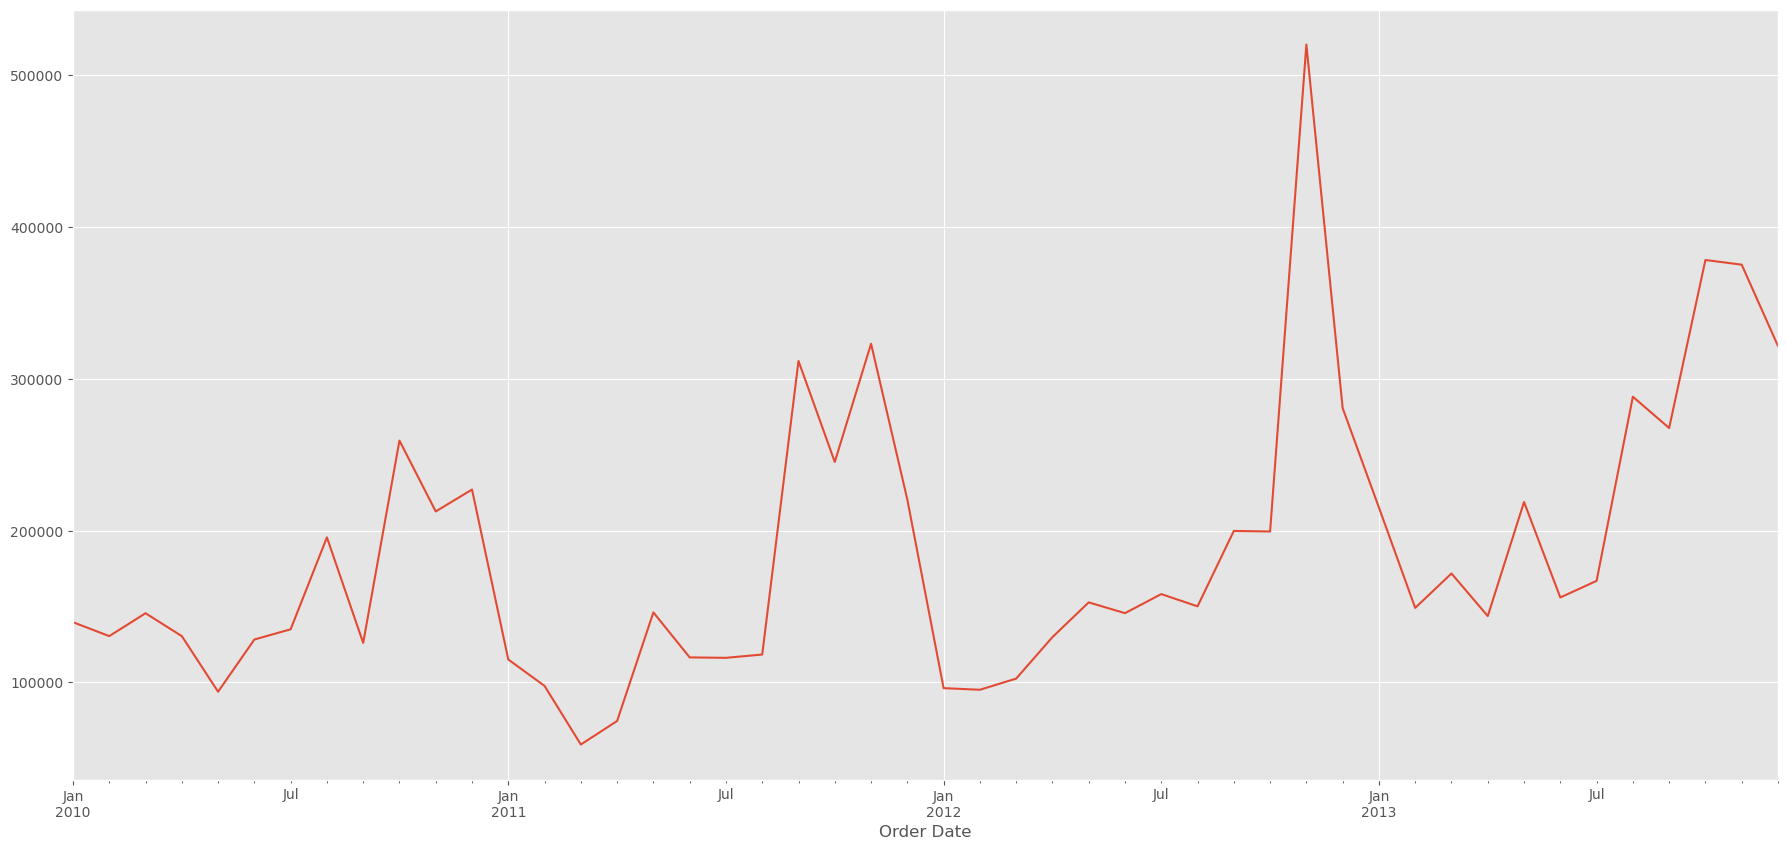

In [100]:
total_sales_on_each_month.plot()

In [101]:
total_sales_on_each_month = temp_df['Sales'].resample('M').sum()
total_sales_on_each_month

Order Date
2010-01-31    139730.46
2010-02-28    130534.07
                ...    
2013-11-30    375129.18
2013-12-31    321610.77
Freq: ME, Name: Sales, Length: 48, dtype: float64

### Quarter wise sales analysis

In [102]:
total_sales_on_each_quarter = temp_df['Sales'].resample('Q').sum()
total_sales_on_each_quarter
#at end of each quarter ,total or sum of sales achieved is..
#Q1 -> Jan,Feb,March .... Q2 -> Apr.May,Jun ..... Q3 -> July,Aug,Sept........Q4 -> Oct,Nov,Dec

Order Date
2010-03-31     415880.26
2010-06-30     352786.14
                 ...    
2013-09-30     722667.23
2013-12-31    1074951.94
Freq: QE-DEC, Name: Sales, Length: 16, dtype: float64

In [103]:
quarter_df = pd.DataFrame({'Quarter': list(total_sales_on_each_quarter.index.quarter) , 'Sales': list(total_sales_on_each_quarter.values) , 'Year': list(total_sales_on_each_quarter.index.year)})
quarter_df['Quarter'] = quarter_df['Quarter'].apply(lambda x: 'Q'+ str(x) )
quarter_df
#now year become int and sales become float,,,

,Quarter,Sales,Year
0,Q1,415880.26,2010
1,Q2,352786.14,2010
...,...,...,...
14,Q3,722667.23,2013
15,Q4,1074951.94,2013


In [104]:
quarter_pivot_table = quarter_df.pivot(index='Year',columns='Quarter')
quarter_pivot_table

Sales                                  
Quarter         Q1         Q2         Q3          Q4
Year                                                
2010     415880.26  352786.14  456684.80   698981.68
2011     272047.55  337345.29  546381.05   788733.54
2012     294067.11  428279.06  508179.27  1000205.74
2013     536149.16  518591.50  722667.23  1074951.94

In [105]:
quarter_pivot_table.loc[2010 ]#bcz year is int,,see above,,we converted it tolist thus it become int

       Quarter
Sales  Q1         415880.26
       Q2         352786.14
       Q3         456684.80
       Q4         698981.68
Name: 2010, dtype: float64

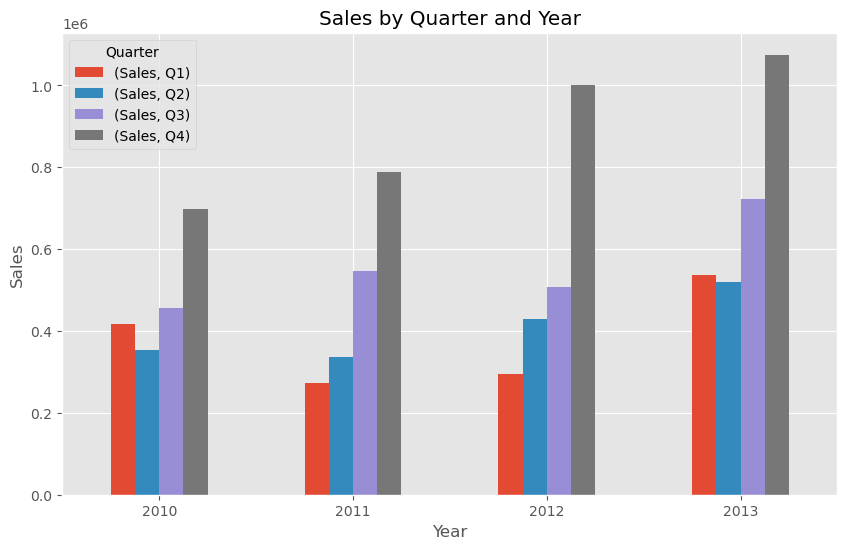

In [106]:

quarter_pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Quarter and Year')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Quarter')
plt.show()

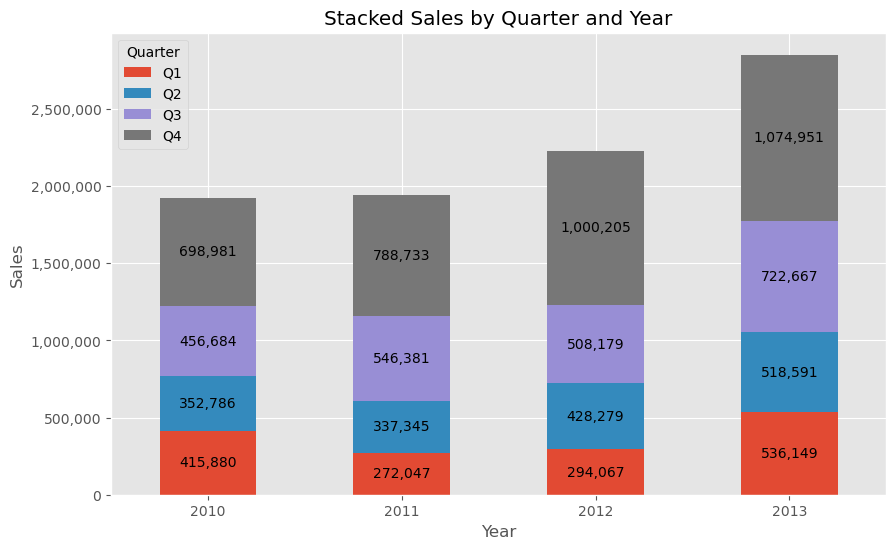

In [107]:
pivot_table = quarter_df.pivot_table(values='Sales', index='Year', columns='Quarter', aggfunc='sum')

# Plotting stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Sales by Quarter and Year')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Quarter')

# Formatting y-axis to show actual values with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

for container in ax.containers:
    labels = [f'{int(v):,}' for v in container.datavalues]  # Format labels as integers with commas
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()


### sub-plots

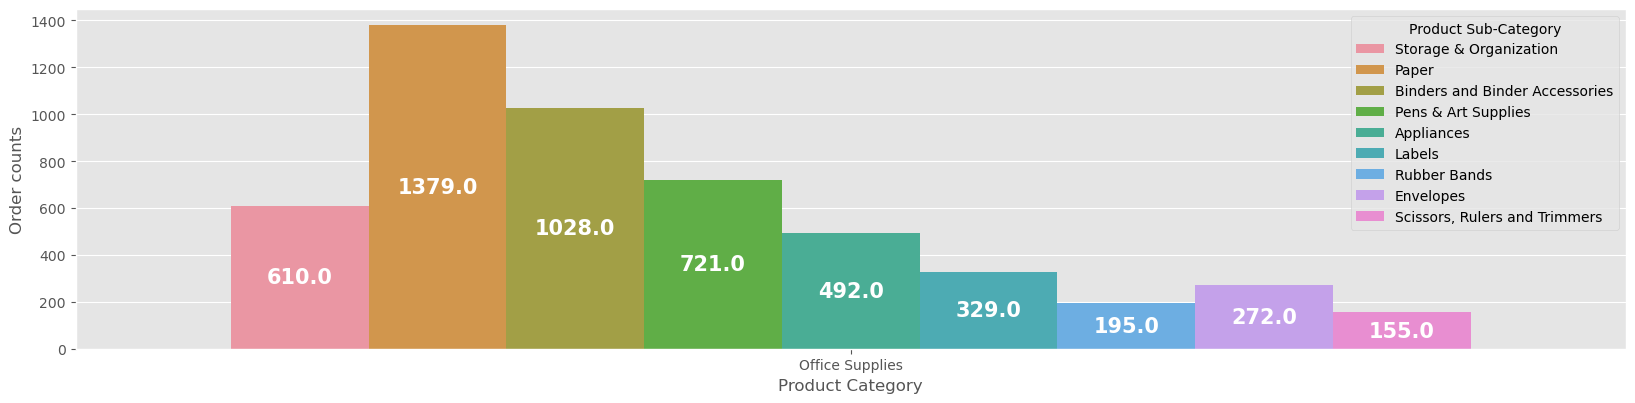

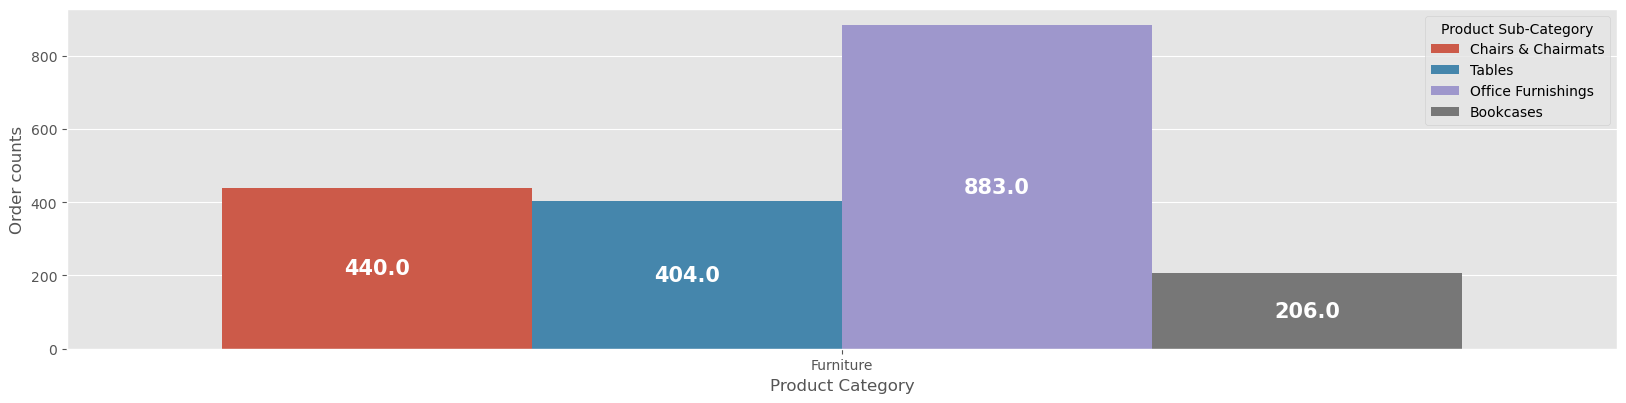

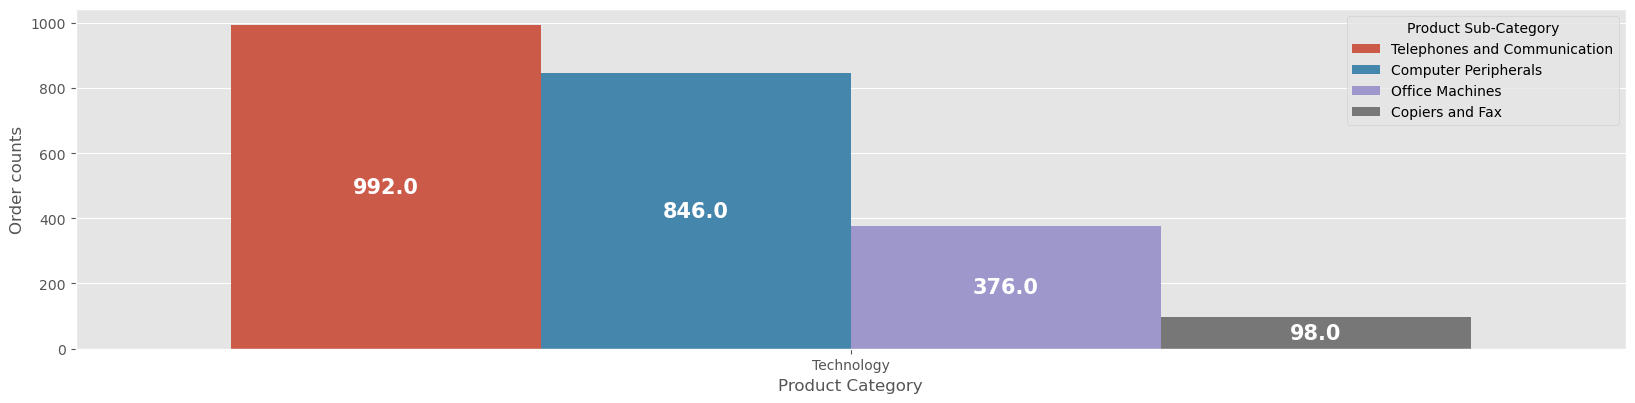

In [108]:
for i , j in enumerate(df['Product Category'].unique()):
    plt.figure(figsize=(20,15))
    
    plt.subplot(3,1,i+1)
    sns.countplot(data=df[df['Product Category'] == j] ,x='Product Category', hue='Product Sub-Category')
    plt.ylabel('Order counts')
    
    for p in plt.gca().patches:
        plt.gca().annotate(f'{ p.get_height() }', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')

        #{ int( p.get_height() ) }  -> for int values/annotation in bars
        
#in matrix of maths,array,numpy,list,,there is shape convention like => (m,n,p)  ... n x p matrix,,,,such a m no of matrix present 
#subplo(m,n,p)  => different convention............m x n plot with position p....ie;

### Sales Achieved in last 4 months data from todays date...

In [110]:
#As i discussed,,min(),max(),mean(),count(),sum()...is a function related to pandas series............and df['Order Date'] returns pandas series onlyy..
#in this series if u going to apply date time function or attributes ex-> df['Order date'].day,,,it will throw error
#bcz,,,inside this series all values are date time ot time stamp type,,,but df['Order Date'] is series,,,so not work
#df['Order Date'].dt.day---->perfectly works...............for all values 
#df['Order Date'][0].day -> perfectly works,,bca we accesed single value,,which is not a pandas series,,it is timestamp or date time type
# Calculate the date 4 months ago from today


#GENERAL CODE
from datetime import datetime, timedelta
# four_months_ago = datetime.today() - timedelta(days=4 * 30)  # Assuming 30 days per month for simplicity
# # Filter data for the last 4 months
# last_4_months_data = df[df['Order Date'] >= four_months_ago]['Sales'].sum()

#but but,,,our dataset is not live,,ie; we have already stored data,,,,which is till 2013,,,which is sample,,,
#so i use below technique


#OUR SPECIFIC CODE
four_months_ago = df['Order Date'].max() - timedelta(days=4 * 30)  
last_4_months_sum_of_sales = df[df['Order Date'] >= four_months_ago]['Sales'].sum()

print( '$' ,round(last_4_months_sum_of_sales,2) )


$ 1339371.53


### no of orders on each year

In [111]:
df['Order Years'] = df['Order Date'].dt.year

In [112]:
df['Order Years'].value_counts().index

Index([2013, 2012, 2011, 2010], dtype='int32', name='Order Years')

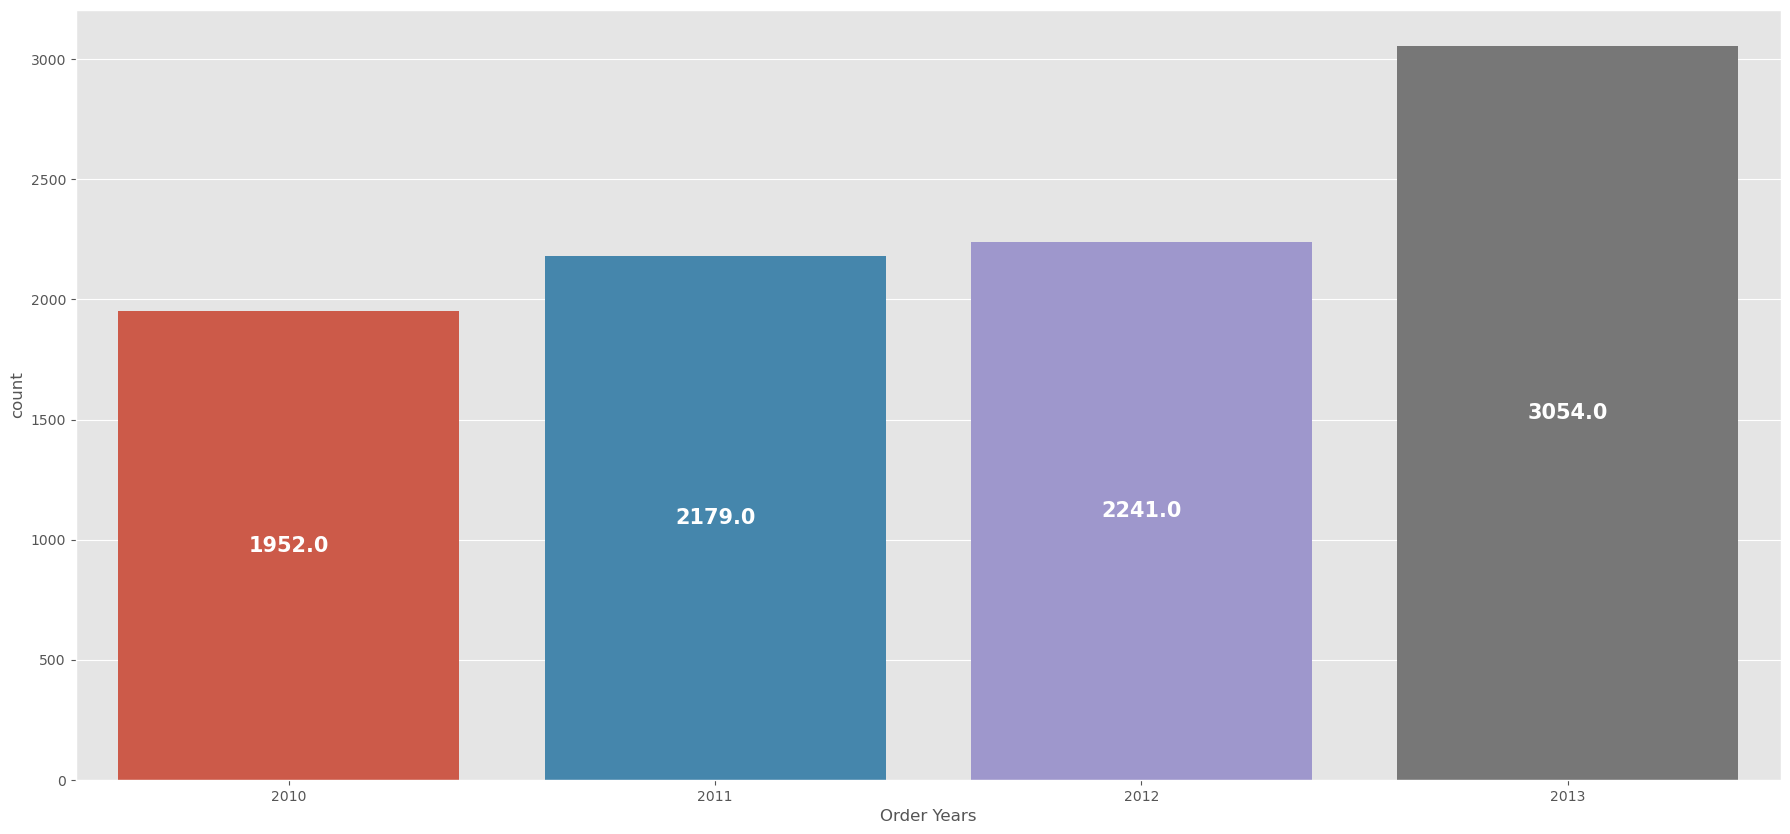

In [113]:
sns.countplot(x=df['Order Years'])
for p in plt.gca().patches:
        plt.gca().annotate(f'{ p.get_height() }', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')

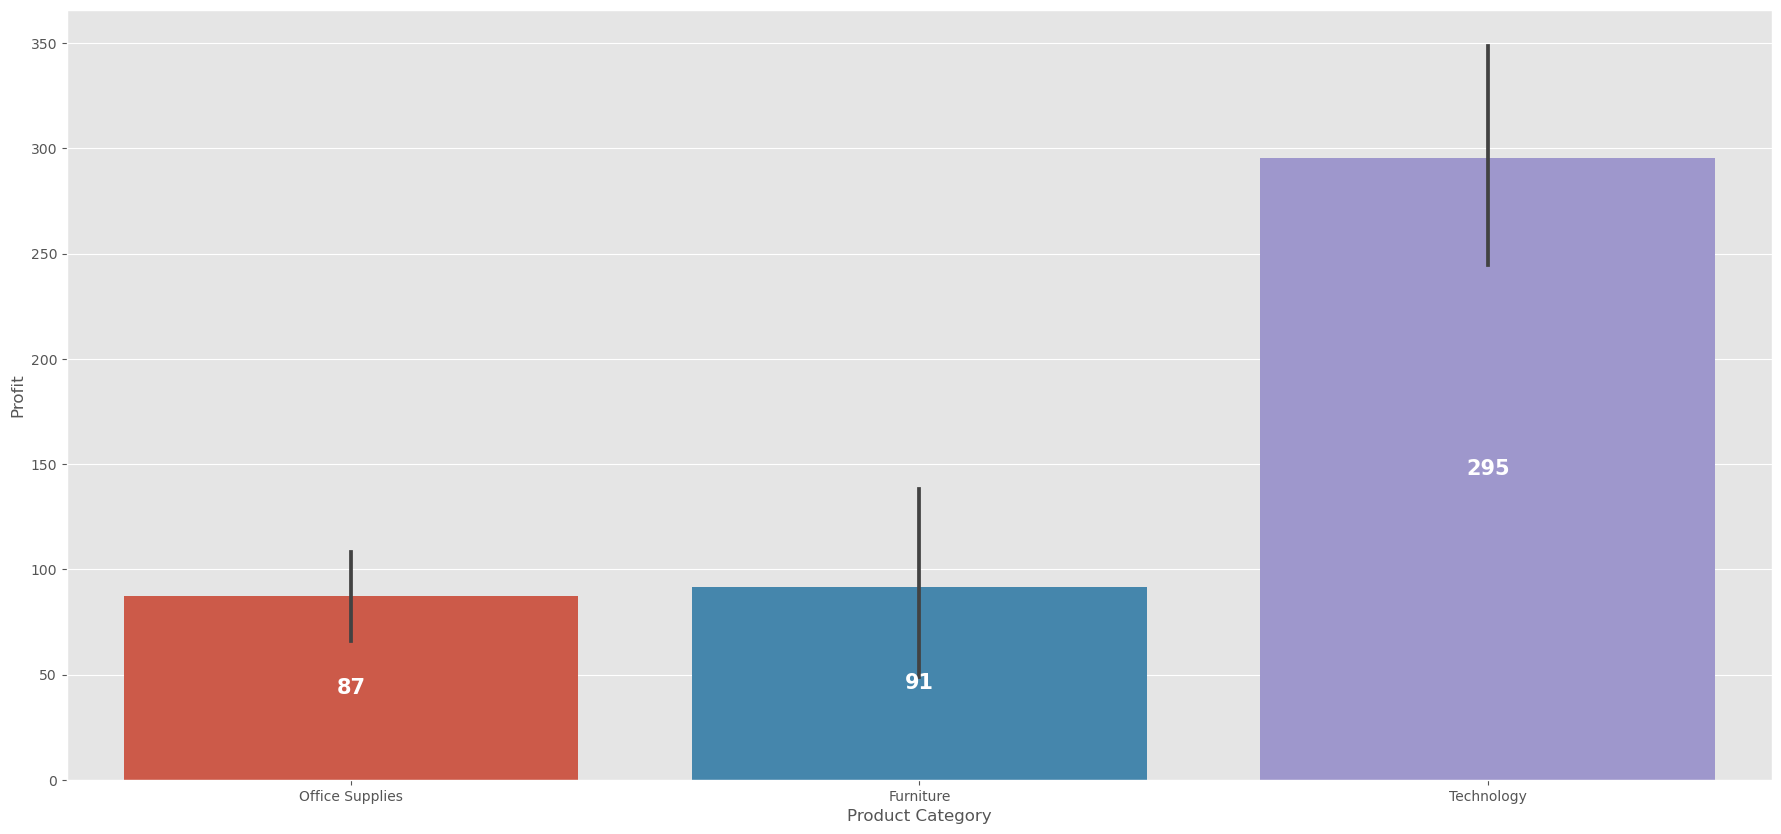

In [114]:
#mean profit in each category
sns.barplot(x = df['Product Category'] , y=df['Profit'] )
for p in plt.gca().patches:
        plt.gca().annotate(f'{ int(p.get_height()) }', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')
#Bydefault estimator is 'mean',,,,,but i want 'sum' of profits,,,so see below,,

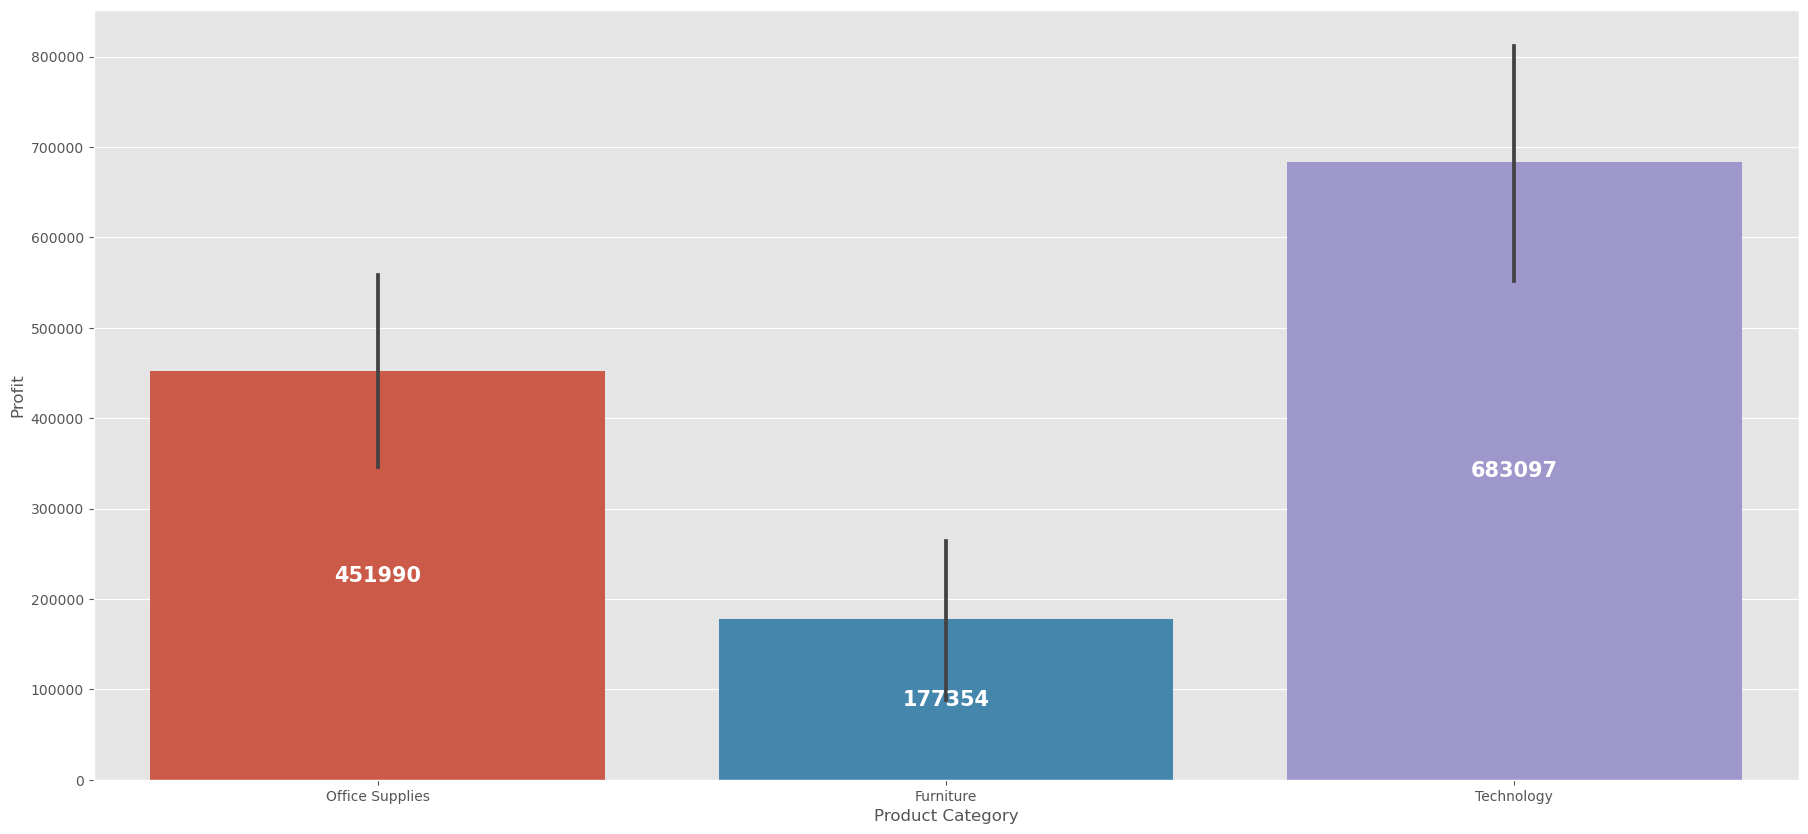

In [115]:
sns.barplot(x = df['Product Category'] , y=df['Profit'] , estimator='sum')
for p in plt.gca().patches:
        plt.gca().annotate(f'{ int(p.get_height()) }', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='white', fontsize=15, fontweight='bold')
#'sum' of profits in each category

### State or Province wise analysis,,in past 4 years

In [116]:
#### top-5 state, from where more orders we get
df['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [117]:
### bottom-5 states where less engagement or orders
df['State or Province'].value_counts()[-5:]

State or Province
North Dakota    34
South Dakota    28
Wyoming         21
Rhode Island    20
Delaware        15
Name: count, dtype: int64

- see why less engagement here?

### Correlation b/n columns(CORR() works on numeric feature or column only)..."PEARSON's CORRELATION"

In [ ]:
# -1 to 1 ==> 0 means No-correlation at all  , greater than 0 and less than 1 means positive correlation  , lesser than 0 and greater than -1 means negative-correlation , 1 means perfect positive correlation , -1 means perfect -ve correlation
#positive correlation means -> directly proportionality b/n 2 numeric variable
#negative correlation -> inversaly proportionality b/n 2 numeriv variable

- i want correlation b/n -> ['Order Priority' , 'Discount' , 'Unit Price' , 'Shipping Cost' , 'Ship Mode' ,Product Base Margin' , 'Profit' , 'Quantity ordered new' , 'Sales']
- I have considered categorical variable also,,,,which tell us some usefull info
- Because i think these 2 categorical feature are **ORDINAL CATEGORICAL FEATURE**
- generally there ate 3 type of column -> **Numeric , Categorical(Nominal ex->State , Name..etc columns where there is no relation b/n values , Ordinal ex->Grade like A,b,c where each value has some relation with other,,ie;A is high grade,c is low and..etc) , Datetime**

- Now apply Encoding technique on selected categorical variable,,which i found  it is good for analysis
- Order Priotiy -> **Not Specified=1, Low=2 , Medium=3 , High=4, critical= 5** ......BASED ON PROCESSING OF ORDER IE;IN HOW MUCH TIME ORDER SHOULD BE PROCESSED.......HIGH GRADE INDICATES,,,fast processing of order and MORE CHARGES are applied...
- So i will give  **Delivery Truck=1,Regular Air=2 , Express Air=3**

In [118]:
correlation_variables = df[['Order Priority','Discount','Unit Price','Shipping Cost','Ship Mode','Product Base Margin','Profit','Quantity ordered new','Sales']]
correlation_variables.head()

,Order Priority,Discount,Unit Price,Shipping Cost,Ship Mode,Product Base Margin,Profit,Quantity ordered new,Sales
0,Not Specified,0.08,95.99,35.00,Express Air,0.666,-425.20840,2,193.88
1,Critical,0.08,15.04,1.97,Regular Air,0.390,108.51630,11,157.27
2,Critical,0.09,9.11,2.15,Express Air,0.400,20.29960,4,34.41
3,Critical,0.06,40.98,2.99,Regular Air,0.360,-14.80188,1,41.60
4,Low,0.05,155.06,7.07,Regular Air,0.590,845.66400,8,1225.60


In [119]:
#2 techniques are there to do...1st -> OrdinalEncoder , 2nd-> ColumnTransformer ,,class
#1) OrdinalEncoder class from sklearn.preprocessing,,,where you have to give values manually for each column
#2nd one...in one go or one single of line you can do OHE,Ordinalencoding,labelencoder.  bcz it is most prferable...
#I use 2nd one

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
transformer = ColumnTransformer(transformers= [
    ('tnf1' , OrdinalEncoder(categories=[['Not Specified','Low','Medium','High','Critical'],['Delivery Truck','Regular Air','Express Air']]) , ['Order Priority','Ship Mode'])
]  , remainder='passthrough')
#remainder  ,, accept 2 values 1 is 'drop' and 2nd is 'passthrough'....ie;in our case we are applying transformation on 2 columns and remaining are not changed,,so i use passthrough

In [121]:
transfomed_correlation_variables = transformer.fit_transform(correlation_variables)
transfomed_correlation_variables

array([[ 0.0000000e+00,  2.0000000e+00,  8.0000000e-02, ...,
        -4.2520840e+02,  2.0000000e+00,  1.9388000e+02],
       [ 4.0000000e+00,  1.0000000e+00,  8.0000000e-02, ...,
         1.0851630e+02,  1.1000000e+01,  1.5727000e+02],
       [ 4.0000000e+00,  2.0000000e+00,  9.0000000e-02, ...,
         2.0299600e+01,  4.0000000e+00,  3.4410000e+01],
       ...,
       [ 0.0000000e+00,  1.0000000e+00,  6.0000000e-02, ...,
         4.0451840e+00,  5.0000000e+00,  6.5180000e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.8099680e+01,  1.0000000e+00,  2.0057000e+02],
       [ 2.0000000e+00,  1.0000000e+00,  3.0000000e-02, ...,
         2.3189106e+03,  2.0000000e+01,  3.3607400e+03]])

In [122]:
transfomed_correlation_variables = pd.DataFrame( transfomed_correlation_variables , columns=['Order Priority', 'Ship Mode' ,'Discount', 'Unit Price', 'Shipping Cost', 'Product Base Margin', 'Profit', 'Quantity ordered new',
       'Sales'])
#note-> transformed variable or column will come first,, same order in which you have given

In [123]:
transfomed_correlation_variables.head()

,Order Priority,Ship Mode,Discount,Unit Price,Shipping Cost,Product Base Margin,Profit,Quantity ordered new,Sales
0,0.0,2.0,0.08,95.99,35.00,0.666,-425.20840,2.0,193.88
1,4.0,1.0,0.08,15.04,1.97,0.390,108.51630,11.0,157.27
2,4.0,2.0,0.09,9.11,2.15,0.400,20.29960,4.0,34.41
3,4.0,1.0,0.06,40.98,2.99,0.360,-14.80188,1.0,41.60
4,1.0,1.0,0.05,155.06,7.07,0.590,845.66400,8.0,1225.60


In [124]:
#i dont want zero,,,so
transfomed_correlation_variables['Order Priority'] = transfomed_correlation_variables['Order Priority'] + 1
transfomed_correlation_variables['Ship Mode'] = transfomed_correlation_variables['Ship Mode'] + 1
transfomed_correlation_variables.head()

,Order Priority,Ship Mode,Discount,Unit Price,Shipping Cost,Product Base Margin,Profit,Quantity ordered new,Sales
0,1.0,3.0,0.08,95.99,35.00,0.666,-425.20840,2.0,193.88
1,5.0,2.0,0.08,15.04,1.97,0.390,108.51630,11.0,157.27
2,5.0,3.0,0.09,9.11,2.15,0.400,20.29960,4.0,34.41
3,5.0,2.0,0.06,40.98,2.99,0.360,-14.80188,1.0,41.60
4,2.0,2.0,0.05,155.06,7.07,0.590,845.66400,8.0,1225.60


In [125]:
transfomed_correlation_variables.corr()#it is kind of pivot table only

,Order Priority,Ship Mode,Discount,Unit Price,Shipping Cost,Product Base Margin,Profit,Quantity ordered new,Sales
Order Priority,1.000000,0.008993,0.007497,-0.006283,0.003278,0.001554,0.008116,0.007922,0.000217
Ship Mode,0.008993,1.000000,0.001422,-0.194416,-0.574767,-0.234757,-0.019591,0.009525,-0.230287
...,...,...,...,...,...,...,...,...,...
Quantity ordered new,0.007922,0.009525,-0.014062,-0.054415,-0.020198,0.000575,0.124924,1.000000,0.360121
Sales,0.000217,-0.230287,-0.021286,0.433984,0.310223,0.121026,0.371583,0.360121,1.000000


<Axes: >

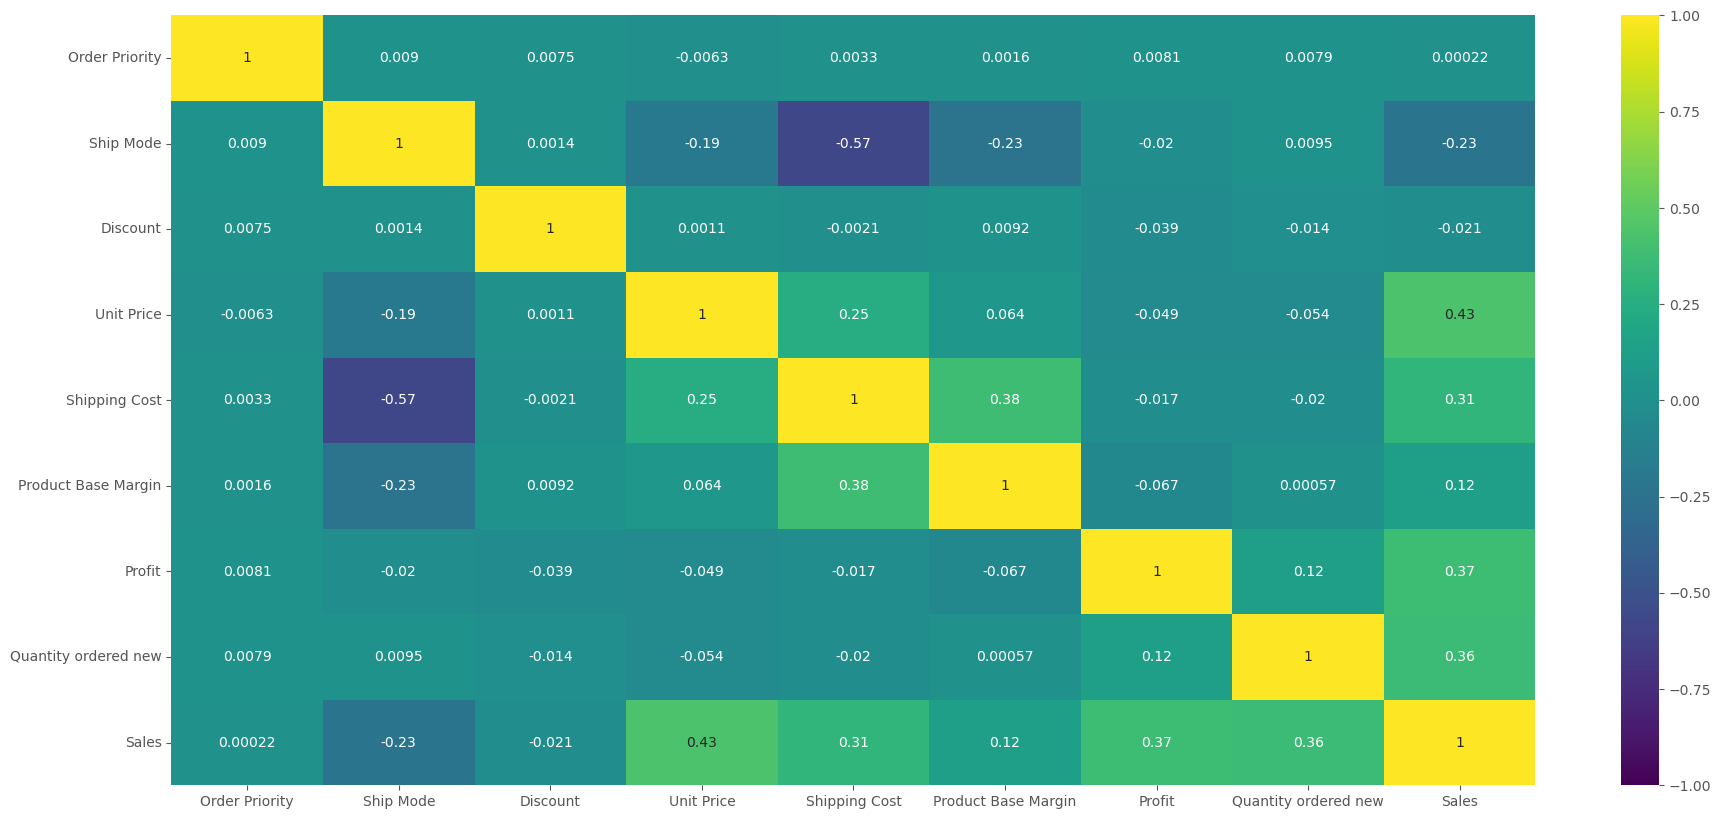

In [126]:
sns.heatmap(transfomed_correlation_variables.corr() , annot=True , cmap = 'viridis' , vmin=-1 , vmax=1 , center = 0)

### state,city and region wise analysis

In [127]:
state_region_city_wise = df.groupby(['State or Province','City','Region'])

In [128]:
state_region_city_wise.sum('Sales')['Sales']
# df.groupby(['State or Province','City','Region'])['Sales'].sum()
#state_region_city_wise['Sales'].sum()

State or Province  City          Region
Alabama            Auburn        South     12956.45
                   Bessemer      South      1055.49
                                             ...   
Wyoming            Laramie       West       4145.80
                   Rock Springs  West       1593.23
Name: Sales, Length: 1619, dtype: float64

In [129]:
state_region_city_wise.sum('Profit')['Profit']

State or Province  City          Region
Alabama            Auburn        South     1476.19650
                   Bessemer      South      -43.17430
                                              ...    
Wyoming            Laramie       West       368.81850
                   Rock Springs  West       161.86768
Name: Profit, Length: 1619, dtype: float64

In [130]:
state_region_wise = df.groupby(['State or Province','Region'])

In [131]:
state_region_wise['Sales'].sum()
#len(df['State or Province'].unique()) -.49 states are there
#Note -> on what column u are doing groupby,,those become index,,and aggregation column become values

State or Province  Region 
Alabama            South      126706.80
Arizona            West       120396.69
                                ...    
Wisconsin          Central    148724.69
Wyoming            West        18465.08
Name: Sales, Length: 49, dtype: float64

In [132]:
l=list()
for i in list(state_region_wise['Sales'].sum().index):
    l.append(i[0] + ' ' + i[1])
l

['Alabama South',
 'Arizona West',
 'Arkansas South',
 'California West',
 'Colorado West',
 'Connecticut East',
 'Delaware East',
 'District of Columbia East',
 'Florida South',
 'Georgia South',
 'Idaho West',
 'Illinois Central',
 'Indiana Central',
 'Iowa Central',
 'Kansas Central',
 'Kentucky South',
 'Louisiana South',
 'Maine East',
 'Maryland East',
 'Massachusetts East',
 'Michigan Central',
 'Minnesota Central',
 'Mississippi South',
 'Missouri Central',
 'Montana West',
 'Nebraska Central',
 'Nevada West',
 'New Hampshire East',
 'New Jersey East',
 'New Mexico West',
 'New York East',
 'North Carolina South',
 'North Dakota Central',
 'Ohio East',
 'Oklahoma Central',
 'Oregon West',
 'Pennsylvania East',
 'Rhode Island East',
 'South Carolina South',
 'South Dakota Central',
 'Tennessee South',
 'Texas Central',
 'Utah West',
 'Vermont East',
 'Virginia South',
 'Washington West',
 'West Virginia East',
 'Wisconsin Central',
 'Wyoming West']

In [133]:
state_region_wise_total_Sales = pd.DataFrame({'State_Region' : l,'Total_Sales' : state_region_wise['Sales'].sum().values })
state_region_wise_total_Sales.sort_values(by='Total_Sales' , inplace=True)
state_region_wise_total_Sales

,State_Region,Total_Sales
6,Delaware East,3543.45
32,North Dakota Central,17353.79
...,...,...
30,New York East,839593.73
3,California West,1161720.84


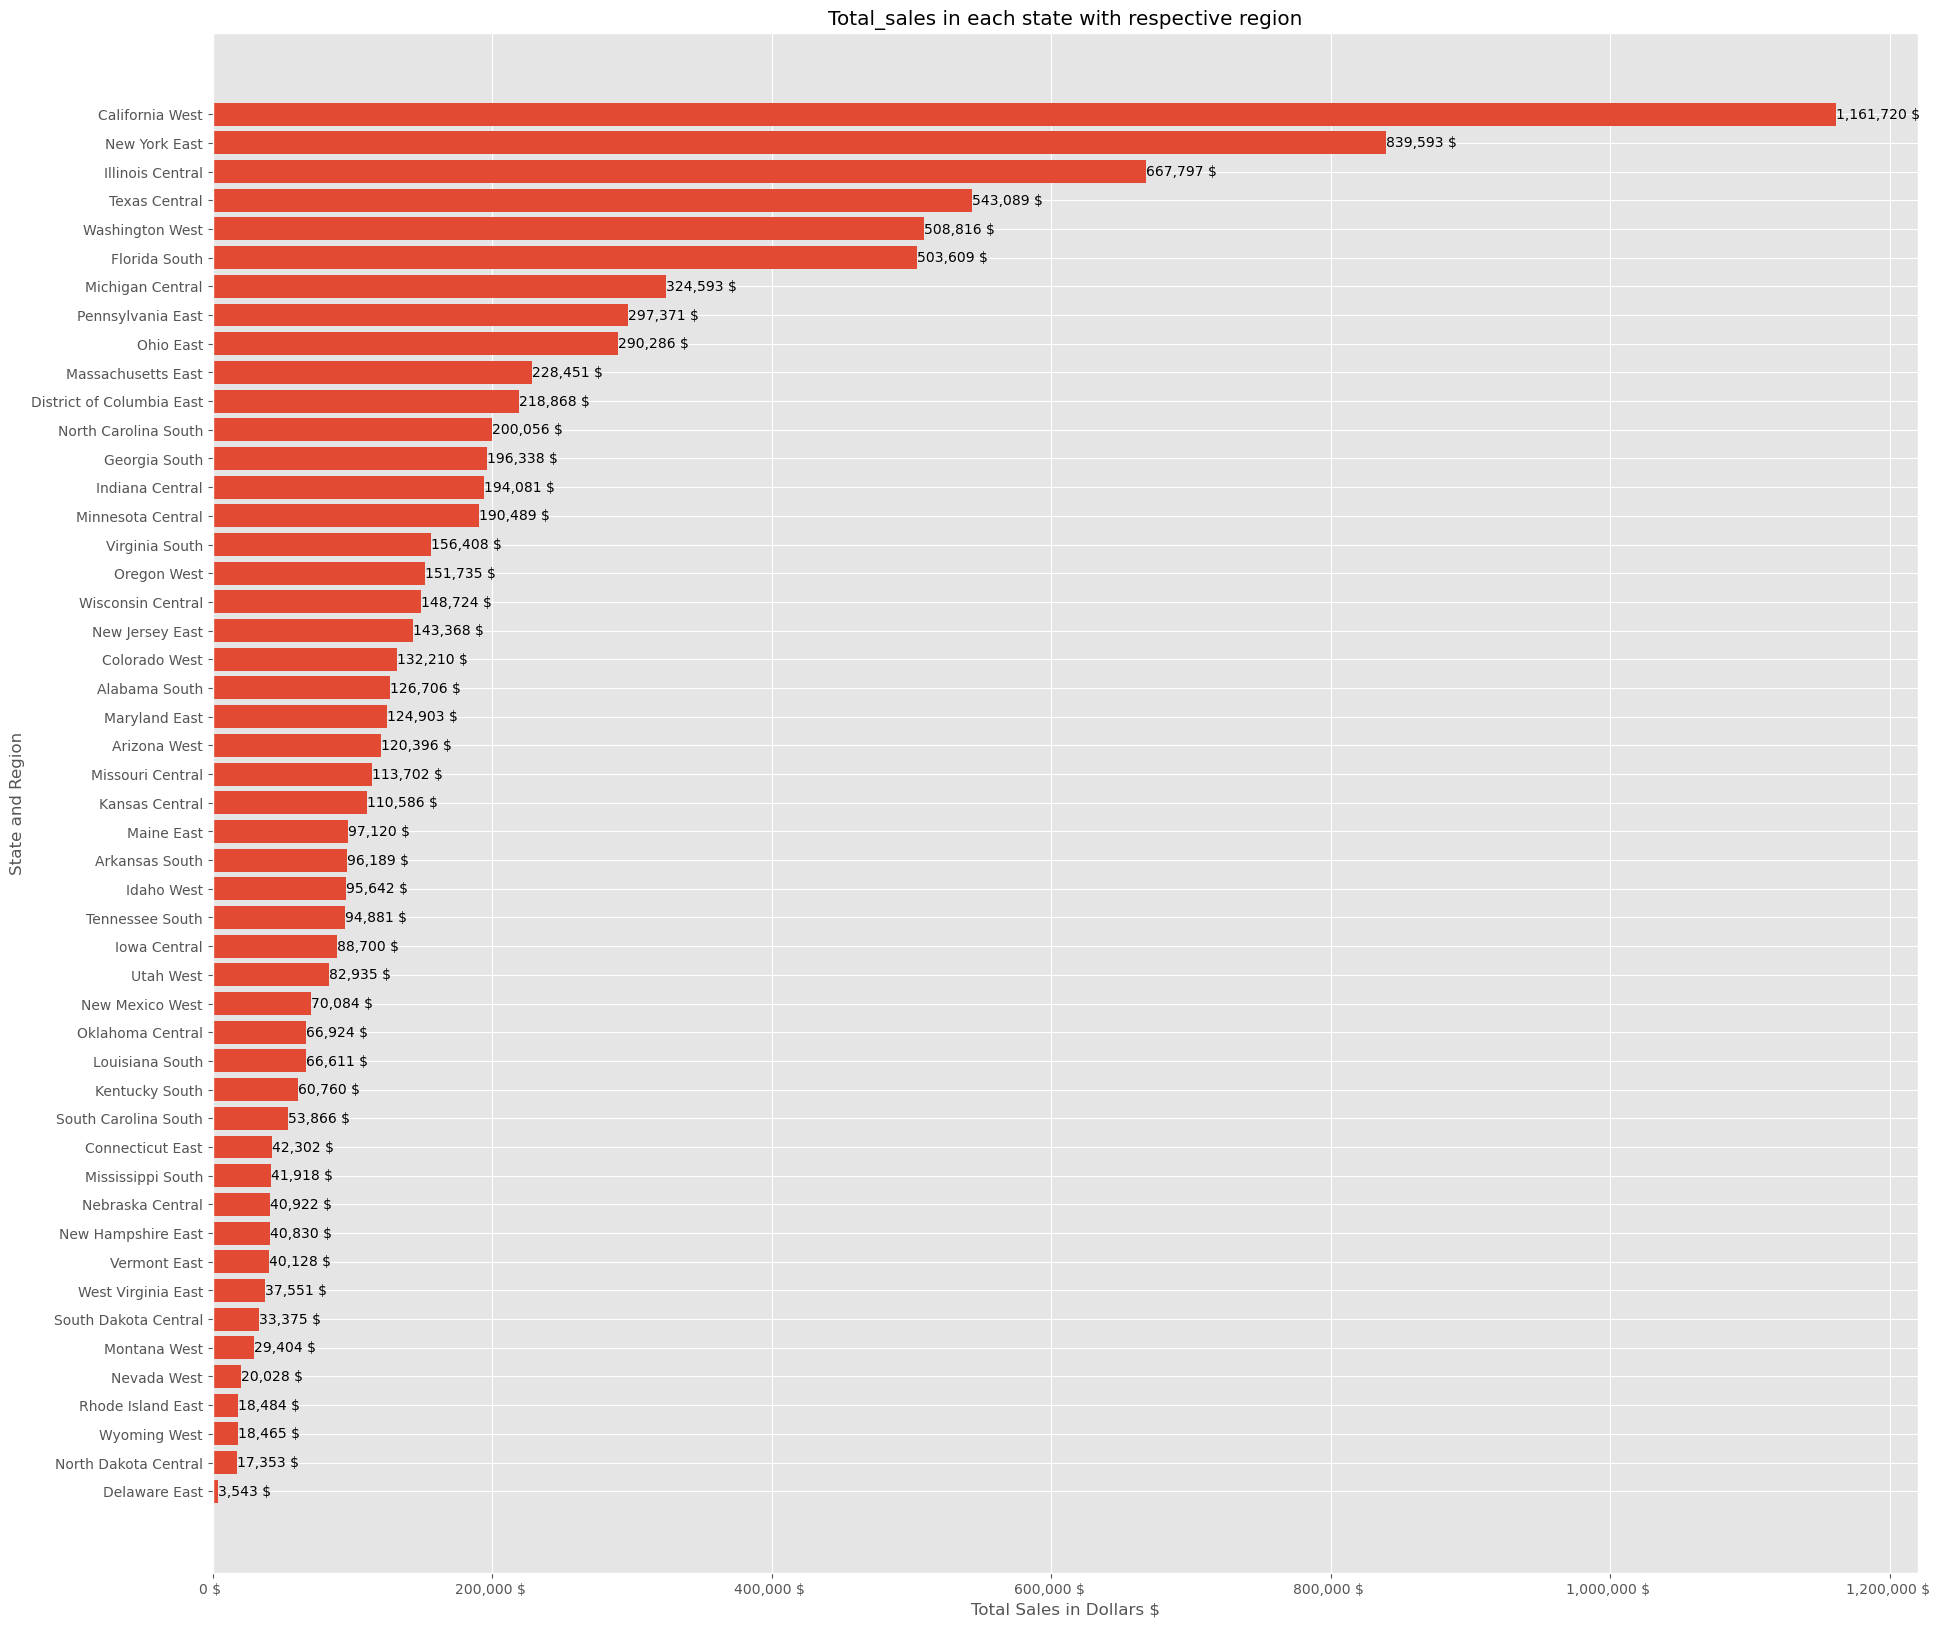

In [134]:
plt.figure(figsize=(22,20))
bars = plt.barh(  state_region_wise_total_Sales['State_Region'] , state_region_wise_total_Sales['Total_Sales'])

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,} $ '))#if u dont use this then,,above 2 line showing 0.2 , 0.4  like values,,,so to make it whole i use gca()
#$ represent,,at the end of each label on x axis ,,should end with $

# Annotate each bar with the Total Sales value
for bar in bars:
    plt.text(
        bar.get_width(),  # x coordinate position of the text
        bar.get_y() + bar.get_height() / 2,  # y coordinate position of the text
        f'{int(bar.get_width()):,} $',  # text (Total Sales value with commas)
        va='center'  # vertical alignment of the text
    )
plt.xlabel('Total Sales in Dollars $')
plt.ylabel('State and Region')
plt.title('Total_sales in each state with respective region')
plt.show()

### State_region whose total_sales are lesser than median() of all total_sales of all state

In [135]:
state_region_wise_total_Sales['Total_Sales'].median()

110586.51

In [136]:
state_region_wise_total_Sales[ state_region_wise_total_Sales['Total_Sales'] < state_region_wise_total_Sales['Total_Sales'].median() ]

,State_Region,Total_Sales
6,Delaware East,3543.45
32,North Dakota Central,17353.79
...,...,...
2,Arkansas South,96189.30
17,Maine East,97120.51


In [137]:
state_region_wise_total_Sales.sort_values(by='Total_Sales' , ascending=False)

,State_Region,Total_Sales
3,California West,1161720.84
30,New York East,839593.73
...,...,...
32,North Dakota Central,17353.79
6,Delaware East,3543.45


- Top 10 state_region where toal_sales are more in past 4 years

In [138]:
state_region_wise_total_Sales.sort_values(by='Total_Sales' , ascending=False)[:10]

,State_Region,Total_Sales
3,California West,1161720.84
30,New York East,839593.73
...,...,...
33,Ohio East,290286.12
19,Massachusetts East,228451.71


- bottom 10  state_region where Total_sales are low,,in past 4 years

In [139]:
state_region_wise_total_Sales.sort_values(by='Total_Sales' , ascending=False)[-10:]

,State_Region,Total_Sales
27,New Hampshire East,40830.05
43,Vermont East,40128.33
...,...,...
32,North Dakota Central,17353.79
6,Delaware East,3543.45


- why in these state_region sales are down ?,,lets see
- considering these 10 state_region for further analysis,,,,,,that, why sales are less in these state in past 4years

### Analyszig bottom 10 state_region 

In [140]:
l = list(state_region_wise_total_Sales.sort_values(by='Total_Sales' , ascending=False)[-10:]['State_Region'].values)
l

['New Hampshire East',
 'Vermont East',
 'West Virginia East',
 'South Dakota Central',
 'Montana West',
 'Nevada West',
 'Rhode Island East',
 'Wyoming West',
 'North Dakota Central',
 'Delaware East']

In [141]:
df['State_Region'] = df['State or Province'] + ' ' + df['Region'] 
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Years,State_Region
0,19914,Not Specified,0.08,95.99,35.00,2211,Anita Hahn,Express Air,Home Office,Office Supplies,Storage & Organization,Large Box,Safco Industrial Wire Shelving,0.666,East,Maryland,Bowie,20715,2010-01-01,2010-01-03,-425.20840,2,193.88,88028,2010,Maryland East
1,24225,Critical,0.08,15.04,1.97,1155,Alex Nicholson,Regular Air,Consumer,Office Supplies,Paper,Wrap Bag,White GlueTop Scratch Pads,0.390,West,California,Montebello,90640,2010-01-02,2010-01-02,108.51630,11,157.27,90853,2010,California West
2,24224,Critical,0.09,9.11,2.15,1155,Alex Nicholson,Express Air,Consumer,Office Supplies,Paper,Wrap Bag,"Black Print Carbonless Snap-Off® Rapid Letter,...",0.400,West,California,Montebello,90640,2010-01-02,2010-01-04,20.29960,4,34.41,90853,2010,California West
3,19279,Critical,0.06,40.98,2.99,950,Jane Shah,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",0.360,Central,Minnesota,Prior Lake,55372,2010-01-02,2010-01-04,-14.80188,1,41.60,89083,2010,Minnesota Central
4,23274,Low,0.05,155.06,7.07,67,Ellen McCormick,Regular Air,Corporate,Office Supplies,Storage & Organization,Small Box,"Dual Level, Single-Width Filing Carts",0.590,West,California,Napa,94559,2010-01-02,2010-01-09,845.66400,8,1225.60,87946,2010,California West


In [142]:
temp = df[df['State_Region'].apply(lambda x: x in l)]
temp

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Years,State_Region
49,24199,High,0.08,15.99,13.18,651,Leah Clapp,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,"GBC Pre-Punched Binding Paper, Plastic, White,...",0.37,West,Nevada,Las Vegas,89115,2010-01-07,2010-01-08,-246.926160,12,192.33,91575,2010,Nevada West
118,18278,Medium,0.05,328.14,91.05,366,Patrick Rosenthal,Delivery Truck,Small Business,Office Supplies,Appliances,Jumbo Drum,Sanyo Counter Height Refrigerator with Crisper...,0.57,East,Rhode Island,Cranston,2910,2010-01-17,2010-01-19,411.517200,6,1967.98,87347,2010,Rhode Island East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,24978,Critical,0.09,11.50,7.19,2673,Faye Joseph,Regular Air,Home Office,Office Supplies,Binders and Binder Accessories,Small Box,Ibico Covers for Plastic or Wire Binding Elements,0.40,East,West Virginia,Clarksburg,26301,2013-12-12,2013-12-14,-16.870224,24,272.41,90556,2013,West Virginia East
9397,25479,Not Specified,0.00,300.98,64.73,2617,Gerald Crabtree,Delivery Truck,Corporate,Furniture,Chairs & Chairmats,Jumbo Drum,"Global Leather and Oak Executive Chair, Black",0.56,Central,South Dakota,Aberdeen,57401,2013-12-27,2013-12-28,1096.376320,8,2538.68,91501,2013,South Dakota Central


In [143]:
bottom_10_state_region = temp.groupby(['State or Province' , 'Region' , 'Discount' ])
bottom_10_state_region.count()['Row ID']

State or Province  Region  Discount
Delaware           East    0.00        1
                           0.01        3
                                      ..
Wyoming            West    0.09        2
                           0.10        2
Name: Row ID, Length: 105, dtype: int64

In [144]:
temp_df=pd.DataFrame(columns=['State','Region','Discount','no of orders'])
temp_df.head()

,State,Region,Discount,no of orders


In [145]:
for  i in dict(bottom_10_state_region.count()['Row ID']).items():
     temp_df.loc[len(temp_df.index)] = [ i[0][0] , i[0][1] , i[0][2] , i[1] ]
temp_df.head()

,State,Region,Discount,no of orders
0,Delaware,East,0.00,1
1,Delaware,East,0.01,3
2,Delaware,East,0.03,4
3,Delaware,East,0.05,1
4,Delaware,East,0.06,1


In [146]:
temp_df.pivot(index=['State','Region'] , columns='Discount')
#---or---
# temp_df.pivot_table(values='no of orders', index=['State','Region'], columns='Discount', aggfunc='sum')
#By default sum is a aggregation function

#VVVIIIMMPP
#But you can see,,,there is not use of aggregation,,,,,,just values are plotted w.r.t. there rows and columns

no of orders                                          \
Discount                     0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08   
State         Region                                                        
Delaware      East            1.0  3.0  NaN  4.0  NaN  1.0  1.0  2.0  1.0   
Montana       West            3.0  7.0  3.0  7.0  1.0  7.0  5.0  4.0  3.0   
...                           ...  ...  ...  ...  ...  ...  ...  ...  ...   
West Virginia East            2.0  7.0  2.0  6.0  3.0  3.0  4.0  2.0  5.0   
Wyoming       West            2.0  1.0  1.0  3.0  1.0  2.0  1.0  3.0  3.0   

                                
Discount             0.09 0.10  
State         Region            
Delaware      East    2.0  NaN  
Montana       West    6.0  3.0  
...                   ...  ...  
West Virginia East    8.0  1.0  
Wyoming       West    2.0  2.0  

[10 rows x 11 columns]

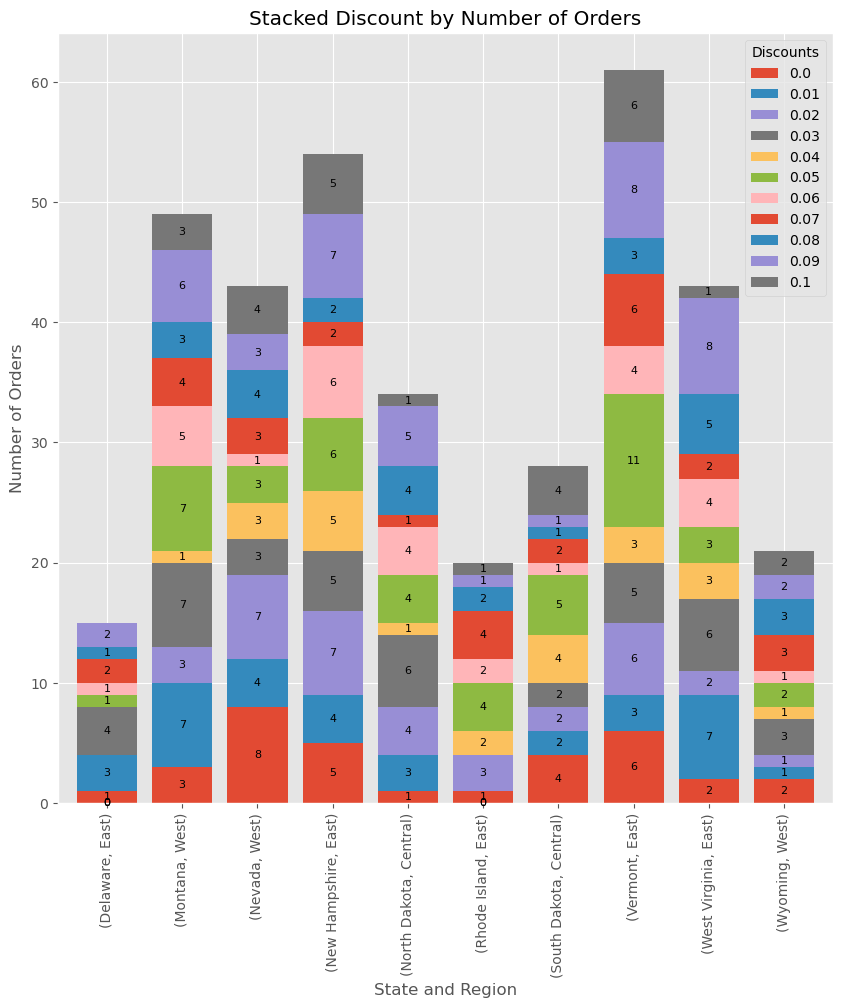

In [172]:
pivot_table = temp_df.pivot_table(values='no of orders', index=['State', 'Region'], columns='Discount', aggfunc='sum')

# Plotting stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 10) , width=0.8)
plt.title('Stacked Discount by Number of Orders')
plt.ylabel('Number of Orders')
plt.xlabel('State and Region')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Discounts')

# Formatting y-axis to show actual values with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

for container in ax.containers:
    labels = [f'{int(v):,}' for v in container.datavalues]  # Format labels as integers with commas
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)  # Adjust font size here

plt.show()

### analyzing Top 10 state_region

In [147]:
l2 = list(state_region_wise_total_Sales.sort_values(by='Total_Sales' , ascending=False)[:10]['State_Region'].values)
l2

['California West',
 'New York East',
 'Illinois Central',
 'Texas Central',
 'Washington West',
 'Florida South',
 'Michigan Central',
 'Pennsylvania East',
 'Ohio East',
 'Massachusetts East']

In [148]:
temp = df[df['State_Region'].apply(lambda x: x in l2)]
temp.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Years,State_Region
1,24225,Critical,0.08,15.04,1.97,1155,Alex Nicholson,Regular Air,Consumer,Office Supplies,Paper,Wrap Bag,White GlueTop Scratch Pads,0.39,West,California,Montebello,90640,2010-01-02,2010-01-02,108.5163,11,157.27,90853,2010,California West
2,24224,Critical,0.09,9.11,2.15,1155,Alex Nicholson,Express Air,Consumer,Office Supplies,Paper,Wrap Bag,"Black Print Carbonless Snap-Off® Rapid Letter,...",0.40,West,California,Montebello,90640,2010-01-02,2010-01-04,20.2996,4,34.41,90853,2010,California West
4,23274,Low,0.05,155.06,7.07,67,Ellen McCormick,Regular Air,Corporate,Office Supplies,Storage & Organization,Small Box,"Dual Level, Single-Width Filing Carts",0.59,West,California,Napa,94559,2010-01-02,2010-01-09,845.6640,8,1225.60,87946,2010,California West
5,5272,Low,0.00,291.73,48.80,68,Scott Bunn,Delivery Truck,Corporate,Furniture,Chairs & Chairmats,Jumbo Drum,Hon 4070 Series Pagoda™ Armless Upholstered St...,0.56,East,New York,New York City,10177,2010-01-02,2010-01-02,-308.9280,4,1239.06,37537,2010,New York East
6,1279,Critical,0.06,40.98,2.99,949,Ernest Oh,Regular Air,Consumer,Office Supplies,Binders and Binder Accessories,Small Box,"Avery Trapezoid Ring Binder, 3"" Capacity, Blac...",0.36,West,California,Los Angeles,90049,2010-01-02,2010-01-04,-19.0992,3,124.81,9285,2010,California West


In [149]:
top_10_state_region = temp.groupby(['State or Province' , 'Region' , 'Discount' ])
top_10_state_region.count()['Row ID']

State or Province  Region  Discount
California         West    0.00        81
                           0.01        99
                                       ..
Washington         West    0.09        26
                           0.10        27
Name: Row ID, Length: 112, dtype: int64

In [150]:
temp_df2 =pd.DataFrame(columns=['State','Region','Discount','no of orders'])
temp_df2.head()

,State,Region,Discount,no of orders


In [151]:
for  i in dict(top_10_state_region.count()['Row ID']).items():
     temp_df2.loc[len(temp_df2.index)] = [ i[0][0] , i[0][1] , i[0][2] , i[1] ]
temp_df2.head()

,State,Region,Discount,no of orders
0,California,West,0.00,81
1,California,West,0.01,99
2,California,West,0.02,87
3,California,West,0.03,88
4,California,West,0.04,87


In [152]:
temp_df2.pivot(index=['State','Region'] , columns='Discount')

no of orders                                            \
Discount                   0.00  0.01  0.02  0.03  0.04  0.05  0.06  0.07   
State      Region                                                           
California West            81.0  99.0  87.0  88.0  87.0  98.0  96.0  90.0   
Florida    South           45.0  45.0  47.0  50.0  50.0  45.0  48.0  47.0   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
Texas      Central         53.0  65.0  72.0  46.0  77.0  52.0  64.0  51.0   
Washington West            35.0  36.0  34.0  28.0  30.0  23.0  26.0  31.0   

                                                 
Discount            0.08   0.09  0.10 0.21 0.25  
State      Region                                
California West     97.0  109.0  89.0  NaN  NaN  
Florida    South    49.0   45.0  51.0  NaN  NaN  
...                  ...    ...   ...  ...  ...  
Texas      Central  67.0   46.0  53.0  NaN  NaN  
Washington West     31.0   26.0  27.0  NaN  NaN  

[10 rows x 13 columns]

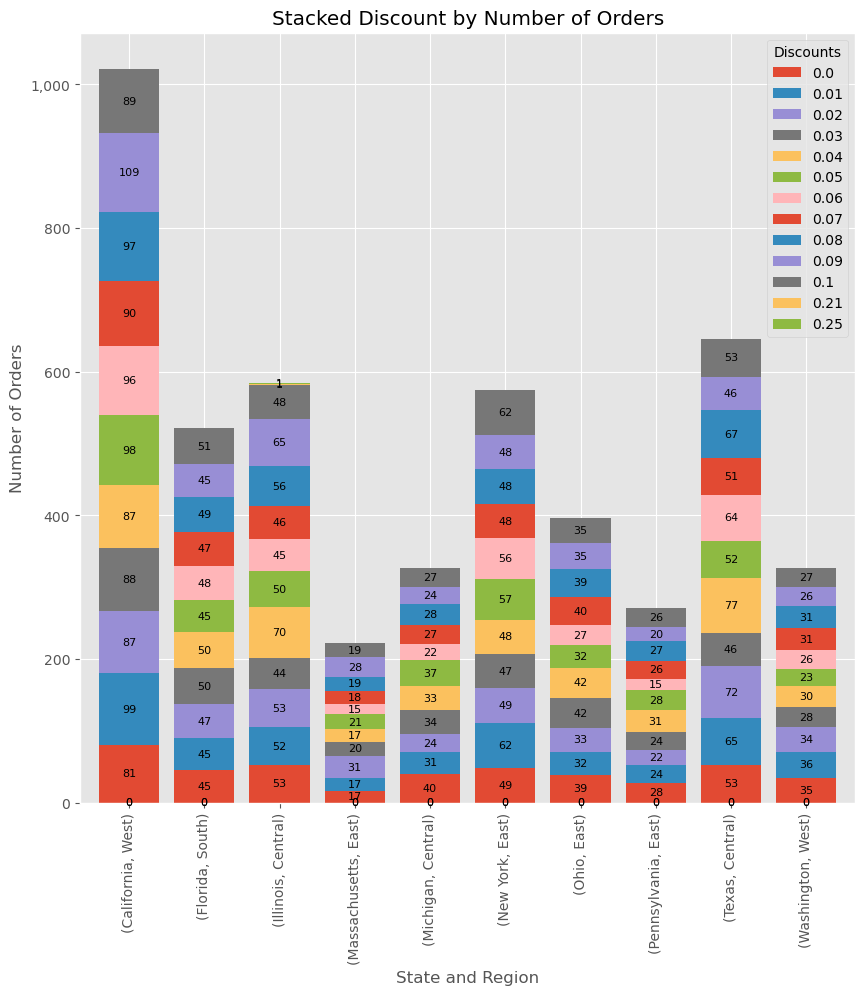

In [171]:
pivot_table2 = temp_df2.pivot_table(values='no of orders', index=['State', 'Region'], columns='Discount', aggfunc='sum')

# Plotting stacked bar chart
ax = pivot_table2.plot(kind='bar', stacked=True, figsize=(10, 10) , width=0.8)
plt.title('Stacked Discount by Number of Orders')
plt.ylabel('Number of Orders')
plt.xlabel('State and Region')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.legend(title='Discounts')

# Formatting y-axis to show actual values with commas
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

for container in ax.containers:
    labels = [f'{int(v):,}' for v in container.datavalues]  # Format labels as integers with commas
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)  # Adjust font size here

plt.show()

#0...at bottom represent,,,,0.0 discount applied by customer in each state_region is zero,,,no user are there who used 0.0 discount

# temp_df1 -> bottom_10_state_region,,,,w.r.t sales
# temp_df2 -> top_10_State_region...w.r.t sales

-  As u clearly see,,in temp_df2,, **more discount** was given
- and in temp_df1 **very less** discounts are given
- after analyzing 4 years of data (2010,2011,2012,2013) we conclude it.......

# Because our retail store is already famous in these top 10 state's,,,,we dont need do or invest much in promotions and campaigns,,,,,so slightly reduce discounts from these  top 10 states,,and do promotions and campaigns on bottom 10 states.....

### Total sales we gained from each discount tag

In [153]:
discount_sales = df.groupby('Discount').sum('Sales')['Sales']
discount_sales

Discount
0.00    903110.24
0.01    871254.16
          ...    
0.21       153.87
0.25       181.03
Name: Sales, Length: 16, dtype: float64

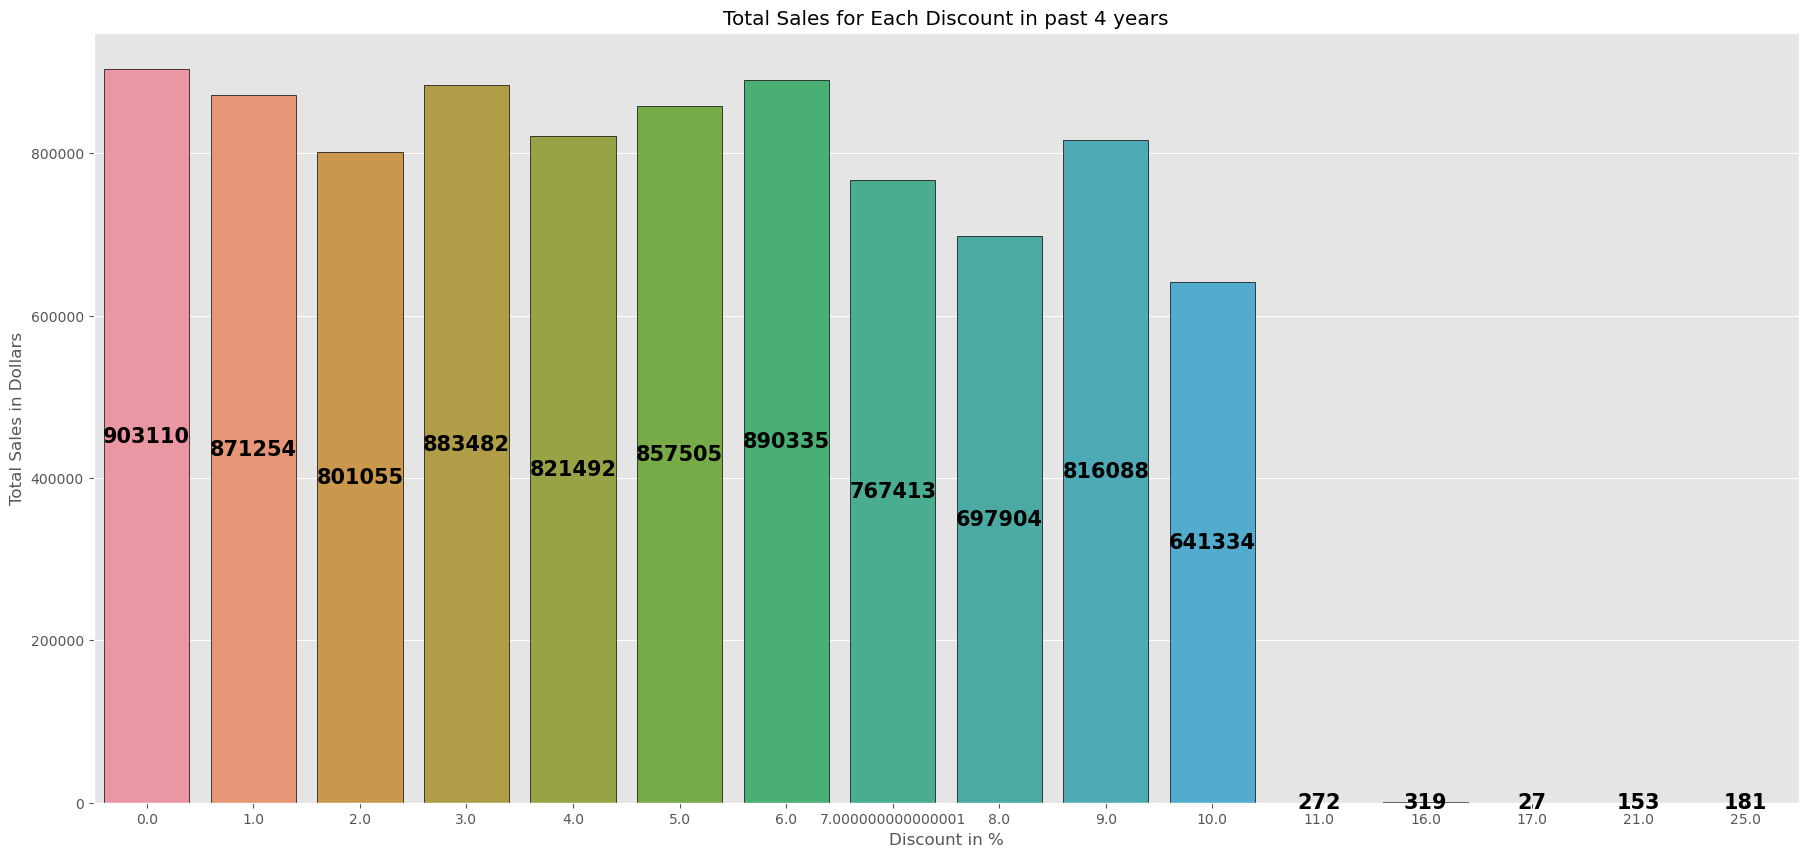

In [154]:


sns.barplot( x = discount_sales.index * 100 , y = discount_sales.values , edgecolor='black')



# Set the labels and title
plt.xlabel('Discount in %')
plt.ylabel('Total Sales in Dollars')
plt.title('Total Sales for Each Discount in past 4 years')


for p in plt.gca().patches:
        plt.gca().annotate(f'{ int(p.get_height()) }', 
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                       ha='center', va='center', 
                       color='black', fontsize=15, fontweight='bold')
# Show the plot
plt.show()

#To increase gap b/n each bar,,you have to use numpy.arange(),,,multiply the x-axis value,,so that gap is increased
#width is used for ,,to increase thichness of bar